In [1]:
import matplotlib.pyplot as plt
import cv2

In [3]:
!mkdir data
!wget -c http://ai.stanford.edu/~jkrause/car196/cars_train.tgz \
      -O cars_train.tgz

--2021-06-30 20:17:29--  http://ai.stanford.edu/~jkrause/car196/cars_train.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979269282 (934M) [application/x-gzip]
Saving to: ‘cars_train.tgz’

cars_train.tgz      100%[===================>] 933.90M  38.7MB/s    in 25s     

2021-06-30 20:17:53 (38.1 MB/s) - ‘cars_train.tgz’ saved [979269282/979269282]



In [4]:
!wget -c http://ai.stanford.edu/~jkrause/car196/cars_test.tgz \
      -O cars_test.tgz

--2021-06-30 20:21:11--  http://ai.stanford.edu/~jkrause/car196/cars_test.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977350468 (932M) [application/x-gzip]
Saving to: ‘cars_test.tgz’

cars_test.tgz       100%[===================>] 932.07M  39.6MB/s    in 24s     

2021-06-30 20:21:36 (38.2 MB/s) - ‘cars_test.tgz’ saved [977350468/977350468]



In [7]:
!tar -xvf  '/content/cars_train.tgz' -C '/content/data'
!tar -xvf  '/content/cars_test.tgz' -C '/content/data'

Streaming output truncated to the last 5000 lines.
cars_test/03042.jpg
cars_test/03043.jpg
cars_test/03044.jpg
cars_test/03045.jpg
cars_test/03046.jpg
cars_test/03047.jpg
cars_test/03048.jpg
cars_test/03049.jpg
cars_test/03050.jpg
cars_test/03051.jpg
cars_test/03052.jpg
cars_test/03053.jpg
cars_test/03054.jpg
cars_test/03055.jpg
cars_test/03056.jpg
cars_test/03057.jpg
cars_test/03058.jpg
cars_test/03059.jpg
cars_test/03060.jpg
cars_test/03061.jpg
cars_test/03062.jpg
cars_test/03063.jpg
cars_test/03064.jpg
cars_test/03065.jpg
cars_test/03066.jpg
cars_test/03067.jpg
cars_test/03068.jpg
cars_test/03069.jpg
cars_test/03070.jpg
cars_test/03071.jpg
cars_test/03072.jpg
cars_test/03073.jpg
cars_test/03074.jpg
cars_test/03075.jpg
cars_test/03076.jpg
cars_test/03077.jpg
cars_test/03078.jpg
cars_test/03079.jpg
cars_test/03080.jpg
cars_test/03081.jpg
cars_test/03082.jpg
cars_test/03083.jpg
cars_test/03084.jpg
cars_test/03085.jpg
cars_test/03086.jpg
cars_test/03087.jpg
cars_test/03088.jpg
cars_test

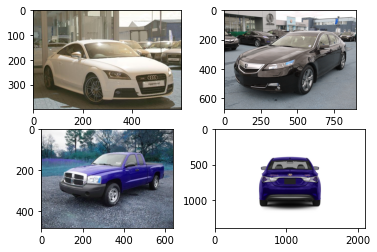

In [10]:
f, axarr = plt.subplots(2,2)
img1 = cv2.imread('/content/data/cars_train/00001.jpg')
img2 = cv2.imread('/content/data/cars_train/00002.jpg')
img3 = cv2.imread('/content/data/cars_train/00003.jpg')
img4 = cv2.imread('/content/data/cars_train/00004.jpg')
axarr[0,0].imshow(img1)
axarr[0,1].imshow(img2)
axarr[1,0].imshow(img3)
axarr[1,1].imshow(img4)


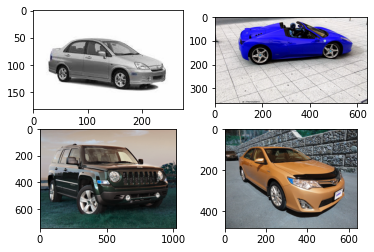

In [9]:
f, axarr = plt.subplots(2,2)
img1 = cv2.imread('/content/data/cars_test/00001.jpg')
img2 = cv2.imread('/content/data/cars_test/00002.jpg')
img3 = cv2.imread('/content/data/cars_test/00003.jpg')
img4 = cv2.imread('/content/data/cars_test/00004.jpg')
axarr[0,0].imshow(img1)
axarr[0,1].imshow(img2)
axarr[1,0].imshow(img3)
axarr[1,1].imshow(img4)

In [11]:
!wget -c http://ai.stanford.edu/~jkrause/car196/cars_annos.mat \
      -O /content/data/cars_annos.mat

--2021-06-30 20:42:23--  http://ai.stanford.edu/~jkrause/car196/cars_annos.mat
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 394471 (385K) [text/plain]
Saving to: ‘/content/data/cars_annos.mat’

/content/data/cars_ 100%[===================>] 385.23K   795KB/s    in 0.5s    

2021-06-30 20:42:24 (795 KB/s) - ‘/content/data/cars_annos.mat’ saved [394471/394471]



In [12]:
import scipy.io
cars_annos = scipy.io.loadmat('/content/data/cars_annos.mat')

In [13]:
cars_annos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])

In [14]:
# annotations
ann = cars_annos['annotations']

In [16]:
print(ann.shape)
print(ann.size)

(1, 16185)
16185


In [17]:
class_names = cars_annos['class_names']

In [18]:
print(class_names.shape)
print(class_names.size)

(1, 196)
196


In [19]:
print("Annotation: ",ann[0,0])
print("Classname: ",class_names[0,ann[0,0][5]])

Annotation:  (array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8))
Classname:  [[array(['Acura RL Sedan 2012'], dtype='<U19')]]


In [22]:
row = ann[0,0]
#print(row)
class_path = row[0] # relative_im_path
print(class_path)
x1 = row[1] # bbox_x1
print(x1)
y1 = row[2] # bbox_y1
print(y1)
x2 = row[3] # bbox_x2
print(x2)
y2 = row[4] # bbox_y2
print(y2)
rclass = row[5] # class
print(rclass)
print(class_names[0,rclass])
rtest = row[6] # test
print(rtest)
print(class_names[0,rtest])

['car_ims/000001.jpg']
[[112]]
[[7]]
[[853]]
[[717]]
[[1]]
[[array(['Acura RL Sedan 2012'], dtype='<U19')]]
[[0]]
[[array(['AM General Hummer SUV 2000'], dtype='<U26')]]


In [23]:
row = ann[0,123]
ann_path = row['relative_im_path']
print(str(ann_path))
ann_x1 = row['bbox_x1']
print(int(ann_x1))
ann_x2 = row['bbox_x2']
print(int(ann_x2))
ann_y1 = row['bbox_y1']
print(int(ann_y1))
ann_y2 = row['bbox_y2']
print(int(ann_y2))
ann_class_no = row['class']
print(ann_class_no)
ann_class = class_names[0,ann_class_no-1]
print(str(ann_class))
ann_test_no = row['test']
print(ann_test_no)
ann_test = class_names[0,ann_test_no]
print(str(ann_test))

['car_ims/000124.jpg']
208
909
97
447
[[2]]
[[array(['Acura RL Sedan 2012'], dtype='<U19')]]
[[1]]
[[array(['Acura RL Sedan 2012'], dtype='<U19')]]


In [24]:
length = ann.size
import pandas as pd
df_ann = pd.DataFrame(columns = ['relative_im_path','bbox_x1','bbox_y1','bbox_x2','bbox_y2','class','test'])

In [25]:
df_ann

,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test


In [27]:
for i in range(length):
    row = ann[0,i]
    df_ann.loc[i,'relative_im_path'] = str("\'") + '/content/data/cars_train/' + str(row['relative_im_path'])[10:-2] + str("\'")
    df_ann.loc[i,'bbox_x1'] = int(row['bbox_x1'])
    df_ann.loc[i,'bbox_y1'] = int(row['bbox_y1'])
    df_ann.loc[i,'bbox_x2'] = int(row['bbox_x2'])
    df_ann.loc[i,'bbox_y2'] = int(row['bbox_y2'])
    ann_class_no = int(row['class'])
    df_ann.loc[i,'class'] = str(class_names[0,ann_class_no-1])[1:-1].replace(" ", "_")
    ann_test_no = int(row['test'])
    df_ann.loc[i,'test'] = str(class_names[0,ann_test_no])[1:-1].replace(" ", "_")

In [28]:
df_ann.head()

,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test
0,'/content/data/cars_train/000001.jpg',112,7,853,717,'AM_General_Hummer_SUV_2000','AM_General_Hummer_SUV_2000'
1,'/content/data/cars_train/000002.jpg',48,24,441,202,'AM_General_Hummer_SUV_2000','AM_General_Hummer_SUV_2000'
2,'/content/data/cars_train/000003.jpg',7,4,277,180,'AM_General_Hummer_SUV_2000','AM_General_Hummer_SUV_2000'
3,'/content/data/cars_train/000004.jpg',33,50,197,150,'AM_General_Hummer_SUV_2000','AM_General_Hummer_SUV_2000'
4,'/content/data/cars_train/000005.jpg',5,8,83,58,'AM_General_Hummer_SUV_2000','AM_General_Hummer_SUV_2000'


In [29]:
df_ann.tail()

,relative_im_path,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test
16180,'/content/data/cars_train/016181.jpg',38,36,375,234,'smart_fortwo_Convertible_2012','Acura_RL_Sedan_2012'
16181,'/content/data/cars_train/016182.jpg',29,34,235,164,'smart_fortwo_Convertible_2012','Acura_RL_Sedan_2012'
16182,'/content/data/cars_train/016183.jpg',25,32,587,359,'smart_fortwo_Convertible_2012','Acura_RL_Sedan_2012'
16183,'/content/data/cars_train/016184.jpg',56,60,208,186,'smart_fortwo_Convertible_2012','Acura_RL_Sedan_2012'
16184,'/content/data/cars_train/016185.jpg',1,1,200,131,'smart_fortwo_Convertible_2012','Acura_RL_Sedan_2012'


In [30]:
print(df_ann.loc[0,'relative_im_path'])
print(df_ann.loc[0,'class'])
print(df_ann.loc[0,'test'])

'/content/data/cars_train/000001.jpg'
'AM_General_Hummer_SUV_2000'
'AM_General_Hummer_SUV_2000'


In [31]:
df_ann.shape

(16185, 7)

#Converting annotations to CSV Format

In [32]:
combined = [];
import numpy as np
for index, row in df_ann.iterrows():
    img_file = str(row['relative_im_path'])[-10:-1];
    #label = str(row['class']).encode("ascii");
    label = str(row['class']);
    x1 = str(row['bbox_x1'])
    x2 = str(row['bbox_x2'])
    y1 = str(row['bbox_y1'])
    y2 = str(row['bbox_y2'])
    wr = "";
    # wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + label.decode("ascii")[1:-1];
    wr += str(x1) + " " + str(y1) + " " + str(x2) + " " + str(y2) + " " + label[1:-1];
    combined.append([img_file, wr]);

In [33]:
combined[:10]

[['00001.jpg', '112 7 853 717 AM_General_Hummer_SUV_2000'],
 ['00002.jpg', '48 24 441 202 AM_General_Hummer_SUV_2000'],
 ['00003.jpg', '7 4 277 180 AM_General_Hummer_SUV_2000'],
 ['00004.jpg', '33 50 197 150 AM_General_Hummer_SUV_2000'],
 ['00005.jpg', '5 8 83 58 AM_General_Hummer_SUV_2000'],
 ['00006.jpg', '10 6 250 110 AM_General_Hummer_SUV_2000'],
 ['00007.jpg', '56 1 394 176 AM_General_Hummer_SUV_2000'],
 ['00008.jpg', '1 13 113 83 AM_General_Hummer_SUV_2000'],
 ['00009.jpg', '15 111 271 272 AM_General_Hummer_SUV_2000'],
 ['00010.jpg', '14 18 148 107 AM_General_Hummer_SUV_2000']]

In [34]:
df = pd.DataFrame(combined, columns = ['ID', 'Labels'])  
df.to_csv("/content/data/train_labels.csv", index=False)

#CSV to COCO format

In [36]:
!pip install dicttoxml

  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp37-none-any.whl size=17465 sha256=9673c755cc5da1f7529b6abd18439621873235e991018184f290e64d2fa836a6
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml


In [37]:
import os
import numpy as np 
import cv2
import dicttoxml
import xml.etree.ElementTree as ET
from xml.dom.minidom import parseString
from tqdm import tqdm
import shutil
import json
import pandas as pd

In [38]:
root = "/content";
img_dir = "data/cars_train/";
anno_file = "data/train_labels.csv";

In [39]:
dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/data/annotations/";

In [40]:
if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

In [41]:
output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = img_dir.replace("/", "");
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes.txt";

In [42]:
if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);

In [43]:
df = pd.read_csv(input_annotations_path);
columns = df.columns

In [44]:
df.head()

,ID,Labels
0,00001.jpg,112 7 853 717 AM_General_Hummer_SUV_2000
1,00002.jpg,48 24 441 202 AM_General_Hummer_SUV_2000
2,00003.jpg,7 4 277 180 AM_General_Hummer_SUV_2000
3,00004.jpg,33 50 197 150 AM_General_Hummer_SUV_2000
4,00005.jpg,5 8 83 58 AM_General_Hummer_SUV_2000


In [45]:
df.tail()

,ID,Labels
16180,16181.jpg,38 36 375 234 smart_fortwo_Convertible_2012
16181,16182.jpg,29 34 235 164 smart_fortwo_Convertible_2012
16182,16183.jpg,25 32 587 359 smart_fortwo_Convertible_2012
16183,16184.jpg,56 60 208 186 smart_fortwo_Convertible_2012
16184,16185.jpg,1 1 200 131 smart_fortwo_Convertible_2012


In [46]:
columns

Index(['ID', 'Labels'], dtype='object')

In [47]:
delimiter = " ";

In [48]:
list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    # print(tmp)
    for j in range((len(tmp)//5)):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

100%|██████████| 196/196 [00:00<00:00, 125470.63it/s]


In [49]:
coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;

In [50]:
# there are 8144 images in cars_train folder of the dataset
for i in tqdm(range(8144)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    # image_in_path = input_images_folder + img_name;
    image_in_path = root + "/" + img_dir + img_name;
    print(image_in_path)
    image = cv2.imread(image_in_path, 1);
    h, w, c = image.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

  0%|          | 9/8144 [00:00<01:31, 89.21it/s]

/content/data/cars_train/00001.jpg
/content/data/cars_train/00002.jpg
/content/data/cars_train/00003.jpg
/content/data/cars_train/00004.jpg
/content/data/cars_train/00005.jpg
/content/data/cars_train/00006.jpg
/content/data/cars_train/00007.jpg
/content/data/cars_train/00008.jpg
/content/data/cars_train/00009.jpg
/content/data/cars_train/00010.jpg
/content/data/cars_train/00011.jpg
/content/data/cars_train/00012.jpg
/content/data/cars_train/00013.jpg
/content/data/cars_train/00014.jpg
/content/data/cars_train/00015.jpg
/content/data/cars_train/00016.jpg
/content/data/cars_train/00017.jpg
/content/data/cars_train/00018.jpg
/content/data/cars_train/00019.jpg
/content/data/cars_train/00020.jpg
/content/data/cars_train/00021.jpg
/content/data/cars_train/00022.jpg


  0%|          | 32/8144 [00:00<01:24, 96.26it/s]

/content/data/cars_train/00023.jpg
/content/data/cars_train/00024.jpg
/content/data/cars_train/00025.jpg
/content/data/cars_train/00026.jpg
/content/data/cars_train/00027.jpg
/content/data/cars_train/00028.jpg
/content/data/cars_train/00029.jpg
/content/data/cars_train/00030.jpg
/content/data/cars_train/00031.jpg
/content/data/cars_train/00032.jpg
/content/data/cars_train/00033.jpg
/content/data/cars_train/00034.jpg
/content/data/cars_train/00035.jpg
/content/data/cars_train/00036.jpg
/content/data/cars_train/00037.jpg
/content/data/cars_train/00038.jpg
/content/data/cars_train/00039.jpg
/content/data/cars_train/00040.jpg
/content/data/cars_train/00041.jpg
/content/data/cars_train/00042.jpg
/content/data/cars_train/00043.jpg
/content/data/cars_train/00044.jpg


  1%|          | 53/8144 [00:00<01:27, 92.02it/s] 

/content/data/cars_train/00045.jpg
/content/data/cars_train/00046.jpg
/content/data/cars_train/00047.jpg
/content/data/cars_train/00048.jpg
/content/data/cars_train/00049.jpg
/content/data/cars_train/00050.jpg
/content/data/cars_train/00051.jpg
/content/data/cars_train/00052.jpg
/content/data/cars_train/00053.jpg
/content/data/cars_train/00054.jpg
/content/data/cars_train/00055.jpg
/content/data/cars_train/00056.jpg
/content/data/cars_train/00057.jpg
/content/data/cars_train/00058.jpg
/content/data/cars_train/00059.jpg
/content/data/cars_train/00060.jpg
/content/data/cars_train/00061.jpg


  1%|          | 72/8144 [00:00<01:31, 88.34it/s]

/content/data/cars_train/00062.jpg
/content/data/cars_train/00063.jpg
/content/data/cars_train/00064.jpg
/content/data/cars_train/00065.jpg
/content/data/cars_train/00066.jpg
/content/data/cars_train/00067.jpg
/content/data/cars_train/00068.jpg
/content/data/cars_train/00069.jpg
/content/data/cars_train/00070.jpg
/content/data/cars_train/00071.jpg
/content/data/cars_train/00072.jpg
/content/data/cars_train/00073.jpg
/content/data/cars_train/00074.jpg
/content/data/cars_train/00075.jpg
/content/data/cars_train/00076.jpg
/content/data/cars_train/00077.jpg


  1%|          | 88/8144 [00:01<02:15, 59.36it/s]

/content/data/cars_train/00078.jpg
/content/data/cars_train/00079.jpg
/content/data/cars_train/00080.jpg
/content/data/cars_train/00081.jpg
/content/data/cars_train/00082.jpg
/content/data/cars_train/00083.jpg
/content/data/cars_train/00084.jpg
/content/data/cars_train/00085.jpg
/content/data/cars_train/00086.jpg
/content/data/cars_train/00087.jpg
/content/data/cars_train/00088.jpg
/content/data/cars_train/00089.jpg
/content/data/cars_train/00090.jpg
/content/data/cars_train/00091.jpg
/content/data/cars_train/00092.jpg
/content/data/cars_train/00093.jpg
/content/data/cars_train/00094.jpg


  1%|▏         | 119/8144 [00:01<01:34, 85.33it/s]

/content/data/cars_train/00095.jpg
/content/data/cars_train/00096.jpg
/content/data/cars_train/00097.jpg
/content/data/cars_train/00098.jpg
/content/data/cars_train/00099.jpg
/content/data/cars_train/00100.jpg
/content/data/cars_train/00101.jpg
/content/data/cars_train/00102.jpg
/content/data/cars_train/00103.jpg
/content/data/cars_train/00104.jpg
/content/data/cars_train/00105.jpg
/content/data/cars_train/00106.jpg
/content/data/cars_train/00107.jpg
/content/data/cars_train/00108.jpg
/content/data/cars_train/00109.jpg
/content/data/cars_train/00110.jpg
/content/data/cars_train/00111.jpg
/content/data/cars_train/00112.jpg
/content/data/cars_train/00113.jpg
/content/data/cars_train/00114.jpg
/content/data/cars_train/00115.jpg
/content/data/cars_train/00116.jpg
/content/data/cars_train/00117.jpg
/content/data/cars_train/00118.jpg
/content/data/cars_train/00119.jpg
/content/data/cars_train/00120.jpg
/content/data/cars_train/00121.jpg
/content/data/cars_train/00122.jpg
/content/data/cars_t

  2%|▏         | 130/8144 [00:01<01:36, 82.96it/s]

/content/data/cars_train/00124.jpg
/content/data/cars_train/00125.jpg
/content/data/cars_train/00126.jpg
/content/data/cars_train/00127.jpg
/content/data/cars_train/00128.jpg
/content/data/cars_train/00129.jpg
/content/data/cars_train/00130.jpg
/content/data/cars_train/00131.jpg
/content/data/cars_train/00132.jpg
/content/data/cars_train/00133.jpg
/content/data/cars_train/00134.jpg
/content/data/cars_train/00135.jpg


  2%|▏         | 155/8144 [00:01<01:39, 80.26it/s]

/content/data/cars_train/00136.jpg
/content/data/cars_train/00137.jpg
/content/data/cars_train/00138.jpg
/content/data/cars_train/00139.jpg
/content/data/cars_train/00140.jpg
/content/data/cars_train/00141.jpg
/content/data/cars_train/00142.jpg
/content/data/cars_train/00143.jpg
/content/data/cars_train/00144.jpg
/content/data/cars_train/00145.jpg
/content/data/cars_train/00146.jpg
/content/data/cars_train/00147.jpg
/content/data/cars_train/00148.jpg
/content/data/cars_train/00149.jpg
/content/data/cars_train/00150.jpg
/content/data/cars_train/00151.jpg
/content/data/cars_train/00152.jpg
/content/data/cars_train/00153.jpg
/content/data/cars_train/00154.jpg
/content/data/cars_train/00155.jpg
/content/data/cars_train/00156.jpg
/content/data/cars_train/00157.jpg
/content/data/cars_train/00158.jpg


  2%|▏         | 184/8144 [00:02<01:17, 102.92it/s]

/content/data/cars_train/00159.jpg
/content/data/cars_train/00160.jpg
/content/data/cars_train/00161.jpg
/content/data/cars_train/00162.jpg
/content/data/cars_train/00163.jpg
/content/data/cars_train/00164.jpg
/content/data/cars_train/00165.jpg
/content/data/cars_train/00166.jpg
/content/data/cars_train/00167.jpg
/content/data/cars_train/00168.jpg
/content/data/cars_train/00169.jpg
/content/data/cars_train/00170.jpg
/content/data/cars_train/00171.jpg
/content/data/cars_train/00172.jpg
/content/data/cars_train/00173.jpg
/content/data/cars_train/00174.jpg
/content/data/cars_train/00175.jpg
/content/data/cars_train/00176.jpg
/content/data/cars_train/00177.jpg
/content/data/cars_train/00178.jpg
/content/data/cars_train/00179.jpg
/content/data/cars_train/00180.jpg
/content/data/cars_train/00181.jpg
/content/data/cars_train/00182.jpg
/content/data/cars_train/00183.jpg
/content/data/cars_train/00184.jpg
/content/data/cars_train/00185.jpg
/content/data/cars_train/00186.jpg
/content/data/cars_t

  2%|▏         | 197/8144 [00:02<01:30, 87.34it/s] 

/content/data/cars_train/00189.jpg
/content/data/cars_train/00190.jpg
/content/data/cars_train/00191.jpg
/content/data/cars_train/00192.jpg
/content/data/cars_train/00193.jpg
/content/data/cars_train/00194.jpg
/content/data/cars_train/00195.jpg
/content/data/cars_train/00196.jpg
/content/data/cars_train/00197.jpg
/content/data/cars_train/00198.jpg
/content/data/cars_train/00199.jpg
/content/data/cars_train/00200.jpg
/content/data/cars_train/00201.jpg
/content/data/cars_train/00202.jpg


  3%|▎         | 221/8144 [00:02<01:27, 90.42it/s]

/content/data/cars_train/00203.jpg
/content/data/cars_train/00204.jpg
/content/data/cars_train/00205.jpg
/content/data/cars_train/00206.jpg
/content/data/cars_train/00207.jpg
/content/data/cars_train/00208.jpg
/content/data/cars_train/00209.jpg
/content/data/cars_train/00210.jpg
/content/data/cars_train/00211.jpg
/content/data/cars_train/00212.jpg
/content/data/cars_train/00213.jpg
/content/data/cars_train/00214.jpg
/content/data/cars_train/00215.jpg
/content/data/cars_train/00216.jpg
/content/data/cars_train/00217.jpg
/content/data/cars_train/00218.jpg
/content/data/cars_train/00219.jpg
/content/data/cars_train/00220.jpg
/content/data/cars_train/00221.jpg
/content/data/cars_train/00222.jpg
/content/data/cars_train/00223.jpg
/content/data/cars_train/00224.jpg
/content/data/cars_train/00225.jpg
/content/data/cars_train/00226.jpg
/content/data/cars_train/00227.jpg
/content/data/cars_train/00228.jpg
/content/data/cars_train/00229.jpg
/content/data/cars_train/00230.jpg


  3%|▎         | 241/8144 [00:02<01:57, 67.25it/s]

/content/data/cars_train/00231.jpg
/content/data/cars_train/00232.jpg
/content/data/cars_train/00233.jpg
/content/data/cars_train/00234.jpg
/content/data/cars_train/00235.jpg
/content/data/cars_train/00236.jpg
/content/data/cars_train/00237.jpg
/content/data/cars_train/00238.jpg
/content/data/cars_train/00239.jpg
/content/data/cars_train/00240.jpg
/content/data/cars_train/00241.jpg
/content/data/cars_train/00242.jpg
/content/data/cars_train/00243.jpg
/content/data/cars_train/00244.jpg
/content/data/cars_train/00245.jpg
/content/data/cars_train/00246.jpg
/content/data/cars_train/00247.jpg


  3%|▎         | 251/8144 [00:03<02:08, 61.40it/s]

/content/data/cars_train/00248.jpg
/content/data/cars_train/00249.jpg
/content/data/cars_train/00250.jpg
/content/data/cars_train/00251.jpg
/content/data/cars_train/00252.jpg
/content/data/cars_train/00253.jpg
/content/data/cars_train/00254.jpg
/content/data/cars_train/00255.jpg
/content/data/cars_train/00256.jpg
/content/data/cars_train/00257.jpg
/content/data/cars_train/00258.jpg
/content/data/cars_train/00259.jpg


  3%|▎         | 277/8144 [00:03<01:45, 74.35it/s]

/content/data/cars_train/00260.jpg
/content/data/cars_train/00261.jpg
/content/data/cars_train/00262.jpg
/content/data/cars_train/00263.jpg
/content/data/cars_train/00264.jpg
/content/data/cars_train/00265.jpg
/content/data/cars_train/00266.jpg
/content/data/cars_train/00267.jpg
/content/data/cars_train/00268.jpg
/content/data/cars_train/00269.jpg
/content/data/cars_train/00270.jpg
/content/data/cars_train/00271.jpg
/content/data/cars_train/00272.jpg
/content/data/cars_train/00273.jpg
/content/data/cars_train/00274.jpg
/content/data/cars_train/00275.jpg
/content/data/cars_train/00276.jpg
/content/data/cars_train/00277.jpg
/content/data/cars_train/00278.jpg
/content/data/cars_train/00279.jpg
/content/data/cars_train/00280.jpg
/content/data/cars_train/00281.jpg
/content/data/cars_train/00282.jpg
/content/data/cars_train/00283.jpg
/content/data/cars_train/00284.jpg
/content/data/cars_train/00285.jpg
/content/data/cars_train/00286.jpg
/content/data/cars_train/00287.jpg


  4%|▎         | 301/8144 [00:03<01:26, 90.39it/s]

/content/data/cars_train/00288.jpg
/content/data/cars_train/00289.jpg
/content/data/cars_train/00290.jpg
/content/data/cars_train/00291.jpg
/content/data/cars_train/00292.jpg
/content/data/cars_train/00293.jpg
/content/data/cars_train/00294.jpg
/content/data/cars_train/00295.jpg
/content/data/cars_train/00296.jpg
/content/data/cars_train/00297.jpg
/content/data/cars_train/00298.jpg
/content/data/cars_train/00299.jpg
/content/data/cars_train/00300.jpg
/content/data/cars_train/00301.jpg
/content/data/cars_train/00302.jpg
/content/data/cars_train/00303.jpg
/content/data/cars_train/00304.jpg
/content/data/cars_train/00305.jpg
/content/data/cars_train/00306.jpg
/content/data/cars_train/00307.jpg
/content/data/cars_train/00308.jpg
/content/data/cars_train/00309.jpg
/content/data/cars_train/00310.jpg
/content/data/cars_train/00311.jpg
/content/data/cars_train/00312.jpg
/content/data/cars_train/00313.jpg
/content/data/cars_train/00314.jpg
/content/data/cars_train/00315.jpg


  4%|▍         | 332/8144 [00:03<01:10, 110.81it/s]

/content/data/cars_train/00316.jpg
/content/data/cars_train/00317.jpg
/content/data/cars_train/00318.jpg
/content/data/cars_train/00319.jpg
/content/data/cars_train/00320.jpg
/content/data/cars_train/00321.jpg
/content/data/cars_train/00322.jpg
/content/data/cars_train/00323.jpg
/content/data/cars_train/00324.jpg
/content/data/cars_train/00325.jpg
/content/data/cars_train/00326.jpg
/content/data/cars_train/00327.jpg
/content/data/cars_train/00328.jpg
/content/data/cars_train/00329.jpg
/content/data/cars_train/00330.jpg
/content/data/cars_train/00331.jpg
/content/data/cars_train/00332.jpg
/content/data/cars_train/00333.jpg
/content/data/cars_train/00334.jpg
/content/data/cars_train/00335.jpg
/content/data/cars_train/00336.jpg
/content/data/cars_train/00337.jpg
/content/data/cars_train/00338.jpg


  4%|▍         | 345/8144 [00:03<01:17, 100.48it/s]

/content/data/cars_train/00339.jpg
/content/data/cars_train/00340.jpg
/content/data/cars_train/00341.jpg
/content/data/cars_train/00342.jpg
/content/data/cars_train/00343.jpg
/content/data/cars_train/00344.jpg
/content/data/cars_train/00345.jpg
/content/data/cars_train/00346.jpg
/content/data/cars_train/00347.jpg


  4%|▍         | 357/8144 [00:04<01:49, 70.99it/s] 

/content/data/cars_train/00348.jpg
/content/data/cars_train/00349.jpg
/content/data/cars_train/00350.jpg
/content/data/cars_train/00351.jpg
/content/data/cars_train/00352.jpg
/content/data/cars_train/00353.jpg
/content/data/cars_train/00354.jpg
/content/data/cars_train/00355.jpg
/content/data/cars_train/00356.jpg
/content/data/cars_train/00357.jpg
/content/data/cars_train/00358.jpg
/content/data/cars_train/00359.jpg
/content/data/cars_train/00360.jpg
/content/data/cars_train/00361.jpg
/content/data/cars_train/00362.jpg
/content/data/cars_train/00363.jpg
/content/data/cars_train/00364.jpg
/content/data/cars_train/00365.jpg
/content/data/cars_train/00366.jpg
/content/data/cars_train/00367.jpg
/content/data/cars_train/00368.jpg
/content/data/cars_train/00369.jpg
/content/data/cars_train/00370.jpg


  5%|▍         | 386/8144 [00:04<01:24, 92.30it/s]

/content/data/cars_train/00371.jpg
/content/data/cars_train/00372.jpg
/content/data/cars_train/00373.jpg
/content/data/cars_train/00374.jpg
/content/data/cars_train/00375.jpg
/content/data/cars_train/00376.jpg
/content/data/cars_train/00377.jpg
/content/data/cars_train/00378.jpg
/content/data/cars_train/00379.jpg
/content/data/cars_train/00380.jpg
/content/data/cars_train/00381.jpg
/content/data/cars_train/00382.jpg
/content/data/cars_train/00383.jpg
/content/data/cars_train/00384.jpg
/content/data/cars_train/00385.jpg
/content/data/cars_train/00386.jpg
/content/data/cars_train/00387.jpg
/content/data/cars_train/00388.jpg
/content/data/cars_train/00389.jpg
/content/data/cars_train/00390.jpg
/content/data/cars_train/00391.jpg
/content/data/cars_train/00392.jpg


  5%|▌         | 412/8144 [00:04<01:18, 99.02it/s]

/content/data/cars_train/00393.jpg
/content/data/cars_train/00394.jpg
/content/data/cars_train/00395.jpg
/content/data/cars_train/00396.jpg
/content/data/cars_train/00397.jpg
/content/data/cars_train/00398.jpg
/content/data/cars_train/00399.jpg
/content/data/cars_train/00400.jpg
/content/data/cars_train/00401.jpg
/content/data/cars_train/00402.jpg
/content/data/cars_train/00403.jpg
/content/data/cars_train/00404.jpg
/content/data/cars_train/00405.jpg
/content/data/cars_train/00406.jpg
/content/data/cars_train/00407.jpg
/content/data/cars_train/00408.jpg
/content/data/cars_train/00409.jpg
/content/data/cars_train/00410.jpg
/content/data/cars_train/00411.jpg
/content/data/cars_train/00412.jpg
/content/data/cars_train/00413.jpg
/content/data/cars_train/00414.jpg
/content/data/cars_train/00415.jpg


  5%|▌         | 435/8144 [00:04<01:19, 96.97it/s]

/content/data/cars_train/00416.jpg
/content/data/cars_train/00417.jpg
/content/data/cars_train/00418.jpg
/content/data/cars_train/00419.jpg
/content/data/cars_train/00420.jpg
/content/data/cars_train/00421.jpg
/content/data/cars_train/00422.jpg
/content/data/cars_train/00423.jpg
/content/data/cars_train/00424.jpg
/content/data/cars_train/00425.jpg
/content/data/cars_train/00426.jpg
/content/data/cars_train/00427.jpg
/content/data/cars_train/00428.jpg
/content/data/cars_train/00429.jpg
/content/data/cars_train/00430.jpg
/content/data/cars_train/00431.jpg
/content/data/cars_train/00432.jpg
/content/data/cars_train/00433.jpg
/content/data/cars_train/00434.jpg
/content/data/cars_train/00435.jpg
/content/data/cars_train/00436.jpg
/content/data/cars_train/00437.jpg
/content/data/cars_train/00438.jpg
/content/data/cars_train/00439.jpg
/content/data/cars_train/00440.jpg
/content/data/cars_train/00441.jpg
/content/data/cars_train/00442.jpg
/content/data/cars_train/00443.jpg
/content/data/cars_t

  6%|▌         | 453/8144 [00:05<01:08, 112.30it/s]

/content/data/cars_train/00446.jpg
/content/data/cars_train/00447.jpg
/content/data/cars_train/00448.jpg
/content/data/cars_train/00449.jpg
/content/data/cars_train/00450.jpg
/content/data/cars_train/00451.jpg
/content/data/cars_train/00452.jpg
/content/data/cars_train/00453.jpg
/content/data/cars_train/00454.jpg
/content/data/cars_train/00455.jpg
/content/data/cars_train/00456.jpg
/content/data/cars_train/00457.jpg
/content/data/cars_train/00458.jpg
/content/data/cars_train/00459.jpg
/content/data/cars_train/00460.jpg
/content/data/cars_train/00461.jpg
/content/data/cars_train/00462.jpg
/content/data/cars_train/00463.jpg
/content/data/cars_train/00464.jpg


  6%|▌         | 484/8144 [00:05<01:10, 108.85it/s]

/content/data/cars_train/00465.jpg
/content/data/cars_train/00466.jpg
/content/data/cars_train/00467.jpg
/content/data/cars_train/00468.jpg
/content/data/cars_train/00469.jpg
/content/data/cars_train/00470.jpg
/content/data/cars_train/00471.jpg
/content/data/cars_train/00472.jpg
/content/data/cars_train/00473.jpg
/content/data/cars_train/00474.jpg
/content/data/cars_train/00475.jpg
/content/data/cars_train/00476.jpg
/content/data/cars_train/00477.jpg
/content/data/cars_train/00478.jpg
/content/data/cars_train/00479.jpg
/content/data/cars_train/00480.jpg
/content/data/cars_train/00481.jpg
/content/data/cars_train/00482.jpg
/content/data/cars_train/00483.jpg
/content/data/cars_train/00484.jpg
/content/data/cars_train/00485.jpg
/content/data/cars_train/00486.jpg
/content/data/cars_train/00487.jpg
/content/data/cars_train/00488.jpg
/content/data/cars_train/00489.jpg
/content/data/cars_train/00490.jpg
/content/data/cars_train/00491.jpg
/content/data/cars_train/00492.jpg
/content/data/cars_t

  6%|▋         | 513/8144 [00:05<01:02, 122.24it/s]

/content/data/cars_train/00497.jpg
/content/data/cars_train/00498.jpg
/content/data/cars_train/00499.jpg
/content/data/cars_train/00500.jpg
/content/data/cars_train/00501.jpg
/content/data/cars_train/00502.jpg
/content/data/cars_train/00503.jpg
/content/data/cars_train/00504.jpg
/content/data/cars_train/00505.jpg
/content/data/cars_train/00506.jpg
/content/data/cars_train/00507.jpg
/content/data/cars_train/00508.jpg
/content/data/cars_train/00509.jpg
/content/data/cars_train/00510.jpg
/content/data/cars_train/00511.jpg
/content/data/cars_train/00512.jpg
/content/data/cars_train/00513.jpg
/content/data/cars_train/00514.jpg
/content/data/cars_train/00515.jpg
/content/data/cars_train/00516.jpg
/content/data/cars_train/00517.jpg
/content/data/cars_train/00518.jpg
/content/data/cars_train/00519.jpg
/content/data/cars_train/00520.jpg
/content/data/cars_train/00521.jpg
/content/data/cars_train/00522.jpg
/content/data/cars_train/00523.jpg
/content/data/cars_train/00524.jpg
/content/data/cars_t

  7%|▋         | 546/8144 [00:05<01:08, 110.79it/s]

/content/data/cars_train/00532.jpg
/content/data/cars_train/00533.jpg
/content/data/cars_train/00534.jpg
/content/data/cars_train/00535.jpg
/content/data/cars_train/00536.jpg
/content/data/cars_train/00537.jpg
/content/data/cars_train/00538.jpg
/content/data/cars_train/00539.jpg
/content/data/cars_train/00540.jpg
/content/data/cars_train/00541.jpg
/content/data/cars_train/00542.jpg
/content/data/cars_train/00543.jpg
/content/data/cars_train/00544.jpg
/content/data/cars_train/00545.jpg
/content/data/cars_train/00546.jpg
/content/data/cars_train/00547.jpg
/content/data/cars_train/00548.jpg
/content/data/cars_train/00549.jpg
/content/data/cars_train/00550.jpg
/content/data/cars_train/00551.jpg


  7%|▋         | 563/8144 [00:05<01:02, 121.96it/s]

/content/data/cars_train/00552.jpg
/content/data/cars_train/00553.jpg
/content/data/cars_train/00554.jpg
/content/data/cars_train/00555.jpg
/content/data/cars_train/00556.jpg
/content/data/cars_train/00557.jpg
/content/data/cars_train/00558.jpg
/content/data/cars_train/00559.jpg
/content/data/cars_train/00560.jpg
/content/data/cars_train/00561.jpg
/content/data/cars_train/00562.jpg
/content/data/cars_train/00563.jpg
/content/data/cars_train/00564.jpg
/content/data/cars_train/00565.jpg
/content/data/cars_train/00566.jpg
/content/data/cars_train/00567.jpg
/content/data/cars_train/00568.jpg
/content/data/cars_train/00569.jpg
/content/data/cars_train/00570.jpg
/content/data/cars_train/00571.jpg
/content/data/cars_train/00572.jpg
/content/data/cars_train/00573.jpg


  7%|▋         | 589/8144 [00:06<01:21, 92.23it/s]

/content/data/cars_train/00574.jpg
/content/data/cars_train/00575.jpg
/content/data/cars_train/00576.jpg
/content/data/cars_train/00577.jpg
/content/data/cars_train/00578.jpg
/content/data/cars_train/00579.jpg
/content/data/cars_train/00580.jpg
/content/data/cars_train/00581.jpg
/content/data/cars_train/00582.jpg
/content/data/cars_train/00583.jpg
/content/data/cars_train/00584.jpg
/content/data/cars_train/00585.jpg
/content/data/cars_train/00586.jpg
/content/data/cars_train/00587.jpg
/content/data/cars_train/00588.jpg
/content/data/cars_train/00589.jpg
/content/data/cars_train/00590.jpg
/content/data/cars_train/00591.jpg
/content/data/cars_train/00592.jpg
/content/data/cars_train/00593.jpg
/content/data/cars_train/00594.jpg
/content/data/cars_train/00595.jpg


  7%|▋         | 605/8144 [00:06<01:12, 104.34it/s]

/content/data/cars_train/00596.jpg
/content/data/cars_train/00597.jpg
/content/data/cars_train/00598.jpg
/content/data/cars_train/00599.jpg
/content/data/cars_train/00600.jpg
/content/data/cars_train/00601.jpg
/content/data/cars_train/00602.jpg
/content/data/cars_train/00603.jpg
/content/data/cars_train/00604.jpg
/content/data/cars_train/00605.jpg
/content/data/cars_train/00606.jpg
/content/data/cars_train/00607.jpg
/content/data/cars_train/00608.jpg
/content/data/cars_train/00609.jpg
/content/data/cars_train/00610.jpg
/content/data/cars_train/00611.jpg
/content/data/cars_train/00612.jpg
/content/data/cars_train/00613.jpg
/content/data/cars_train/00614.jpg
/content/data/cars_train/00615.jpg
/content/data/cars_train/00616.jpg


  8%|▊         | 633/8144 [00:06<01:10, 106.89it/s]

/content/data/cars_train/00617.jpg
/content/data/cars_train/00618.jpg
/content/data/cars_train/00619.jpg
/content/data/cars_train/00620.jpg
/content/data/cars_train/00621.jpg
/content/data/cars_train/00622.jpg
/content/data/cars_train/00623.jpg
/content/data/cars_train/00624.jpg
/content/data/cars_train/00625.jpg
/content/data/cars_train/00626.jpg
/content/data/cars_train/00627.jpg
/content/data/cars_train/00628.jpg
/content/data/cars_train/00629.jpg
/content/data/cars_train/00630.jpg
/content/data/cars_train/00631.jpg
/content/data/cars_train/00632.jpg
/content/data/cars_train/00633.jpg
/content/data/cars_train/00634.jpg
/content/data/cars_train/00635.jpg
/content/data/cars_train/00636.jpg
/content/data/cars_train/00637.jpg
/content/data/cars_train/00638.jpg
/content/data/cars_train/00639.jpg
/content/data/cars_train/00640.jpg
/content/data/cars_train/00641.jpg
/content/data/cars_train/00642.jpg
/content/data/cars_train/00643.jpg
/content/data/cars_train/00644.jpg
/content/data/cars_t

  8%|▊         | 680/8144 [00:06<00:55, 135.02it/s]

/content/data/cars_train/00648.jpg
/content/data/cars_train/00649.jpg
/content/data/cars_train/00650.jpg
/content/data/cars_train/00651.jpg
/content/data/cars_train/00652.jpg
/content/data/cars_train/00653.jpg
/content/data/cars_train/00654.jpg
/content/data/cars_train/00655.jpg
/content/data/cars_train/00656.jpg
/content/data/cars_train/00657.jpg
/content/data/cars_train/00658.jpg
/content/data/cars_train/00659.jpg
/content/data/cars_train/00660.jpg
/content/data/cars_train/00661.jpg
/content/data/cars_train/00662.jpg
/content/data/cars_train/00663.jpg
/content/data/cars_train/00664.jpg
/content/data/cars_train/00665.jpg
/content/data/cars_train/00666.jpg
/content/data/cars_train/00667.jpg
/content/data/cars_train/00668.jpg
/content/data/cars_train/00669.jpg
/content/data/cars_train/00670.jpg
/content/data/cars_train/00671.jpg
/content/data/cars_train/00672.jpg
/content/data/cars_train/00673.jpg
/content/data/cars_train/00674.jpg
/content/data/cars_train/00675.jpg
/content/data/cars_t

  9%|▊         | 695/8144 [00:07<01:01, 120.60it/s]

/content/data/cars_train/00683.jpg
/content/data/cars_train/00684.jpg
/content/data/cars_train/00685.jpg
/content/data/cars_train/00686.jpg
/content/data/cars_train/00687.jpg
/content/data/cars_train/00688.jpg
/content/data/cars_train/00689.jpg
/content/data/cars_train/00690.jpg
/content/data/cars_train/00691.jpg
/content/data/cars_train/00692.jpg
/content/data/cars_train/00693.jpg
/content/data/cars_train/00694.jpg
/content/data/cars_train/00695.jpg
/content/data/cars_train/00696.jpg
/content/data/cars_train/00697.jpg
/content/data/cars_train/00698.jpg
/content/data/cars_train/00699.jpg
/content/data/cars_train/00700.jpg
/content/data/cars_train/00701.jpg
/content/data/cars_train/00702.jpg
/content/data/cars_train/00703.jpg
/content/data/cars_train/00704.jpg
/content/data/cars_train/00705.jpg
/content/data/cars_train/00706.jpg


  9%|▉         | 722/8144 [00:07<01:03, 117.37it/s]

/content/data/cars_train/00707.jpg
/content/data/cars_train/00708.jpg
/content/data/cars_train/00709.jpg
/content/data/cars_train/00710.jpg
/content/data/cars_train/00711.jpg
/content/data/cars_train/00712.jpg
/content/data/cars_train/00713.jpg
/content/data/cars_train/00714.jpg
/content/data/cars_train/00715.jpg
/content/data/cars_train/00716.jpg
/content/data/cars_train/00717.jpg
/content/data/cars_train/00718.jpg
/content/data/cars_train/00719.jpg
/content/data/cars_train/00720.jpg
/content/data/cars_train/00721.jpg
/content/data/cars_train/00722.jpg
/content/data/cars_train/00723.jpg
/content/data/cars_train/00724.jpg
/content/data/cars_train/00725.jpg
/content/data/cars_train/00726.jpg
/content/data/cars_train/00727.jpg
/content/data/cars_train/00728.jpg
/content/data/cars_train/00729.jpg
/content/data/cars_train/00730.jpg
/content/data/cars_train/00731.jpg


  9%|▉         | 752/8144 [00:07<00:56, 129.81it/s]

/content/data/cars_train/00732.jpg
/content/data/cars_train/00733.jpg
/content/data/cars_train/00734.jpg
/content/data/cars_train/00735.jpg
/content/data/cars_train/00736.jpg
/content/data/cars_train/00737.jpg
/content/data/cars_train/00738.jpg
/content/data/cars_train/00739.jpg
/content/data/cars_train/00740.jpg
/content/data/cars_train/00741.jpg
/content/data/cars_train/00742.jpg
/content/data/cars_train/00743.jpg
/content/data/cars_train/00744.jpg
/content/data/cars_train/00745.jpg
/content/data/cars_train/00746.jpg
/content/data/cars_train/00747.jpg
/content/data/cars_train/00748.jpg
/content/data/cars_train/00749.jpg
/content/data/cars_train/00750.jpg
/content/data/cars_train/00751.jpg
/content/data/cars_train/00752.jpg
/content/data/cars_train/00753.jpg
/content/data/cars_train/00754.jpg
/content/data/cars_train/00755.jpg
/content/data/cars_train/00756.jpg
/content/data/cars_train/00757.jpg
/content/data/cars_train/00758.jpg
/content/data/cars_train/00759.jpg
/content/data/cars_t

 10%|▉         | 783/8144 [00:07<00:53, 137.73it/s]

/content/data/cars_train/00761.jpg
/content/data/cars_train/00762.jpg
/content/data/cars_train/00763.jpg
/content/data/cars_train/00764.jpg
/content/data/cars_train/00765.jpg
/content/data/cars_train/00766.jpg
/content/data/cars_train/00767.jpg
/content/data/cars_train/00768.jpg
/content/data/cars_train/00769.jpg
/content/data/cars_train/00770.jpg
/content/data/cars_train/00771.jpg
/content/data/cars_train/00772.jpg
/content/data/cars_train/00773.jpg
/content/data/cars_train/00774.jpg
/content/data/cars_train/00775.jpg
/content/data/cars_train/00776.jpg
/content/data/cars_train/00777.jpg
/content/data/cars_train/00778.jpg
/content/data/cars_train/00779.jpg
/content/data/cars_train/00780.jpg
/content/data/cars_train/00781.jpg
/content/data/cars_train/00782.jpg
/content/data/cars_train/00783.jpg
/content/data/cars_train/00784.jpg
/content/data/cars_train/00785.jpg
/content/data/cars_train/00786.jpg
/content/data/cars_train/00787.jpg
/content/data/cars_train/00788.jpg
/content/data/cars_t

 10%|█         | 820/8144 [00:07<00:49, 146.90it/s]

/content/data/cars_train/00791.jpg
/content/data/cars_train/00792.jpg
/content/data/cars_train/00793.jpg
/content/data/cars_train/00794.jpg
/content/data/cars_train/00795.jpg
/content/data/cars_train/00796.jpg
/content/data/cars_train/00797.jpg
/content/data/cars_train/00798.jpg
/content/data/cars_train/00799.jpg
/content/data/cars_train/00800.jpg
/content/data/cars_train/00801.jpg
/content/data/cars_train/00802.jpg
/content/data/cars_train/00803.jpg
/content/data/cars_train/00804.jpg
/content/data/cars_train/00805.jpg
/content/data/cars_train/00806.jpg
/content/data/cars_train/00807.jpg
/content/data/cars_train/00808.jpg
/content/data/cars_train/00809.jpg
/content/data/cars_train/00810.jpg
/content/data/cars_train/00811.jpg
/content/data/cars_train/00812.jpg
/content/data/cars_train/00813.jpg
/content/data/cars_train/00814.jpg
/content/data/cars_train/00815.jpg
/content/data/cars_train/00816.jpg
/content/data/cars_train/00817.jpg
/content/data/cars_train/00818.jpg
/content/data/cars_t

 10%|█         | 852/8144 [00:08<00:53, 137.48it/s]

/content/data/cars_train/00828.jpg
/content/data/cars_train/00829.jpg
/content/data/cars_train/00830.jpg
/content/data/cars_train/00831.jpg
/content/data/cars_train/00832.jpg
/content/data/cars_train/00833.jpg
/content/data/cars_train/00834.jpg
/content/data/cars_train/00835.jpg
/content/data/cars_train/00836.jpg
/content/data/cars_train/00837.jpg
/content/data/cars_train/00838.jpg
/content/data/cars_train/00839.jpg
/content/data/cars_train/00840.jpg
/content/data/cars_train/00841.jpg
/content/data/cars_train/00842.jpg
/content/data/cars_train/00843.jpg
/content/data/cars_train/00844.jpg
/content/data/cars_train/00845.jpg
/content/data/cars_train/00846.jpg
/content/data/cars_train/00847.jpg
/content/data/cars_train/00848.jpg
/content/data/cars_train/00849.jpg
/content/data/cars_train/00850.jpg
/content/data/cars_train/00851.jpg
/content/data/cars_train/00852.jpg
/content/data/cars_train/00853.jpg


 11%|█         | 867/8144 [00:08<00:57, 126.51it/s]

/content/data/cars_train/00854.jpg
/content/data/cars_train/00855.jpg
/content/data/cars_train/00856.jpg
/content/data/cars_train/00857.jpg
/content/data/cars_train/00858.jpg
/content/data/cars_train/00859.jpg
/content/data/cars_train/00860.jpg
/content/data/cars_train/00861.jpg
/content/data/cars_train/00862.jpg
/content/data/cars_train/00863.jpg
/content/data/cars_train/00864.jpg
/content/data/cars_train/00865.jpg
/content/data/cars_train/00866.jpg
/content/data/cars_train/00867.jpg
/content/data/cars_train/00868.jpg
/content/data/cars_train/00869.jpg
/content/data/cars_train/00870.jpg
/content/data/cars_train/00871.jpg
/content/data/cars_train/00872.jpg
/content/data/cars_train/00873.jpg
/content/data/cars_train/00874.jpg
/content/data/cars_train/00875.jpg
/content/data/cars_train/00876.jpg
/content/data/cars_train/00877.jpg
/content/data/cars_train/00878.jpg
/content/data/cars_train/00879.jpg
/content/data/cars_train/00880.jpg
/content/data/cars_train/00881.jpg


 11%|█         | 896/8144 [00:08<00:59, 121.07it/s]

/content/data/cars_train/00882.jpg
/content/data/cars_train/00883.jpg
/content/data/cars_train/00884.jpg
/content/data/cars_train/00885.jpg
/content/data/cars_train/00886.jpg
/content/data/cars_train/00887.jpg
/content/data/cars_train/00888.jpg
/content/data/cars_train/00889.jpg
/content/data/cars_train/00890.jpg
/content/data/cars_train/00891.jpg
/content/data/cars_train/00892.jpg
/content/data/cars_train/00893.jpg
/content/data/cars_train/00894.jpg
/content/data/cars_train/00895.jpg
/content/data/cars_train/00896.jpg
/content/data/cars_train/00897.jpg
/content/data/cars_train/00898.jpg
/content/data/cars_train/00899.jpg
/content/data/cars_train/00900.jpg
/content/data/cars_train/00901.jpg
/content/data/cars_train/00902.jpg
/content/data/cars_train/00903.jpg


 11%|█▏        | 922/8144 [00:08<01:04, 112.63it/s]

/content/data/cars_train/00904.jpg
/content/data/cars_train/00905.jpg
/content/data/cars_train/00906.jpg
/content/data/cars_train/00907.jpg
/content/data/cars_train/00908.jpg
/content/data/cars_train/00909.jpg
/content/data/cars_train/00910.jpg
/content/data/cars_train/00911.jpg
/content/data/cars_train/00912.jpg
/content/data/cars_train/00913.jpg
/content/data/cars_train/00914.jpg
/content/data/cars_train/00915.jpg
/content/data/cars_train/00916.jpg
/content/data/cars_train/00917.jpg
/content/data/cars_train/00918.jpg
/content/data/cars_train/00919.jpg
/content/data/cars_train/00920.jpg
/content/data/cars_train/00921.jpg
/content/data/cars_train/00922.jpg
/content/data/cars_train/00923.jpg
/content/data/cars_train/00924.jpg
/content/data/cars_train/00925.jpg
/content/data/cars_train/00926.jpg
/content/data/cars_train/00927.jpg


 12%|█▏        | 950/8144 [00:09<00:59, 121.39it/s]

/content/data/cars_train/00928.jpg
/content/data/cars_train/00929.jpg
/content/data/cars_train/00930.jpg
/content/data/cars_train/00931.jpg
/content/data/cars_train/00932.jpg
/content/data/cars_train/00933.jpg
/content/data/cars_train/00934.jpg
/content/data/cars_train/00935.jpg
/content/data/cars_train/00936.jpg
/content/data/cars_train/00937.jpg
/content/data/cars_train/00938.jpg
/content/data/cars_train/00939.jpg
/content/data/cars_train/00940.jpg
/content/data/cars_train/00941.jpg
/content/data/cars_train/00942.jpg
/content/data/cars_train/00943.jpg
/content/data/cars_train/00944.jpg
/content/data/cars_train/00945.jpg
/content/data/cars_train/00946.jpg
/content/data/cars_train/00947.jpg
/content/data/cars_train/00948.jpg
/content/data/cars_train/00949.jpg
/content/data/cars_train/00950.jpg
/content/data/cars_train/00951.jpg
/content/data/cars_train/00952.jpg
/content/data/cars_train/00953.jpg
/content/data/cars_train/00954.jpg

 12%|█▏        | 963/8144 [00:09<01:04, 111.80it/s]


/content/data/cars_train/00955.jpg
/content/data/cars_train/00956.jpg
/content/data/cars_train/00957.jpg
/content/data/cars_train/00958.jpg
/content/data/cars_train/00959.jpg
/content/data/cars_train/00960.jpg
/content/data/cars_train/00961.jpg
/content/data/cars_train/00962.jpg
/content/data/cars_train/00963.jpg
/content/data/cars_train/00964.jpg
/content/data/cars_train/00965.jpg
/content/data/cars_train/00966.jpg
/content/data/cars_train/00967.jpg
/content/data/cars_train/00968.jpg
/content/data/cars_train/00969.jpg
/content/data/cars_train/00970.jpg
/content/data/cars_train/00971.jpg
/content/data/cars_train/00972.jpg
/content/data/cars_train/00973.jpg
/content/data/cars_train/00974.jpg
/content/data/cars_train/00975.jpg
/content/data/cars_train/00976.jpg
/content/data/cars_train/00977.jpg
/content/data/cars_train/00978.jpg


 12%|█▏        | 992/8144 [00:09<01:03, 112.82it/s]

/content/data/cars_train/00979.jpg
/content/data/cars_train/00980.jpg
/content/data/cars_train/00981.jpg
/content/data/cars_train/00982.jpg
/content/data/cars_train/00983.jpg
/content/data/cars_train/00984.jpg
/content/data/cars_train/00985.jpg
/content/data/cars_train/00986.jpg
/content/data/cars_train/00987.jpg
/content/data/cars_train/00988.jpg
/content/data/cars_train/00989.jpg
/content/data/cars_train/00990.jpg
/content/data/cars_train/00991.jpg
/content/data/cars_train/00992.jpg
/content/data/cars_train/00993.jpg
/content/data/cars_train/00994.jpg
/content/data/cars_train/00995.jpg
/content/data/cars_train/00996.jpg
/content/data/cars_train/00997.jpg
/content/data/cars_train/00998.jpg
/content/data/cars_train/00999.jpg
/content/data/cars_train/01000.jpg


 12%|█▏        | 1004/8144 [00:09<01:05, 109.63it/s]

/content/data/cars_train/01001.jpg
/content/data/cars_train/01002.jpg
/content/data/cars_train/01003.jpg
/content/data/cars_train/01004.jpg
/content/data/cars_train/01005.jpg
/content/data/cars_train/01006.jpg
/content/data/cars_train/01007.jpg
/content/data/cars_train/01008.jpg
/content/data/cars_train/01009.jpg
/content/data/cars_train/01010.jpg
/content/data/cars_train/01011.jpg
/content/data/cars_train/01012.jpg
/content/data/cars_train/01013.jpg
/content/data/cars_train/01014.jpg
/content/data/cars_train/01015.jpg
/content/data/cars_train/01016.jpg


 13%|█▎        | 1026/8144 [00:09<01:17, 91.54it/s]

/content/data/cars_train/01017.jpg
/content/data/cars_train/01018.jpg
/content/data/cars_train/01019.jpg
/content/data/cars_train/01020.jpg
/content/data/cars_train/01021.jpg
/content/data/cars_train/01022.jpg
/content/data/cars_train/01023.jpg
/content/data/cars_train/01024.jpg
/content/data/cars_train/01025.jpg
/content/data/cars_train/01026.jpg
/content/data/cars_train/01027.jpg
/content/data/cars_train/01028.jpg
/content/data/cars_train/01029.jpg
/content/data/cars_train/01030.jpg
/content/data/cars_train/01031.jpg
/content/data/cars_train/01032.jpg
/content/data/cars_train/01033.jpg


 13%|█▎        | 1049/8144 [00:10<01:26, 82.30it/s]

/content/data/cars_train/01034.jpg
/content/data/cars_train/01035.jpg
/content/data/cars_train/01036.jpg
/content/data/cars_train/01037.jpg
/content/data/cars_train/01038.jpg
/content/data/cars_train/01039.jpg
/content/data/cars_train/01040.jpg
/content/data/cars_train/01041.jpg
/content/data/cars_train/01042.jpg
/content/data/cars_train/01043.jpg
/content/data/cars_train/01044.jpg
/content/data/cars_train/01045.jpg
/content/data/cars_train/01046.jpg
/content/data/cars_train/01047.jpg
/content/data/cars_train/01048.jpg
/content/data/cars_train/01049.jpg
/content/data/cars_train/01050.jpg
/content/data/cars_train/01051.jpg
/content/data/cars_train/01052.jpg
/content/data/cars_train/01053.jpg
/content/data/cars_train/01054.jpg


 13%|█▎        | 1062/8144 [00:10<01:17, 91.76it/s]

/content/data/cars_train/01055.jpg
/content/data/cars_train/01056.jpg
/content/data/cars_train/01057.jpg
/content/data/cars_train/01058.jpg
/content/data/cars_train/01059.jpg
/content/data/cars_train/01060.jpg
/content/data/cars_train/01061.jpg
/content/data/cars_train/01062.jpg
/content/data/cars_train/01063.jpg


 13%|█▎        | 1073/8144 [00:10<01:54, 61.63it/s]

/content/data/cars_train/01064.jpg
/content/data/cars_train/01065.jpg
/content/data/cars_train/01066.jpg
/content/data/cars_train/01067.jpg
/content/data/cars_train/01068.jpg
/content/data/cars_train/01069.jpg
/content/data/cars_train/01070.jpg
/content/data/cars_train/01071.jpg
/content/data/cars_train/01072.jpg
/content/data/cars_train/01073.jpg
/content/data/cars_train/01074.jpg
/content/data/cars_train/01075.jpg
/content/data/cars_train/01076.jpg
/content/data/cars_train/01077.jpg
/content/data/cars_train/01078.jpg
/content/data/cars_train/01079.jpg
/content/data/cars_train/01080.jpg


 13%|█▎        | 1096/8144 [00:10<01:28, 79.74it/s]

/content/data/cars_train/01081.jpg
/content/data/cars_train/01082.jpg
/content/data/cars_train/01083.jpg
/content/data/cars_train/01084.jpg
/content/data/cars_train/01085.jpg
/content/data/cars_train/01086.jpg
/content/data/cars_train/01087.jpg
/content/data/cars_train/01088.jpg
/content/data/cars_train/01089.jpg
/content/data/cars_train/01090.jpg
/content/data/cars_train/01091.jpg
/content/data/cars_train/01092.jpg
/content/data/cars_train/01093.jpg
/content/data/cars_train/01094.jpg
/content/data/cars_train/01095.jpg
/content/data/cars_train/01096.jpg
/content/data/cars_train/01097.jpg
/content/data/cars_train/01098.jpg
/content/data/cars_train/01099.jpg
/content/data/cars_train/01100.jpg


 14%|█▎        | 1116/8144 [00:11<01:37, 71.72it/s]

/content/data/cars_train/01101.jpg
/content/data/cars_train/01102.jpg
/content/data/cars_train/01103.jpg
/content/data/cars_train/01104.jpg
/content/data/cars_train/01105.jpg
/content/data/cars_train/01106.jpg
/content/data/cars_train/01107.jpg
/content/data/cars_train/01108.jpg
/content/data/cars_train/01109.jpg
/content/data/cars_train/01110.jpg
/content/data/cars_train/01111.jpg
/content/data/cars_train/01112.jpg
/content/data/cars_train/01113.jpg
/content/data/cars_train/01114.jpg
/content/data/cars_train/01115.jpg
/content/data/cars_train/01116.jpg
/content/data/cars_train/01117.jpg
/content/data/cars_train/01118.jpg


 14%|█▍        | 1143/8144 [00:11<01:15, 92.33it/s]

/content/data/cars_train/01119.jpg
/content/data/cars_train/01120.jpg
/content/data/cars_train/01121.jpg
/content/data/cars_train/01122.jpg
/content/data/cars_train/01123.jpg
/content/data/cars_train/01124.jpg
/content/data/cars_train/01125.jpg
/content/data/cars_train/01126.jpg
/content/data/cars_train/01127.jpg
/content/data/cars_train/01128.jpg
/content/data/cars_train/01129.jpg
/content/data/cars_train/01130.jpg
/content/data/cars_train/01131.jpg
/content/data/cars_train/01132.jpg
/content/data/cars_train/01133.jpg
/content/data/cars_train/01134.jpg
/content/data/cars_train/01135.jpg
/content/data/cars_train/01136.jpg
/content/data/cars_train/01137.jpg
/content/data/cars_train/01138.jpg
/content/data/cars_train/01139.jpg
/content/data/cars_train/01140.jpg
/content/data/cars_train/01141.jpg
/content/data/cars_train/01142.jpg
/content/data/cars_train/01143.jpg
/content/data/cars_train/01144.jpg
/content/data/cars_train/01145.jpg


 14%|█▍        | 1155/8144 [00:11<01:23, 84.14it/s]

/content/data/cars_train/01146.jpg
/content/data/cars_train/01147.jpg
/content/data/cars_train/01148.jpg
/content/data/cars_train/01149.jpg
/content/data/cars_train/01150.jpg
/content/data/cars_train/01151.jpg
/content/data/cars_train/01152.jpg
/content/data/cars_train/01153.jpg
/content/data/cars_train/01154.jpg
/content/data/cars_train/01155.jpg
/content/data/cars_train/01156.jpg
/content/data/cars_train/01157.jpg
/content/data/cars_train/01158.jpg
/content/data/cars_train/01159.jpg
/content/data/cars_train/01160.jpg
/content/data/cars_train/01161.jpg
/content/data/cars_train/01162.jpg
/content/data/cars_train/01163.jpg
/content/data/cars_train/01164.jpg


 15%|█▍        | 1181/8144 [00:11<01:08, 101.63it/s]

/content/data/cars_train/01165.jpg
/content/data/cars_train/01166.jpg
/content/data/cars_train/01167.jpg
/content/data/cars_train/01168.jpg
/content/data/cars_train/01169.jpg
/content/data/cars_train/01170.jpg
/content/data/cars_train/01171.jpg
/content/data/cars_train/01172.jpg
/content/data/cars_train/01173.jpg
/content/data/cars_train/01174.jpg
/content/data/cars_train/01175.jpg
/content/data/cars_train/01176.jpg
/content/data/cars_train/01177.jpg
/content/data/cars_train/01178.jpg
/content/data/cars_train/01179.jpg
/content/data/cars_train/01180.jpg
/content/data/cars_train/01181.jpg
/content/data/cars_train/01182.jpg
/content/data/cars_train/01183.jpg
/content/data/cars_train/01184.jpg
/content/data/cars_train/01185.jpg


 15%|█▍        | 1208/8144 [00:11<01:02, 110.55it/s]

/content/data/cars_train/01186.jpg
/content/data/cars_train/01187.jpg
/content/data/cars_train/01188.jpg
/content/data/cars_train/01189.jpg
/content/data/cars_train/01190.jpg
/content/data/cars_train/01191.jpg
/content/data/cars_train/01192.jpg
/content/data/cars_train/01193.jpg
/content/data/cars_train/01194.jpg
/content/data/cars_train/01195.jpg
/content/data/cars_train/01196.jpg
/content/data/cars_train/01197.jpg
/content/data/cars_train/01198.jpg
/content/data/cars_train/01199.jpg
/content/data/cars_train/01200.jpg
/content/data/cars_train/01201.jpg
/content/data/cars_train/01202.jpg
/content/data/cars_train/01203.jpg
/content/data/cars_train/01204.jpg
/content/data/cars_train/01205.jpg
/content/data/cars_train/01206.jpg
/content/data/cars_train/01207.jpg
/content/data/cars_train/01208.jpg
/content/data/cars_train/01209.jpg
/content/data/cars_train/01210.jpg
/content/data/cars_train/01211.jpg
/content/data/cars_train/01212.jpg
/content/data/cars_train/01213.jpg
/content/data/cars_t

 15%|█▌        | 1235/8144 [00:12<01:00, 113.66it/s]

/content/data/cars_train/01217.jpg
/content/data/cars_train/01218.jpg
/content/data/cars_train/01219.jpg
/content/data/cars_train/01220.jpg
/content/data/cars_train/01221.jpg
/content/data/cars_train/01222.jpg
/content/data/cars_train/01223.jpg
/content/data/cars_train/01224.jpg
/content/data/cars_train/01225.jpg
/content/data/cars_train/01226.jpg
/content/data/cars_train/01227.jpg
/content/data/cars_train/01228.jpg
/content/data/cars_train/01229.jpg
/content/data/cars_train/01230.jpg
/content/data/cars_train/01231.jpg
/content/data/cars_train/01232.jpg
/content/data/cars_train/01233.jpg
/content/data/cars_train/01234.jpg
/content/data/cars_train/01235.jpg
/content/data/cars_train/01236.jpg
/content/data/cars_train/01237.jpg
/content/data/cars_train/01238.jpg
/content/data/cars_train/01239.jpg


 15%|█▌        | 1259/8144 [00:12<01:04, 106.10it/s]

/content/data/cars_train/01240.jpg
/content/data/cars_train/01241.jpg
/content/data/cars_train/01242.jpg
/content/data/cars_train/01243.jpg
/content/data/cars_train/01244.jpg
/content/data/cars_train/01245.jpg
/content/data/cars_train/01246.jpg
/content/data/cars_train/01247.jpg
/content/data/cars_train/01248.jpg
/content/data/cars_train/01249.jpg
/content/data/cars_train/01250.jpg
/content/data/cars_train/01251.jpg
/content/data/cars_train/01252.jpg
/content/data/cars_train/01253.jpg
/content/data/cars_train/01254.jpg
/content/data/cars_train/01255.jpg
/content/data/cars_train/01256.jpg
/content/data/cars_train/01257.jpg
/content/data/cars_train/01258.jpg
/content/data/cars_train/01259.jpg
/content/data/cars_train/01260.jpg
/content/data/cars_train/01261.jpg
/content/data/cars_train/01262.jpg
/content/data/cars_train/01263.jpg
/content/data/cars_train/01264.jpg
/content/data/cars_train/01265.jpg
/content/data/cars_train/01266.jpg
/content/data/cars_train/01267.jpg
/content/data/cars_t

 16%|█▌        | 1294/8144 [00:12<00:54, 124.90it/s]

/content/data/cars_train/01270.jpg
/content/data/cars_train/01271.jpg
/content/data/cars_train/01272.jpg
/content/data/cars_train/01273.jpg
/content/data/cars_train/01274.jpg
/content/data/cars_train/01275.jpg
/content/data/cars_train/01276.jpg
/content/data/cars_train/01277.jpg
/content/data/cars_train/01278.jpg
/content/data/cars_train/01279.jpg
/content/data/cars_train/01280.jpg
/content/data/cars_train/01281.jpg
/content/data/cars_train/01282.jpg
/content/data/cars_train/01283.jpg
/content/data/cars_train/01284.jpg
/content/data/cars_train/01285.jpg
/content/data/cars_train/01286.jpg
/content/data/cars_train/01287.jpg
/content/data/cars_train/01288.jpg
/content/data/cars_train/01289.jpg
/content/data/cars_train/01290.jpg
/content/data/cars_train/01291.jpg
/content/data/cars_train/01292.jpg
/content/data/cars_train/01293.jpg
/content/data/cars_train/01294.jpg
/content/data/cars_train/01295.jpg
/content/data/cars_train/01296.jpg
/content/data/cars_train/01297.jpg


 16%|█▌        | 1308/8144 [00:12<01:11, 95.03it/s] 

/content/data/cars_train/01298.jpg
/content/data/cars_train/01299.jpg
/content/data/cars_train/01300.jpg
/content/data/cars_train/01301.jpg
/content/data/cars_train/01302.jpg
/content/data/cars_train/01303.jpg
/content/data/cars_train/01304.jpg
/content/data/cars_train/01305.jpg
/content/data/cars_train/01306.jpg
/content/data/cars_train/01307.jpg
/content/data/cars_train/01308.jpg
/content/data/cars_train/01309.jpg
/content/data/cars_train/01310.jpg
/content/data/cars_train/01311.jpg
/content/data/cars_train/01312.jpg
/content/data/cars_train/01313.jpg


 16%|█▋        | 1328/8144 [00:12<01:00, 112.34it/s]

/content/data/cars_train/01314.jpg
/content/data/cars_train/01315.jpg
/content/data/cars_train/01316.jpg
/content/data/cars_train/01317.jpg
/content/data/cars_train/01318.jpg
/content/data/cars_train/01319.jpg
/content/data/cars_train/01320.jpg
/content/data/cars_train/01321.jpg
/content/data/cars_train/01322.jpg
/content/data/cars_train/01323.jpg
/content/data/cars_train/01324.jpg
/content/data/cars_train/01325.jpg
/content/data/cars_train/01326.jpg
/content/data/cars_train/01327.jpg
/content/data/cars_train/01328.jpg
/content/data/cars_train/01329.jpg
/content/data/cars_train/01330.jpg
/content/data/cars_train/01331.jpg
/content/data/cars_train/01332.jpg
/content/data/cars_train/01333.jpg
/content/data/cars_train/01334.jpg
/content/data/cars_train/01335.jpg
/content/data/cars_train/01336.jpg
/content/data/cars_train/01337.jpg
/content/data/cars_train/01338.jpg
/content/data/cars_train/01339.jpg
/content/data/cars_train/01340.jpg


 17%|█▋        | 1355/8144 [00:13<01:03, 107.12it/s]

/content/data/cars_train/01341.jpg
/content/data/cars_train/01342.jpg
/content/data/cars_train/01343.jpg
/content/data/cars_train/01344.jpg
/content/data/cars_train/01345.jpg
/content/data/cars_train/01346.jpg
/content/data/cars_train/01347.jpg
/content/data/cars_train/01348.jpg
/content/data/cars_train/01349.jpg
/content/data/cars_train/01350.jpg
/content/data/cars_train/01351.jpg
/content/data/cars_train/01352.jpg
/content/data/cars_train/01353.jpg
/content/data/cars_train/01354.jpg
/content/data/cars_train/01355.jpg
/content/data/cars_train/01356.jpg
/content/data/cars_train/01357.jpg
/content/data/cars_train/01358.jpg
/content/data/cars_train/01359.jpg
/content/data/cars_train/01360.jpg
/content/data/cars_train/01361.jpg
/content/data/cars_train/01362.jpg
/content/data/cars_train/01363.jpg
/content/data/cars_train/01364.jpg
/content/data/cars_train/01365.jpg
/content/data/cars_train/01366.jpg
/content/data/cars_train/01367.jpg
/content/data/cars_train/01368.jpg
/content/data/cars_t

 17%|█▋        | 1384/8144 [00:13<01:02, 108.89it/s]

/content/data/cars_train/01371.jpg
/content/data/cars_train/01372.jpg
/content/data/cars_train/01373.jpg
/content/data/cars_train/01374.jpg
/content/data/cars_train/01375.jpg
/content/data/cars_train/01376.jpg
/content/data/cars_train/01377.jpg
/content/data/cars_train/01378.jpg
/content/data/cars_train/01379.jpg
/content/data/cars_train/01380.jpg
/content/data/cars_train/01381.jpg
/content/data/cars_train/01382.jpg
/content/data/cars_train/01383.jpg
/content/data/cars_train/01384.jpg
/content/data/cars_train/01385.jpg
/content/data/cars_train/01386.jpg


 17%|█▋        | 1414/8144 [00:13<00:58, 114.36it/s]

/content/data/cars_train/01387.jpg
/content/data/cars_train/01388.jpg
/content/data/cars_train/01389.jpg
/content/data/cars_train/01390.jpg
/content/data/cars_train/01391.jpg
/content/data/cars_train/01392.jpg
/content/data/cars_train/01393.jpg
/content/data/cars_train/01394.jpg
/content/data/cars_train/01395.jpg
/content/data/cars_train/01396.jpg
/content/data/cars_train/01397.jpg
/content/data/cars_train/01398.jpg
/content/data/cars_train/01399.jpg
/content/data/cars_train/01400.jpg
/content/data/cars_train/01401.jpg
/content/data/cars_train/01402.jpg
/content/data/cars_train/01403.jpg
/content/data/cars_train/01404.jpg
/content/data/cars_train/01405.jpg
/content/data/cars_train/01406.jpg
/content/data/cars_train/01407.jpg
/content/data/cars_train/01408.jpg
/content/data/cars_train/01409.jpg
/content/data/cars_train/01410.jpg
/content/data/cars_train/01411.jpg
/content/data/cars_train/01412.jpg
/content/data/cars_train/01413.jpg
/content/data/cars_train/01414.jpg
/content/data/cars_t

 18%|█▊        | 1439/8144 [00:14<01:32, 72.43it/s]

/content/data/cars_train/01428.jpg
/content/data/cars_train/01429.jpg
/content/data/cars_train/01430.jpg
/content/data/cars_train/01431.jpg
/content/data/cars_train/01432.jpg
/content/data/cars_train/01433.jpg
/content/data/cars_train/01434.jpg
/content/data/cars_train/01435.jpg
/content/data/cars_train/01436.jpg
/content/data/cars_train/01437.jpg
/content/data/cars_train/01438.jpg
/content/data/cars_train/01439.jpg
/content/data/cars_train/01440.jpg
/content/data/cars_train/01441.jpg
/content/data/cars_train/01442.jpg
/content/data/cars_train/01443.jpg
/content/data/cars_train/01444.jpg
/content/data/cars_train/01445.jpg
/content/data/cars_train/01446.jpg
/content/data/cars_train/01447.jpg
/content/data/cars_train/01448.jpg
/content/data/cars_train/01449.jpg
/content/data/cars_train/01450.jpg
/content/data/cars_train/01451.jpg


 18%|█▊        | 1461/8144 [00:14<01:24, 79.53it/s]

/content/data/cars_train/01452.jpg
/content/data/cars_train/01453.jpg
/content/data/cars_train/01454.jpg
/content/data/cars_train/01455.jpg
/content/data/cars_train/01456.jpg
/content/data/cars_train/01457.jpg
/content/data/cars_train/01458.jpg
/content/data/cars_train/01459.jpg
/content/data/cars_train/01460.jpg
/content/data/cars_train/01461.jpg
/content/data/cars_train/01462.jpg
/content/data/cars_train/01463.jpg
/content/data/cars_train/01464.jpg
/content/data/cars_train/01465.jpg
/content/data/cars_train/01466.jpg
/content/data/cars_train/01467.jpg
/content/data/cars_train/01468.jpg
/content/data/cars_train/01469.jpg
/content/data/cars_train/01470.jpg
/content/data/cars_train/01471.jpg
/content/data/cars_train/01472.jpg


 18%|█▊        | 1487/8144 [00:14<01:13, 90.92it/s]

/content/data/cars_train/01473.jpg
/content/data/cars_train/01474.jpg
/content/data/cars_train/01475.jpg
/content/data/cars_train/01476.jpg
/content/data/cars_train/01477.jpg
/content/data/cars_train/01478.jpg
/content/data/cars_train/01479.jpg
/content/data/cars_train/01480.jpg
/content/data/cars_train/01481.jpg
/content/data/cars_train/01482.jpg
/content/data/cars_train/01483.jpg
/content/data/cars_train/01484.jpg
/content/data/cars_train/01485.jpg
/content/data/cars_train/01486.jpg
/content/data/cars_train/01487.jpg
/content/data/cars_train/01488.jpg
/content/data/cars_train/01489.jpg
/content/data/cars_train/01490.jpg
/content/data/cars_train/01491.jpg
/content/data/cars_train/01492.jpg


 19%|█▊        | 1511/8144 [00:14<01:04, 103.50it/s]

/content/data/cars_train/01493.jpg
/content/data/cars_train/01494.jpg
/content/data/cars_train/01495.jpg
/content/data/cars_train/01496.jpg
/content/data/cars_train/01497.jpg
/content/data/cars_train/01498.jpg
/content/data/cars_train/01499.jpg
/content/data/cars_train/01500.jpg
/content/data/cars_train/01501.jpg
/content/data/cars_train/01502.jpg
/content/data/cars_train/01503.jpg
/content/data/cars_train/01504.jpg
/content/data/cars_train/01505.jpg
/content/data/cars_train/01506.jpg
/content/data/cars_train/01507.jpg
/content/data/cars_train/01508.jpg
/content/data/cars_train/01509.jpg
/content/data/cars_train/01510.jpg
/content/data/cars_train/01511.jpg
/content/data/cars_train/01512.jpg
/content/data/cars_train/01513.jpg
/content/data/cars_train/01514.jpg
/content/data/cars_train/01515.jpg
/content/data/cars_train/01516.jpg
/content/data/cars_train/01517.jpg


 19%|█▉        | 1538/8144 [00:15<00:58, 112.09it/s]

/content/data/cars_train/01518.jpg
/content/data/cars_train/01519.jpg
/content/data/cars_train/01520.jpg
/content/data/cars_train/01521.jpg
/content/data/cars_train/01522.jpg
/content/data/cars_train/01523.jpg
/content/data/cars_train/01524.jpg
/content/data/cars_train/01525.jpg
/content/data/cars_train/01526.jpg
/content/data/cars_train/01527.jpg
/content/data/cars_train/01528.jpg
/content/data/cars_train/01529.jpg
/content/data/cars_train/01530.jpg
/content/data/cars_train/01531.jpg
/content/data/cars_train/01532.jpg
/content/data/cars_train/01533.jpg
/content/data/cars_train/01534.jpg
/content/data/cars_train/01535.jpg
/content/data/cars_train/01536.jpg
/content/data/cars_train/01537.jpg
/content/data/cars_train/01538.jpg
/content/data/cars_train/01539.jpg
/content/data/cars_train/01540.jpg
/content/data/cars_train/01541.jpg
/content/data/cars_train/01542.jpg
/content/data/cars_train/01543.jpg
/content/data/cars_train/01544.jpg
/content/data/cars_train/01545.jpg
/content/data/cars_t

 19%|█▉        | 1565/8144 [00:15<00:56, 117.38it/s]

/content/data/cars_train/01548.jpg
/content/data/cars_train/01549.jpg
/content/data/cars_train/01550.jpg
/content/data/cars_train/01551.jpg
/content/data/cars_train/01552.jpg
/content/data/cars_train/01553.jpg
/content/data/cars_train/01554.jpg
/content/data/cars_train/01555.jpg
/content/data/cars_train/01556.jpg
/content/data/cars_train/01557.jpg
/content/data/cars_train/01558.jpg
/content/data/cars_train/01559.jpg
/content/data/cars_train/01560.jpg
/content/data/cars_train/01561.jpg
/content/data/cars_train/01562.jpg
/content/data/cars_train/01563.jpg
/content/data/cars_train/01564.jpg
/content/data/cars_train/01565.jpg
/content/data/cars_train/01566.jpg
/content/data/cars_train/01567.jpg
/content/data/cars_train/01568.jpg
/content/data/cars_train/01569.jpg
/content/data/cars_train/01570.jpg
/content/data/cars_train/01571.jpg
/content/data/cars_train/01572.jpg
/content/data/cars_train/01573.jpg


 19%|█▉        | 1578/8144 [00:15<00:56, 117.09it/s]

/content/data/cars_train/01574.jpg
/content/data/cars_train/01575.jpg
/content/data/cars_train/01576.jpg
/content/data/cars_train/01577.jpg
/content/data/cars_train/01578.jpg
/content/data/cars_train/01579.jpg
/content/data/cars_train/01580.jpg
/content/data/cars_train/01581.jpg
/content/data/cars_train/01582.jpg
/content/data/cars_train/01583.jpg
/content/data/cars_train/01584.jpg
/content/data/cars_train/01585.jpg
/content/data/cars_train/01586.jpg
/content/data/cars_train/01587.jpg


 20%|█▉        | 1601/8144 [00:16<01:42, 63.59it/s]

/content/data/cars_train/01588.jpg
/content/data/cars_train/01589.jpg
/content/data/cars_train/01590.jpg
/content/data/cars_train/01591.jpg
/content/data/cars_train/01592.jpg
/content/data/cars_train/01593.jpg
/content/data/cars_train/01594.jpg
/content/data/cars_train/01595.jpg
/content/data/cars_train/01596.jpg
/content/data/cars_train/01597.jpg
/content/data/cars_train/01598.jpg
/content/data/cars_train/01599.jpg
/content/data/cars_train/01600.jpg
/content/data/cars_train/01601.jpg
/content/data/cars_train/01602.jpg
/content/data/cars_train/01603.jpg
/content/data/cars_train/01604.jpg


 20%|█▉        | 1619/8144 [00:16<01:33, 69.94it/s]

/content/data/cars_train/01605.jpg
/content/data/cars_train/01606.jpg
/content/data/cars_train/01607.jpg
/content/data/cars_train/01608.jpg
/content/data/cars_train/01609.jpg
/content/data/cars_train/01610.jpg
/content/data/cars_train/01611.jpg
/content/data/cars_train/01612.jpg
/content/data/cars_train/01613.jpg
/content/data/cars_train/01614.jpg
/content/data/cars_train/01615.jpg
/content/data/cars_train/01616.jpg
/content/data/cars_train/01617.jpg
/content/data/cars_train/01618.jpg
/content/data/cars_train/01619.jpg
/content/data/cars_train/01620.jpg


 20%|█▉        | 1628/8144 [00:16<01:31, 71.27it/s]

/content/data/cars_train/01621.jpg
/content/data/cars_train/01622.jpg
/content/data/cars_train/01623.jpg
/content/data/cars_train/01624.jpg
/content/data/cars_train/01625.jpg
/content/data/cars_train/01626.jpg
/content/data/cars_train/01627.jpg
/content/data/cars_train/01628.jpg
/content/data/cars_train/01629.jpg
/content/data/cars_train/01630.jpg
/content/data/cars_train/01631.jpg
/content/data/cars_train/01632.jpg
/content/data/cars_train/01633.jpg
/content/data/cars_train/01634.jpg
/content/data/cars_train/01635.jpg
/content/data/cars_train/01636.jpg
/content/data/cars_train/01637.jpg
/content/data/cars_train/01638.jpg
/content/data/cars_train/01639.jpg
/content/data/cars_train/01640.jpg
/content/data/cars_train/01641.jpg
/content/data/cars_train/01642.jpg
/content/data/cars_train/01643.jpg
/content/data/cars_train/01644.jpg
/content/data/cars_train/01645.jpg


 20%|██        | 1659/8144 [00:16<01:11, 90.19it/s]

/content/data/cars_train/01646.jpg
/content/data/cars_train/01647.jpg
/content/data/cars_train/01648.jpg
/content/data/cars_train/01649.jpg
/content/data/cars_train/01650.jpg
/content/data/cars_train/01651.jpg
/content/data/cars_train/01652.jpg
/content/data/cars_train/01653.jpg
/content/data/cars_train/01654.jpg
/content/data/cars_train/01655.jpg
/content/data/cars_train/01656.jpg
/content/data/cars_train/01657.jpg
/content/data/cars_train/01658.jpg
/content/data/cars_train/01659.jpg
/content/data/cars_train/01660.jpg
/content/data/cars_train/01661.jpg
/content/data/cars_train/01662.jpg
/content/data/cars_train/01663.jpg
/content/data/cars_train/01664.jpg
/content/data/cars_train/01665.jpg
/content/data/cars_train/01666.jpg
/content/data/cars_train/01667.jpg
/content/data/cars_train/01668.jpg
/content/data/cars_train/01669.jpg


 21%|██        | 1686/8144 [00:16<01:09, 93.57it/s] 

/content/data/cars_train/01670.jpg
/content/data/cars_train/01671.jpg
/content/data/cars_train/01672.jpg
/content/data/cars_train/01673.jpg
/content/data/cars_train/01674.jpg
/content/data/cars_train/01675.jpg
/content/data/cars_train/01676.jpg
/content/data/cars_train/01677.jpg
/content/data/cars_train/01678.jpg
/content/data/cars_train/01679.jpg
/content/data/cars_train/01680.jpg
/content/data/cars_train/01681.jpg
/content/data/cars_train/01682.jpg
/content/data/cars_train/01683.jpg
/content/data/cars_train/01684.jpg
/content/data/cars_train/01685.jpg
/content/data/cars_train/01686.jpg
/content/data/cars_train/01687.jpg
/content/data/cars_train/01688.jpg


 21%|██        | 1710/8144 [00:17<01:03, 101.55it/s]

/content/data/cars_train/01689.jpg
/content/data/cars_train/01690.jpg
/content/data/cars_train/01691.jpg
/content/data/cars_train/01692.jpg
/content/data/cars_train/01693.jpg
/content/data/cars_train/01694.jpg
/content/data/cars_train/01695.jpg
/content/data/cars_train/01696.jpg
/content/data/cars_train/01697.jpg
/content/data/cars_train/01698.jpg
/content/data/cars_train/01699.jpg
/content/data/cars_train/01700.jpg
/content/data/cars_train/01701.jpg
/content/data/cars_train/01702.jpg
/content/data/cars_train/01703.jpg
/content/data/cars_train/01704.jpg
/content/data/cars_train/01705.jpg
/content/data/cars_train/01706.jpg
/content/data/cars_train/01707.jpg
/content/data/cars_train/01708.jpg
/content/data/cars_train/01709.jpg
/content/data/cars_train/01710.jpg
/content/data/cars_train/01711.jpg
/content/data/cars_train/01712.jpg
/content/data/cars_train/01713.jpg


 21%|██▏       | 1733/8144 [00:17<01:04, 100.09it/s]

/content/data/cars_train/01714.jpg
/content/data/cars_train/01715.jpg
/content/data/cars_train/01716.jpg
/content/data/cars_train/01717.jpg
/content/data/cars_train/01718.jpg
/content/data/cars_train/01719.jpg
/content/data/cars_train/01720.jpg
/content/data/cars_train/01721.jpg
/content/data/cars_train/01722.jpg
/content/data/cars_train/01723.jpg
/content/data/cars_train/01724.jpg
/content/data/cars_train/01725.jpg
/content/data/cars_train/01726.jpg
/content/data/cars_train/01727.jpg
/content/data/cars_train/01728.jpg
/content/data/cars_train/01729.jpg
/content/data/cars_train/01730.jpg
/content/data/cars_train/01731.jpg
/content/data/cars_train/01732.jpg
/content/data/cars_train/01733.jpg
/content/data/cars_train/01734.jpg

 22%|██▏       | 1761/8144 [00:17<00:55, 115.15it/s]


/content/data/cars_train/01735.jpg
/content/data/cars_train/01736.jpg
/content/data/cars_train/01737.jpg
/content/data/cars_train/01738.jpg
/content/data/cars_train/01739.jpg
/content/data/cars_train/01740.jpg
/content/data/cars_train/01741.jpg
/content/data/cars_train/01742.jpg
/content/data/cars_train/01743.jpg
/content/data/cars_train/01744.jpg
/content/data/cars_train/01745.jpg
/content/data/cars_train/01746.jpg
/content/data/cars_train/01747.jpg
/content/data/cars_train/01748.jpg
/content/data/cars_train/01749.jpg
/content/data/cars_train/01750.jpg
/content/data/cars_train/01751.jpg
/content/data/cars_train/01752.jpg
/content/data/cars_train/01753.jpg
/content/data/cars_train/01754.jpg
/content/data/cars_train/01755.jpg
/content/data/cars_train/01756.jpg
/content/data/cars_train/01757.jpg
/content/data/cars_train/01758.jpg
/content/data/cars_train/01759.jpg
/content/data/cars_train/01760.jpg
/content/data/cars_train/01761.jpg
/content/data/cars_train/01762.jpg


 22%|██▏       | 1789/8144 [00:17<00:54, 115.61it/s]

/content/data/cars_train/01763.jpg
/content/data/cars_train/01764.jpg
/content/data/cars_train/01765.jpg
/content/data/cars_train/01766.jpg
/content/data/cars_train/01767.jpg
/content/data/cars_train/01768.jpg
/content/data/cars_train/01769.jpg
/content/data/cars_train/01770.jpg
/content/data/cars_train/01771.jpg
/content/data/cars_train/01772.jpg
/content/data/cars_train/01773.jpg
/content/data/cars_train/01774.jpg
/content/data/cars_train/01775.jpg
/content/data/cars_train/01776.jpg
/content/data/cars_train/01777.jpg
/content/data/cars_train/01778.jpg
/content/data/cars_train/01779.jpg
/content/data/cars_train/01780.jpg
/content/data/cars_train/01781.jpg
/content/data/cars_train/01782.jpg
/content/data/cars_train/01783.jpg
/content/data/cars_train/01784.jpg
/content/data/cars_train/01785.jpg
/content/data/cars_train/01786.jpg
/content/data/cars_train/01787.jpg
/content/data/cars_train/01788.jpg
/content/data/cars_train/01789.jpg
/content/data/cars_train/01790.jpg
/content/data/cars_t

 22%|██▏       | 1802/8144 [00:17<00:58, 108.61it/s]

/content/data/cars_train/01792.jpg
/content/data/cars_train/01793.jpg
/content/data/cars_train/01794.jpg
/content/data/cars_train/01795.jpg
/content/data/cars_train/01796.jpg
/content/data/cars_train/01797.jpg
/content/data/cars_train/01798.jpg
/content/data/cars_train/01799.jpg
/content/data/cars_train/01800.jpg
/content/data/cars_train/01801.jpg
/content/data/cars_train/01802.jpg
/content/data/cars_train/01803.jpg
/content/data/cars_train/01804.jpg
/content/data/cars_train/01805.jpg
/content/data/cars_train/01806.jpg
/content/data/cars_train/01807.jpg
/content/data/cars_train/01808.jpg
/content/data/cars_train/01809.jpg
/content/data/cars_train/01810.jpg
/content/data/cars_train/01811.jpg
/content/data/cars_train/01812.jpg
/content/data/cars_train/01813.jpg
/content/data/cars_train/01814.jpg


 22%|██▏       | 1827/8144 [00:18<01:03, 99.94it/s] 

/content/data/cars_train/01815.jpg
/content/data/cars_train/01816.jpg
/content/data/cars_train/01817.jpg
/content/data/cars_train/01818.jpg
/content/data/cars_train/01819.jpg
/content/data/cars_train/01820.jpg
/content/data/cars_train/01821.jpg
/content/data/cars_train/01822.jpg
/content/data/cars_train/01823.jpg
/content/data/cars_train/01824.jpg
/content/data/cars_train/01825.jpg
/content/data/cars_train/01826.jpg
/content/data/cars_train/01827.jpg
/content/data/cars_train/01828.jpg
/content/data/cars_train/01829.jpg
/content/data/cars_train/01830.jpg
/content/data/cars_train/01831.jpg
/content/data/cars_train/01832.jpg
/content/data/cars_train/01833.jpg
/content/data/cars_train/01834.jpg
/content/data/cars_train/01835.jpg
/content/data/cars_train/01836.jpg
/content/data/cars_train/01837.jpg
/content/data/cars_train/01838.jpg


 23%|██▎       | 1851/8144 [00:18<01:01, 101.50it/s]

/content/data/cars_train/01839.jpg
/content/data/cars_train/01840.jpg
/content/data/cars_train/01841.jpg
/content/data/cars_train/01842.jpg
/content/data/cars_train/01843.jpg
/content/data/cars_train/01844.jpg
/content/data/cars_train/01845.jpg
/content/data/cars_train/01846.jpg
/content/data/cars_train/01847.jpg
/content/data/cars_train/01848.jpg
/content/data/cars_train/01849.jpg
/content/data/cars_train/01850.jpg
/content/data/cars_train/01851.jpg
/content/data/cars_train/01852.jpg
/content/data/cars_train/01853.jpg
/content/data/cars_train/01854.jpg
/content/data/cars_train/01855.jpg
/content/data/cars_train/01856.jpg
/content/data/cars_train/01857.jpg


 23%|██▎       | 1875/8144 [00:18<01:05, 95.07it/s] 

/content/data/cars_train/01858.jpg
/content/data/cars_train/01859.jpg
/content/data/cars_train/01860.jpg
/content/data/cars_train/01861.jpg
/content/data/cars_train/01862.jpg
/content/data/cars_train/01863.jpg
/content/data/cars_train/01864.jpg
/content/data/cars_train/01865.jpg
/content/data/cars_train/01866.jpg
/content/data/cars_train/01867.jpg
/content/data/cars_train/01868.jpg
/content/data/cars_train/01869.jpg
/content/data/cars_train/01870.jpg
/content/data/cars_train/01871.jpg
/content/data/cars_train/01872.jpg
/content/data/cars_train/01873.jpg
/content/data/cars_train/01874.jpg
/content/data/cars_train/01875.jpg


 23%|██▎       | 1895/8144 [00:18<01:05, 96.11it/s]

/content/data/cars_train/01876.jpg
/content/data/cars_train/01877.jpg
/content/data/cars_train/01878.jpg
/content/data/cars_train/01879.jpg
/content/data/cars_train/01880.jpg
/content/data/cars_train/01881.jpg
/content/data/cars_train/01882.jpg
/content/data/cars_train/01883.jpg
/content/data/cars_train/01884.jpg
/content/data/cars_train/01885.jpg
/content/data/cars_train/01886.jpg
/content/data/cars_train/01887.jpg
/content/data/cars_train/01888.jpg
/content/data/cars_train/01889.jpg
/content/data/cars_train/01890.jpg
/content/data/cars_train/01891.jpg
/content/data/cars_train/01892.jpg
/content/data/cars_train/01893.jpg
/content/data/cars_train/01894.jpg
/content/data/cars_train/01895.jpg
/content/data/cars_train/01896.jpg


 23%|██▎       | 1905/8144 [00:19<01:11, 87.01it/s]

/content/data/cars_train/01897.jpg
/content/data/cars_train/01898.jpg
/content/data/cars_train/01899.jpg
/content/data/cars_train/01900.jpg
/content/data/cars_train/01901.jpg
/content/data/cars_train/01902.jpg
/content/data/cars_train/01903.jpg
/content/data/cars_train/01904.jpg
/content/data/cars_train/01905.jpg
/content/data/cars_train/01906.jpg
/content/data/cars_train/01907.jpg
/content/data/cars_train/01908.jpg
/content/data/cars_train/01909.jpg
/content/data/cars_train/01910.jpg
/content/data/cars_train/01911.jpg
/content/data/cars_train/01912.jpg
/content/data/cars_train/01913.jpg
/content/data/cars_train/01914.jpg
/content/data/cars_train/01915.jpg
/content/data/cars_train/01916.jpg


 24%|██▎       | 1930/8144 [00:19<01:10, 88.58it/s]

/content/data/cars_train/01917.jpg
/content/data/cars_train/01918.jpg
/content/data/cars_train/01919.jpg
/content/data/cars_train/01920.jpg
/content/data/cars_train/01921.jpg
/content/data/cars_train/01922.jpg
/content/data/cars_train/01923.jpg
/content/data/cars_train/01924.jpg
/content/data/cars_train/01925.jpg
/content/data/cars_train/01926.jpg
/content/data/cars_train/01927.jpg
/content/data/cars_train/01928.jpg
/content/data/cars_train/01929.jpg
/content/data/cars_train/01930.jpg
/content/data/cars_train/01931.jpg
/content/data/cars_train/01932.jpg
/content/data/cars_train/01933.jpg


 24%|██▍       | 1950/8144 [00:19<01:10, 87.99it/s]

/content/data/cars_train/01934.jpg
/content/data/cars_train/01935.jpg
/content/data/cars_train/01936.jpg
/content/data/cars_train/01937.jpg
/content/data/cars_train/01938.jpg
/content/data/cars_train/01939.jpg
/content/data/cars_train/01940.jpg
/content/data/cars_train/01941.jpg
/content/data/cars_train/01942.jpg
/content/data/cars_train/01943.jpg
/content/data/cars_train/01944.jpg
/content/data/cars_train/01945.jpg
/content/data/cars_train/01946.jpg
/content/data/cars_train/01947.jpg
/content/data/cars_train/01948.jpg
/content/data/cars_train/01949.jpg
/content/data/cars_train/01950.jpg
/content/data/cars_train/01951.jpg


 24%|██▍       | 1960/8144 [00:19<01:14, 82.73it/s]

/content/data/cars_train/01952.jpg
/content/data/cars_train/01953.jpg
/content/data/cars_train/01954.jpg
/content/data/cars_train/01955.jpg
/content/data/cars_train/01956.jpg
/content/data/cars_train/01957.jpg
/content/data/cars_train/01958.jpg
/content/data/cars_train/01959.jpg
/content/data/cars_train/01960.jpg
/content/data/cars_train/01961.jpg
/content/data/cars_train/01962.jpg
/content/data/cars_train/01963.jpg
/content/data/cars_train/01964.jpg
/content/data/cars_train/01965.jpg
/content/data/cars_train/01966.jpg
/content/data/cars_train/01967.jpg
/content/data/cars_train/01968.jpg
/content/data/cars_train/01969.jpg
/content/data/cars_train/01970.jpg
/content/data/cars_train/01971.jpg


 24%|██▍       | 1985/8144 [00:19<01:01, 99.43it/s]

/content/data/cars_train/01972.jpg
/content/data/cars_train/01973.jpg
/content/data/cars_train/01974.jpg
/content/data/cars_train/01975.jpg
/content/data/cars_train/01976.jpg
/content/data/cars_train/01977.jpg
/content/data/cars_train/01978.jpg
/content/data/cars_train/01979.jpg
/content/data/cars_train/01980.jpg
/content/data/cars_train/01981.jpg
/content/data/cars_train/01982.jpg
/content/data/cars_train/01983.jpg
/content/data/cars_train/01984.jpg
/content/data/cars_train/01985.jpg
/content/data/cars_train/01986.jpg
/content/data/cars_train/01987.jpg
/content/data/cars_train/01988.jpg
/content/data/cars_train/01989.jpg
/content/data/cars_train/01990.jpg
/content/data/cars_train/01991.jpg
/content/data/cars_train/01992.jpg
/content/data/cars_train/01993.jpg
/content/data/cars_train/01994.jpg
/content/data/cars_train/01995.jpg
/content/data/cars_train/01996.jpg
/content/data/cars_train/01997.jpg
/content/data/cars_train/01998.jpg
/content/data/cars_train/01999.jpg


 25%|██▍       | 2011/8144 [00:20<00:56, 108.48it/s]

/content/data/cars_train/02000.jpg
/content/data/cars_train/02001.jpg
/content/data/cars_train/02002.jpg
/content/data/cars_train/02003.jpg
/content/data/cars_train/02004.jpg
/content/data/cars_train/02005.jpg
/content/data/cars_train/02006.jpg
/content/data/cars_train/02007.jpg
/content/data/cars_train/02008.jpg
/content/data/cars_train/02009.jpg
/content/data/cars_train/02010.jpg
/content/data/cars_train/02011.jpg
/content/data/cars_train/02012.jpg
/content/data/cars_train/02013.jpg
/content/data/cars_train/02014.jpg
/content/data/cars_train/02015.jpg
/content/data/cars_train/02016.jpg
/content/data/cars_train/02017.jpg
/content/data/cars_train/02018.jpg
/content/data/cars_train/02019.jpg
/content/data/cars_train/02020.jpg


 25%|██▌       | 2038/8144 [00:20<00:53, 115.00it/s]

/content/data/cars_train/02021.jpg
/content/data/cars_train/02022.jpg
/content/data/cars_train/02023.jpg
/content/data/cars_train/02024.jpg
/content/data/cars_train/02025.jpg
/content/data/cars_train/02026.jpg
/content/data/cars_train/02027.jpg
/content/data/cars_train/02028.jpg
/content/data/cars_train/02029.jpg
/content/data/cars_train/02030.jpg
/content/data/cars_train/02031.jpg
/content/data/cars_train/02032.jpg
/content/data/cars_train/02033.jpg
/content/data/cars_train/02034.jpg
/content/data/cars_train/02035.jpg
/content/data/cars_train/02036.jpg
/content/data/cars_train/02037.jpg
/content/data/cars_train/02038.jpg
/content/data/cars_train/02039.jpg
/content/data/cars_train/02040.jpg
/content/data/cars_train/02041.jpg
/content/data/cars_train/02042.jpg


 25%|██▌       | 2061/8144 [00:20<01:02, 96.74it/s] 

/content/data/cars_train/02043.jpg
/content/data/cars_train/02044.jpg
/content/data/cars_train/02045.jpg
/content/data/cars_train/02046.jpg
/content/data/cars_train/02047.jpg
/content/data/cars_train/02048.jpg
/content/data/cars_train/02049.jpg
/content/data/cars_train/02050.jpg
/content/data/cars_train/02051.jpg
/content/data/cars_train/02052.jpg
/content/data/cars_train/02053.jpg
/content/data/cars_train/02054.jpg
/content/data/cars_train/02055.jpg
/content/data/cars_train/02056.jpg
/content/data/cars_train/02057.jpg
/content/data/cars_train/02058.jpg
/content/data/cars_train/02059.jpg
/content/data/cars_train/02060.jpg
/content/data/cars_train/02061.jpg
/content/data/cars_train/02062.jpg
/content/data/cars_train/02063.jpg
/content/data/cars_train/02064.jpg
/content/data/cars_train/02065.jpg
/content/data/cars_train/02066.jpg
/content/data/cars_train/02067.jpg
/content/data/cars_train/02068.jpg
/content/data/cars_train/02069.jpg


 25%|██▌       | 2072/8144 [00:20<01:47, 56.36it/s]

/content/data/cars_train/02070.jpg
/content/data/cars_train/02071.jpg
/content/data/cars_train/02072.jpg
/content/data/cars_train/02073.jpg
/content/data/cars_train/02074.jpg
/content/data/cars_train/02075.jpg
/content/data/cars_train/02076.jpg
/content/data/cars_train/02077.jpg
/content/data/cars_train/02078.jpg
/content/data/cars_train/02079.jpg
/content/data/cars_train/02080.jpg


 26%|██▌       | 2080/8144 [00:21<02:00, 50.28it/s]

/content/data/cars_train/02081.jpg
/content/data/cars_train/02082.jpg
/content/data/cars_train/02083.jpg
/content/data/cars_train/02084.jpg
/content/data/cars_train/02085.jpg
/content/data/cars_train/02086.jpg
/content/data/cars_train/02087.jpg


 26%|██▌       | 2097/8144 [00:21<02:06, 47.68it/s]

/content/data/cars_train/02088.jpg
/content/data/cars_train/02089.jpg
/content/data/cars_train/02090.jpg
/content/data/cars_train/02091.jpg
/content/data/cars_train/02092.jpg
/content/data/cars_train/02093.jpg
/content/data/cars_train/02094.jpg
/content/data/cars_train/02095.jpg
/content/data/cars_train/02096.jpg
/content/data/cars_train/02097.jpg
/content/data/cars_train/02098.jpg
/content/data/cars_train/02099.jpg
/content/data/cars_train/02100.jpg
/content/data/cars_train/02101.jpg
/content/data/cars_train/02102.jpg
/content/data/cars_train/02103.jpg
/content/data/cars_train/02104.jpg
/content/data/cars_train/02105.jpg
/content/data/cars_train/02106.jpg
/content/data/cars_train/02107.jpg
/content/data/cars_train/02108.jpg
/content/data/cars_train/02109.jpg
/content/data/cars_train/02110.jpg
/content/data/cars_train/02111.jpg
/content/data/cars_train/02112.jpg
/content/data/cars_train/02113.jpg


 26%|██▌       | 2122/8144 [00:21<01:33, 64.18it/s]

/content/data/cars_train/02114.jpg
/content/data/cars_train/02115.jpg
/content/data/cars_train/02116.jpg
/content/data/cars_train/02117.jpg
/content/data/cars_train/02118.jpg
/content/data/cars_train/02119.jpg
/content/data/cars_train/02120.jpg
/content/data/cars_train/02121.jpg
/content/data/cars_train/02122.jpg
/content/data/cars_train/02123.jpg
/content/data/cars_train/02124.jpg
/content/data/cars_train/02125.jpg
/content/data/cars_train/02126.jpg
/content/data/cars_train/02127.jpg
/content/data/cars_train/02128.jpg
/content/data/cars_train/02129.jpg
/content/data/cars_train/02130.jpg
/content/data/cars_train/02131.jpg
/content/data/cars_train/02132.jpg
/content/data/cars_train/02133.jpg


 26%|██▋       | 2143/8144 [00:22<01:38, 61.19it/s]

/content/data/cars_train/02134.jpg
/content/data/cars_train/02135.jpg
/content/data/cars_train/02136.jpg
/content/data/cars_train/02137.jpg
/content/data/cars_train/02138.jpg
/content/data/cars_train/02139.jpg
/content/data/cars_train/02140.jpg
/content/data/cars_train/02141.jpg
/content/data/cars_train/02142.jpg
/content/data/cars_train/02143.jpg
/content/data/cars_train/02144.jpg


 26%|██▋       | 2151/8144 [00:22<01:37, 61.28it/s]

/content/data/cars_train/02145.jpg
/content/data/cars_train/02146.jpg
/content/data/cars_train/02147.jpg
/content/data/cars_train/02148.jpg
/content/data/cars_train/02149.jpg
/content/data/cars_train/02150.jpg
/content/data/cars_train/02151.jpg
/content/data/cars_train/02152.jpg
/content/data/cars_train/02153.jpg
/content/data/cars_train/02154.jpg
/content/data/cars_train/02155.jpg
/content/data/cars_train/02156.jpg
/content/data/cars_train/02157.jpg
/content/data/cars_train/02158.jpg
/content/data/cars_train/02159.jpg
/content/data/cars_train/02160.jpg
/content/data/cars_train/02161.jpg
/content/data/cars_train/02162.jpg
/content/data/cars_train/02163.jpg


 27%|██▋       | 2163/8144 [00:22<01:33, 63.65it/s]

/content/data/cars_train/02164.jpg
/content/data/cars_train/02165.jpg
/content/data/cars_train/02166.jpg
/content/data/cars_train/02167.jpg
/content/data/cars_train/02168.jpg
/content/data/cars_train/02169.jpg
/content/data/cars_train/02170.jpg
/content/data/cars_train/02171.jpg


 27%|██▋       | 2177/8144 [00:22<02:22, 41.78it/s]

/content/data/cars_train/02172.jpg
/content/data/cars_train/02173.jpg
/content/data/cars_train/02174.jpg
/content/data/cars_train/02175.jpg
/content/data/cars_train/02176.jpg
/content/data/cars_train/02177.jpg
/content/data/cars_train/02178.jpg


 27%|██▋       | 2190/8144 [00:23<01:58, 50.20it/s]

/content/data/cars_train/02179.jpg
/content/data/cars_train/02180.jpg
/content/data/cars_train/02181.jpg
/content/data/cars_train/02182.jpg
/content/data/cars_train/02183.jpg
/content/data/cars_train/02184.jpg
/content/data/cars_train/02185.jpg
/content/data/cars_train/02186.jpg
/content/data/cars_train/02187.jpg
/content/data/cars_train/02188.jpg
/content/data/cars_train/02189.jpg
/content/data/cars_train/02190.jpg
/content/data/cars_train/02191.jpg
/content/data/cars_train/02192.jpg
/content/data/cars_train/02193.jpg
/content/data/cars_train/02194.jpg


 27%|██▋       | 2202/8144 [00:23<01:54, 51.78it/s]

/content/data/cars_train/02195.jpg
/content/data/cars_train/02196.jpg
/content/data/cars_train/02197.jpg
/content/data/cars_train/02198.jpg
/content/data/cars_train/02199.jpg
/content/data/cars_train/02200.jpg
/content/data/cars_train/02201.jpg
/content/data/cars_train/02202.jpg
/content/data/cars_train/02203.jpg


 27%|██▋       | 2208/8144 [00:23<01:58, 49.93it/s]

/content/data/cars_train/02204.jpg
/content/data/cars_train/02205.jpg
/content/data/cars_train/02206.jpg
/content/data/cars_train/02207.jpg
/content/data/cars_train/02208.jpg
/content/data/cars_train/02209.jpg
/content/data/cars_train/02210.jpg
/content/data/cars_train/02211.jpg
/content/data/cars_train/02212.jpg
/content/data/cars_train/02213.jpg
/content/data/cars_train/02214.jpg


 27%|██▋       | 2220/8144 [00:23<01:58, 50.13it/s]

/content/data/cars_train/02215.jpg
/content/data/cars_train/02216.jpg
/content/data/cars_train/02217.jpg
/content/data/cars_train/02218.jpg
/content/data/cars_train/02219.jpg
/content/data/cars_train/02220.jpg
/content/data/cars_train/02221.jpg
/content/data/cars_train/02222.jpg
/content/data/cars_train/02223.jpg
/content/data/cars_train/02224.jpg
/content/data/cars_train/02225.jpg
/content/data/cars_train/02226.jpg
/content/data/cars_train/02227.jpg
/content/data/cars_train/02228.jpg
/content/data/cars_train/02229.jpg


 27%|██▋       | 2229/8144 [00:23<01:44, 56.34it/s]

/content/data/cars_train/02230.jpg
/content/data/cars_train/02231.jpg
/content/data/cars_train/02232.jpg
/content/data/cars_train/02233.jpg
/content/data/cars_train/02234.jpg
/content/data/cars_train/02235.jpg


 28%|██▊       | 2241/8144 [00:24<02:52, 34.18it/s]

/content/data/cars_train/02236.jpg
/content/data/cars_train/02237.jpg
/content/data/cars_train/02238.jpg
/content/data/cars_train/02239.jpg
/content/data/cars_train/02240.jpg
/content/data/cars_train/02241.jpg
/content/data/cars_train/02242.jpg
/content/data/cars_train/02243.jpg


 28%|██▊       | 2257/8144 [00:24<02:11, 44.65it/s]

/content/data/cars_train/02244.jpg
/content/data/cars_train/02245.jpg
/content/data/cars_train/02246.jpg
/content/data/cars_train/02247.jpg
/content/data/cars_train/02248.jpg
/content/data/cars_train/02249.jpg
/content/data/cars_train/02250.jpg
/content/data/cars_train/02251.jpg
/content/data/cars_train/02252.jpg
/content/data/cars_train/02253.jpg
/content/data/cars_train/02254.jpg
/content/data/cars_train/02255.jpg
/content/data/cars_train/02256.jpg
/content/data/cars_train/02257.jpg
/content/data/cars_train/02258.jpg


 28%|██▊       | 2263/8144 [00:24<02:01, 48.25it/s]

/content/data/cars_train/02259.jpg
/content/data/cars_train/02260.jpg
/content/data/cars_train/02261.jpg
/content/data/cars_train/02262.jpg
/content/data/cars_train/02263.jpg
/content/data/cars_train/02264.jpg
/content/data/cars_train/02265.jpg
/content/data/cars_train/02266.jpg
/content/data/cars_train/02267.jpg
/content/data/cars_train/02268.jpg
/content/data/cars_train/02269.jpg


 28%|██▊       | 2275/8144 [00:24<02:20, 41.80it/s]

/content/data/cars_train/02270.jpg
/content/data/cars_train/02271.jpg
/content/data/cars_train/02272.jpg
/content/data/cars_train/02273.jpg
/content/data/cars_train/02274.jpg
/content/data/cars_train/02275.jpg
/content/data/cars_train/02276.jpg
/content/data/cars_train/02277.jpg
/content/data/cars_train/02278.jpg
/content/data/cars_train/02279.jpg


 28%|██▊       | 2285/8144 [00:25<02:13, 43.99it/s]

/content/data/cars_train/02280.jpg
/content/data/cars_train/02281.jpg
/content/data/cars_train/02282.jpg
/content/data/cars_train/02283.jpg
/content/data/cars_train/02284.jpg
/content/data/cars_train/02285.jpg
/content/data/cars_train/02286.jpg


 28%|██▊       | 2298/8144 [00:25<02:02, 47.56it/s]

/content/data/cars_train/02287.jpg
/content/data/cars_train/02288.jpg
/content/data/cars_train/02289.jpg
/content/data/cars_train/02290.jpg
/content/data/cars_train/02291.jpg
/content/data/cars_train/02292.jpg
/content/data/cars_train/02293.jpg
/content/data/cars_train/02294.jpg
/content/data/cars_train/02295.jpg
/content/data/cars_train/02296.jpg
/content/data/cars_train/02297.jpg
/content/data/cars_train/02298.jpg
/content/data/cars_train/02299.jpg
/content/data/cars_train/02300.jpg
/content/data/cars_train/02301.jpg
/content/data/cars_train/02302.jpg
/content/data/cars_train/02303.jpg
/content/data/cars_train/02304.jpg
/content/data/cars_train/02305.jpg
/content/data/cars_train/02306.jpg
/content/data/cars_train/02307.jpg
/content/data/cars_train/02308.jpg
/content/data/cars_train/02309.jpg
/content/data/cars_train/02310.jpg
/content/data/cars_train/02311.jpg


 28%|██▊       | 2321/8144 [00:25<01:28, 65.82it/s]

/content/data/cars_train/02312.jpg
/content/data/cars_train/02313.jpg
/content/data/cars_train/02314.jpg
/content/data/cars_train/02315.jpg
/content/data/cars_train/02316.jpg
/content/data/cars_train/02317.jpg
/content/data/cars_train/02318.jpg
/content/data/cars_train/02319.jpg
/content/data/cars_train/02320.jpg
/content/data/cars_train/02321.jpg
/content/data/cars_train/02322.jpg
/content/data/cars_train/02323.jpg
/content/data/cars_train/02324.jpg
/content/data/cars_train/02325.jpg
/content/data/cars_train/02326.jpg
/content/data/cars_train/02327.jpg
/content/data/cars_train/02328.jpg
/content/data/cars_train/02329.jpg


 29%|██▉       | 2343/8144 [00:25<01:16, 76.18it/s]

/content/data/cars_train/02330.jpg
/content/data/cars_train/02331.jpg
/content/data/cars_train/02332.jpg
/content/data/cars_train/02333.jpg
/content/data/cars_train/02334.jpg
/content/data/cars_train/02335.jpg
/content/data/cars_train/02336.jpg
/content/data/cars_train/02337.jpg
/content/data/cars_train/02338.jpg
/content/data/cars_train/02339.jpg
/content/data/cars_train/02340.jpg
/content/data/cars_train/02341.jpg
/content/data/cars_train/02342.jpg
/content/data/cars_train/02343.jpg
/content/data/cars_train/02344.jpg
/content/data/cars_train/02345.jpg
/content/data/cars_train/02346.jpg
/content/data/cars_train/02347.jpg
/content/data/cars_train/02348.jpg
/content/data/cars_train/02349.jpg
/content/data/cars_train/02350.jpg
/content/data/cars_train/02351.jpg
/content/data/cars_train/02352.jpg
/content/data/cars_train/02353.jpg
/content/data/cars_train/02354.jpg
/content/data/cars_train/02355.jpg
/content/data/cars_train/02356.jpg


 29%|██▉       | 2356/8144 [00:25<01:13, 79.22it/s]

/content/data/cars_train/02357.jpg
/content/data/cars_train/02358.jpg
/content/data/cars_train/02359.jpg
/content/data/cars_train/02360.jpg
/content/data/cars_train/02361.jpg
/content/data/cars_train/02362.jpg
/content/data/cars_train/02363.jpg
/content/data/cars_train/02364.jpg
/content/data/cars_train/02365.jpg


 29%|██▉       | 2376/8144 [00:26<01:24, 68.39it/s]

/content/data/cars_train/02366.jpg
/content/data/cars_train/02367.jpg
/content/data/cars_train/02368.jpg
/content/data/cars_train/02369.jpg
/content/data/cars_train/02370.jpg
/content/data/cars_train/02371.jpg
/content/data/cars_train/02372.jpg
/content/data/cars_train/02373.jpg
/content/data/cars_train/02374.jpg
/content/data/cars_train/02375.jpg
/content/data/cars_train/02376.jpg
/content/data/cars_train/02377.jpg
/content/data/cars_train/02378.jpg
/content/data/cars_train/02379.jpg
/content/data/cars_train/02380.jpg


 29%|██▉       | 2384/8144 [00:26<01:38, 58.25it/s]

/content/data/cars_train/02381.jpg
/content/data/cars_train/02382.jpg
/content/data/cars_train/02383.jpg
/content/data/cars_train/02384.jpg
/content/data/cars_train/02385.jpg
/content/data/cars_train/02386.jpg
/content/data/cars_train/02387.jpg
/content/data/cars_train/02388.jpg
/content/data/cars_train/02389.jpg
/content/data/cars_train/02390.jpg


 29%|██▉       | 2398/8144 [00:26<01:39, 57.92it/s]

/content/data/cars_train/02391.jpg
/content/data/cars_train/02392.jpg
/content/data/cars_train/02393.jpg
/content/data/cars_train/02394.jpg
/content/data/cars_train/02395.jpg
/content/data/cars_train/02396.jpg
/content/data/cars_train/02397.jpg
/content/data/cars_train/02398.jpg
/content/data/cars_train/02399.jpg
/content/data/cars_train/02400.jpg
/content/data/cars_train/02401.jpg
/content/data/cars_train/02402.jpg
/content/data/cars_train/02403.jpg
/content/data/cars_train/02404.jpg
/content/data/cars_train/02405.jpg


 30%|██▉       | 2413/8144 [00:26<01:29, 63.99it/s]

/content/data/cars_train/02406.jpg
/content/data/cars_train/02407.jpg
/content/data/cars_train/02408.jpg
/content/data/cars_train/02409.jpg
/content/data/cars_train/02410.jpg
/content/data/cars_train/02411.jpg
/content/data/cars_train/02412.jpg
/content/data/cars_train/02413.jpg
/content/data/cars_train/02414.jpg
/content/data/cars_train/02415.jpg
/content/data/cars_train/02416.jpg
/content/data/cars_train/02417.jpg


 30%|██▉       | 2429/8144 [00:27<01:25, 66.49it/s]

/content/data/cars_train/02418.jpg
/content/data/cars_train/02419.jpg
/content/data/cars_train/02420.jpg
/content/data/cars_train/02421.jpg
/content/data/cars_train/02422.jpg
/content/data/cars_train/02423.jpg
/content/data/cars_train/02424.jpg
/content/data/cars_train/02425.jpg
/content/data/cars_train/02426.jpg
/content/data/cars_train/02427.jpg
/content/data/cars_train/02428.jpg
/content/data/cars_train/02429.jpg
/content/data/cars_train/02430.jpg
/content/data/cars_train/02431.jpg
/content/data/cars_train/02432.jpg
/content/data/cars_train/02433.jpg
/content/data/cars_train/02434.jpg
/content/data/cars_train/02435.jpg
/content/data/cars_train/02436.jpg
/content/data/cars_train/02437.jpg
/content/data/cars_train/02438.jpg
/content/data/cars_train/02439.jpg

 30%|███       | 2452/8144 [00:27<01:08, 83.30it/s]


/content/data/cars_train/02440.jpg
/content/data/cars_train/02441.jpg
/content/data/cars_train/02442.jpg
/content/data/cars_train/02443.jpg
/content/data/cars_train/02444.jpg
/content/data/cars_train/02445.jpg
/content/data/cars_train/02446.jpg
/content/data/cars_train/02447.jpg
/content/data/cars_train/02448.jpg
/content/data/cars_train/02449.jpg
/content/data/cars_train/02450.jpg
/content/data/cars_train/02451.jpg
/content/data/cars_train/02452.jpg
/content/data/cars_train/02453.jpg
/content/data/cars_train/02454.jpg
/content/data/cars_train/02455.jpg
/content/data/cars_train/02456.jpg
/content/data/cars_train/02457.jpg
/content/data/cars_train/02458.jpg
/content/data/cars_train/02459.jpg
/content/data/cars_train/02460.jpg
/content/data/cars_train/02461.jpg
/content/data/cars_train/02462.jpg
/content/data/cars_train/02463.jpg


 30%|███       | 2467/8144 [00:27<00:59, 95.80it/s]

/content/data/cars_train/02464.jpg
/content/data/cars_train/02465.jpg
/content/data/cars_train/02466.jpg
/content/data/cars_train/02467.jpg
/content/data/cars_train/02468.jpg
/content/data/cars_train/02469.jpg
/content/data/cars_train/02470.jpg
/content/data/cars_train/02471.jpg
/content/data/cars_train/02472.jpg
/content/data/cars_train/02473.jpg
/content/data/cars_train/02474.jpg
/content/data/cars_train/02475.jpg


 31%|███       | 2488/8144 [00:27<01:11, 79.61it/s]

/content/data/cars_train/02476.jpg
/content/data/cars_train/02477.jpg
/content/data/cars_train/02478.jpg
/content/data/cars_train/02479.jpg
/content/data/cars_train/02480.jpg
/content/data/cars_train/02481.jpg
/content/data/cars_train/02482.jpg
/content/data/cars_train/02483.jpg
/content/data/cars_train/02484.jpg
/content/data/cars_train/02485.jpg
/content/data/cars_train/02486.jpg
/content/data/cars_train/02487.jpg
/content/data/cars_train/02488.jpg
/content/data/cars_train/02489.jpg
/content/data/cars_train/02490.jpg
/content/data/cars_train/02491.jpg
/content/data/cars_train/02492.jpg
/content/data/cars_train/02493.jpg
/content/data/cars_train/02494.jpg
/content/data/cars_train/02495.jpg
/content/data/cars_train/02496.jpg
/content/data/cars_train/02497.jpg
/content/data/cars_train/02498.jpg


 31%|███       | 2514/8144 [00:28<00:59, 94.36it/s]

/content/data/cars_train/02499.jpg
/content/data/cars_train/02500.jpg
/content/data/cars_train/02501.jpg
/content/data/cars_train/02502.jpg
/content/data/cars_train/02503.jpg
/content/data/cars_train/02504.jpg
/content/data/cars_train/02505.jpg
/content/data/cars_train/02506.jpg
/content/data/cars_train/02507.jpg
/content/data/cars_train/02508.jpg
/content/data/cars_train/02509.jpg
/content/data/cars_train/02510.jpg
/content/data/cars_train/02511.jpg
/content/data/cars_train/02512.jpg
/content/data/cars_train/02513.jpg
/content/data/cars_train/02514.jpg
/content/data/cars_train/02515.jpg
/content/data/cars_train/02516.jpg
/content/data/cars_train/02517.jpg
/content/data/cars_train/02518.jpg
/content/data/cars_train/02519.jpg
/content/data/cars_train/02520.jpg


 31%|███       | 2536/8144 [00:28<00:58, 95.53it/s]

/content/data/cars_train/02521.jpg
/content/data/cars_train/02522.jpg
/content/data/cars_train/02523.jpg
/content/data/cars_train/02524.jpg
/content/data/cars_train/02525.jpg
/content/data/cars_train/02526.jpg
/content/data/cars_train/02527.jpg
/content/data/cars_train/02528.jpg
/content/data/cars_train/02529.jpg
/content/data/cars_train/02530.jpg
/content/data/cars_train/02531.jpg
/content/data/cars_train/02532.jpg
/content/data/cars_train/02533.jpg
/content/data/cars_train/02534.jpg
/content/data/cars_train/02535.jpg
/content/data/cars_train/02536.jpg
/content/data/cars_train/02537.jpg
/content/data/cars_train/02538.jpg
/content/data/cars_train/02539.jpg
/content/data/cars_train/02540.jpg
/content/data/cars_train/02541.jpg
/content/data/cars_train/02542.jpg


 31%|███▏      | 2563/8144 [00:28<00:50, 110.56it/s]

/content/data/cars_train/02543.jpg
/content/data/cars_train/02544.jpg
/content/data/cars_train/02545.jpg
/content/data/cars_train/02546.jpg
/content/data/cars_train/02547.jpg
/content/data/cars_train/02548.jpg
/content/data/cars_train/02549.jpg
/content/data/cars_train/02550.jpg
/content/data/cars_train/02551.jpg
/content/data/cars_train/02552.jpg
/content/data/cars_train/02553.jpg
/content/data/cars_train/02554.jpg
/content/data/cars_train/02555.jpg
/content/data/cars_train/02556.jpg
/content/data/cars_train/02557.jpg
/content/data/cars_train/02558.jpg
/content/data/cars_train/02559.jpg
/content/data/cars_train/02560.jpg
/content/data/cars_train/02561.jpg
/content/data/cars_train/02562.jpg
/content/data/cars_train/02563.jpg
/content/data/cars_train/02564.jpg
/content/data/cars_train/02565.jpg
/content/data/cars_train/02566.jpg
/content/data/cars_train/02567.jpg


 32%|███▏      | 2575/8144 [00:28<00:56, 98.67it/s] 

/content/data/cars_train/02568.jpg
/content/data/cars_train/02569.jpg
/content/data/cars_train/02570.jpg
/content/data/cars_train/02571.jpg
/content/data/cars_train/02572.jpg
/content/data/cars_train/02573.jpg
/content/data/cars_train/02574.jpg
/content/data/cars_train/02575.jpg
/content/data/cars_train/02576.jpg
/content/data/cars_train/02577.jpg
/content/data/cars_train/02578.jpg
/content/data/cars_train/02579.jpg
/content/data/cars_train/02580.jpg
/content/data/cars_train/02581.jpg
/content/data/cars_train/02582.jpg
/content/data/cars_train/02583.jpg
/content/data/cars_train/02584.jpg
/content/data/cars_train/02585.jpg
/content/data/cars_train/02586.jpg
/content/data/cars_train/02587.jpg
/content/data/cars_train/02588.jpg
/content/data/cars_train/02589.jpg
/content/data/cars_train/02590.jpg
/content/data/cars_train/02591.jpg
/content/data/cars_train/02592.jpg


 32%|███▏      | 2605/8144 [00:28<00:47, 116.08it/s]

/content/data/cars_train/02593.jpg
/content/data/cars_train/02594.jpg
/content/data/cars_train/02595.jpg
/content/data/cars_train/02596.jpg
/content/data/cars_train/02597.jpg
/content/data/cars_train/02598.jpg
/content/data/cars_train/02599.jpg
/content/data/cars_train/02600.jpg
/content/data/cars_train/02601.jpg
/content/data/cars_train/02602.jpg
/content/data/cars_train/02603.jpg
/content/data/cars_train/02604.jpg
/content/data/cars_train/02605.jpg
/content/data/cars_train/02606.jpg
/content/data/cars_train/02607.jpg
/content/data/cars_train/02608.jpg


 32%|███▏      | 2618/8144 [00:29<00:57, 96.24it/s] 

/content/data/cars_train/02609.jpg
/content/data/cars_train/02610.jpg
/content/data/cars_train/02611.jpg
/content/data/cars_train/02612.jpg
/content/data/cars_train/02613.jpg
/content/data/cars_train/02614.jpg
/content/data/cars_train/02615.jpg
/content/data/cars_train/02616.jpg
/content/data/cars_train/02617.jpg
/content/data/cars_train/02618.jpg
/content/data/cars_train/02619.jpg
/content/data/cars_train/02620.jpg
/content/data/cars_train/02621.jpg
/content/data/cars_train/02622.jpg
/content/data/cars_train/02623.jpg
/content/data/cars_train/02624.jpg
/content/data/cars_train/02625.jpg
/content/data/cars_train/02626.jpg
/content/data/cars_train/02627.jpg
/content/data/cars_train/02628.jpg
/content/data/cars_train/02629.jpg


 32%|███▏      | 2639/8144 [00:29<01:09, 78.99it/s]

/content/data/cars_train/02630.jpg
/content/data/cars_train/02631.jpg
/content/data/cars_train/02632.jpg
/content/data/cars_train/02633.jpg
/content/data/cars_train/02634.jpg
/content/data/cars_train/02635.jpg
/content/data/cars_train/02636.jpg
/content/data/cars_train/02637.jpg
/content/data/cars_train/02638.jpg
/content/data/cars_train/02639.jpg
/content/data/cars_train/02640.jpg
/content/data/cars_train/02641.jpg
/content/data/cars_train/02642.jpg
/content/data/cars_train/02643.jpg
/content/data/cars_train/02644.jpg
/content/data/cars_train/02645.jpg
/content/data/cars_train/02646.jpg
/content/data/cars_train/02647.jpg
/content/data/cars_train/02648.jpg
/content/data/cars_train/02649.jpg


 33%|███▎      | 2664/8144 [00:29<00:57, 95.58it/s]

/content/data/cars_train/02650.jpg
/content/data/cars_train/02651.jpg
/content/data/cars_train/02652.jpg
/content/data/cars_train/02653.jpg
/content/data/cars_train/02654.jpg
/content/data/cars_train/02655.jpg
/content/data/cars_train/02656.jpg
/content/data/cars_train/02657.jpg
/content/data/cars_train/02658.jpg
/content/data/cars_train/02659.jpg
/content/data/cars_train/02660.jpg
/content/data/cars_train/02661.jpg
/content/data/cars_train/02662.jpg
/content/data/cars_train/02663.jpg
/content/data/cars_train/02664.jpg
/content/data/cars_train/02665.jpg
/content/data/cars_train/02666.jpg
/content/data/cars_train/02667.jpg
/content/data/cars_train/02668.jpg
/content/data/cars_train/02669.jpg


 33%|███▎      | 2699/8144 [00:29<00:46, 117.15it/s]

/content/data/cars_train/02670.jpg
/content/data/cars_train/02671.jpg
/content/data/cars_train/02672.jpg
/content/data/cars_train/02673.jpg
/content/data/cars_train/02674.jpg
/content/data/cars_train/02675.jpg
/content/data/cars_train/02676.jpg
/content/data/cars_train/02677.jpg
/content/data/cars_train/02678.jpg
/content/data/cars_train/02679.jpg
/content/data/cars_train/02680.jpg
/content/data/cars_train/02681.jpg
/content/data/cars_train/02682.jpg
/content/data/cars_train/02683.jpg
/content/data/cars_train/02684.jpg
/content/data/cars_train/02685.jpg
/content/data/cars_train/02686.jpg
/content/data/cars_train/02687.jpg
/content/data/cars_train/02688.jpg
/content/data/cars_train/02689.jpg
/content/data/cars_train/02690.jpg
/content/data/cars_train/02691.jpg
/content/data/cars_train/02692.jpg
/content/data/cars_train/02693.jpg
/content/data/cars_train/02694.jpg
/content/data/cars_train/02695.jpg
/content/data/cars_train/02696.jpg
/content/data/cars_train/02697.jpg
/content/data/cars_t

 34%|███▎      | 2731/8144 [00:30<00:40, 132.74it/s]

/content/data/cars_train/02702.jpg
/content/data/cars_train/02703.jpg
/content/data/cars_train/02704.jpg
/content/data/cars_train/02705.jpg
/content/data/cars_train/02706.jpg
/content/data/cars_train/02707.jpg
/content/data/cars_train/02708.jpg
/content/data/cars_train/02709.jpg
/content/data/cars_train/02710.jpg
/content/data/cars_train/02711.jpg
/content/data/cars_train/02712.jpg
/content/data/cars_train/02713.jpg
/content/data/cars_train/02714.jpg
/content/data/cars_train/02715.jpg
/content/data/cars_train/02716.jpg
/content/data/cars_train/02717.jpg
/content/data/cars_train/02718.jpg
/content/data/cars_train/02719.jpg
/content/data/cars_train/02720.jpg
/content/data/cars_train/02721.jpg
/content/data/cars_train/02722.jpg
/content/data/cars_train/02723.jpg
/content/data/cars_train/02724.jpg
/content/data/cars_train/02725.jpg
/content/data/cars_train/02726.jpg
/content/data/cars_train/02727.jpg
/content/data/cars_train/02728.jpg
/content/data/cars_train/02729.jpg
/content/data/cars_t

 34%|███▎      | 2746/8144 [00:30<00:45, 119.52it/s]

/content/data/cars_train/02734.jpg
/content/data/cars_train/02735.jpg
/content/data/cars_train/02736.jpg
/content/data/cars_train/02737.jpg
/content/data/cars_train/02738.jpg
/content/data/cars_train/02739.jpg
/content/data/cars_train/02740.jpg
/content/data/cars_train/02741.jpg
/content/data/cars_train/02742.jpg
/content/data/cars_train/02743.jpg
/content/data/cars_train/02744.jpg
/content/data/cars_train/02745.jpg
/content/data/cars_train/02746.jpg
/content/data/cars_train/02747.jpg
/content/data/cars_train/02748.jpg
/content/data/cars_train/02749.jpg
/content/data/cars_train/02750.jpg
/content/data/cars_train/02751.jpg
/content/data/cars_train/02752.jpg
/content/data/cars_train/02753.jpg
/content/data/cars_train/02754.jpg
/content/data/cars_train/02755.jpg
/content/data/cars_train/02756.jpg


 34%|███▍      | 2775/8144 [00:30<00:44, 119.59it/s]

/content/data/cars_train/02757.jpg
/content/data/cars_train/02758.jpg
/content/data/cars_train/02759.jpg
/content/data/cars_train/02760.jpg
/content/data/cars_train/02761.jpg
/content/data/cars_train/02762.jpg
/content/data/cars_train/02763.jpg
/content/data/cars_train/02764.jpg
/content/data/cars_train/02765.jpg
/content/data/cars_train/02766.jpg
/content/data/cars_train/02767.jpg
/content/data/cars_train/02768.jpg
/content/data/cars_train/02769.jpg
/content/data/cars_train/02770.jpg
/content/data/cars_train/02771.jpg
/content/data/cars_train/02772.jpg
/content/data/cars_train/02773.jpg
/content/data/cars_train/02774.jpg
/content/data/cars_train/02775.jpg
/content/data/cars_train/02776.jpg
/content/data/cars_train/02777.jpg
/content/data/cars_train/02778.jpg
/content/data/cars_train/02779.jpg
/content/data/cars_train/02780.jpg
/content/data/cars_train/02781.jpg
/content/data/cars_train/02782.jpg


 34%|███▍      | 2801/8144 [00:30<00:44, 119.55it/s]

/content/data/cars_train/02783.jpg
/content/data/cars_train/02784.jpg
/content/data/cars_train/02785.jpg
/content/data/cars_train/02786.jpg
/content/data/cars_train/02787.jpg
/content/data/cars_train/02788.jpg
/content/data/cars_train/02789.jpg
/content/data/cars_train/02790.jpg
/content/data/cars_train/02791.jpg
/content/data/cars_train/02792.jpg
/content/data/cars_train/02793.jpg
/content/data/cars_train/02794.jpg
/content/data/cars_train/02795.jpg
/content/data/cars_train/02796.jpg
/content/data/cars_train/02797.jpg
/content/data/cars_train/02798.jpg
/content/data/cars_train/02799.jpg
/content/data/cars_train/02800.jpg
/content/data/cars_train/02801.jpg
/content/data/cars_train/02802.jpg
/content/data/cars_train/02803.jpg
/content/data/cars_train/02804.jpg
/content/data/cars_train/02805.jpg
/content/data/cars_train/02806.jpg
/content/data/cars_train/02807.jpg


 35%|███▍      | 2814/8144 [00:30<00:50, 105.79it/s]

/content/data/cars_train/02808.jpg
/content/data/cars_train/02809.jpg
/content/data/cars_train/02810.jpg
/content/data/cars_train/02811.jpg
/content/data/cars_train/02812.jpg
/content/data/cars_train/02813.jpg
/content/data/cars_train/02814.jpg
/content/data/cars_train/02815.jpg
/content/data/cars_train/02816.jpg
/content/data/cars_train/02817.jpg
/content/data/cars_train/02818.jpg
/content/data/cars_train/02819.jpg
/content/data/cars_train/02820.jpg


 35%|███▍      | 2836/8144 [00:31<01:09, 76.12it/s]

/content/data/cars_train/02821.jpg
/content/data/cars_train/02822.jpg
/content/data/cars_train/02823.jpg
/content/data/cars_train/02824.jpg
/content/data/cars_train/02825.jpg
/content/data/cars_train/02826.jpg
/content/data/cars_train/02827.jpg
/content/data/cars_train/02828.jpg
/content/data/cars_train/02829.jpg
/content/data/cars_train/02830.jpg
/content/data/cars_train/02831.jpg
/content/data/cars_train/02832.jpg
/content/data/cars_train/02833.jpg
/content/data/cars_train/02834.jpg
/content/data/cars_train/02835.jpg
/content/data/cars_train/02836.jpg
/content/data/cars_train/02837.jpg


 35%|███▍      | 2845/8144 [00:31<01:16, 69.32it/s]

/content/data/cars_train/02838.jpg
/content/data/cars_train/02839.jpg
/content/data/cars_train/02840.jpg
/content/data/cars_train/02841.jpg
/content/data/cars_train/02842.jpg
/content/data/cars_train/02843.jpg
/content/data/cars_train/02844.jpg
/content/data/cars_train/02845.jpg
/content/data/cars_train/02846.jpg
/content/data/cars_train/02847.jpg
/content/data/cars_train/02848.jpg
/content/data/cars_train/02849.jpg
/content/data/cars_train/02850.jpg
/content/data/cars_train/02851.jpg


 35%|███▌      | 2868/8144 [00:31<01:02, 84.99it/s]

/content/data/cars_train/02852.jpg
/content/data/cars_train/02853.jpg
/content/data/cars_train/02854.jpg
/content/data/cars_train/02855.jpg
/content/data/cars_train/02856.jpg
/content/data/cars_train/02857.jpg
/content/data/cars_train/02858.jpg
/content/data/cars_train/02859.jpg
/content/data/cars_train/02860.jpg
/content/data/cars_train/02861.jpg
/content/data/cars_train/02862.jpg
/content/data/cars_train/02863.jpg
/content/data/cars_train/02864.jpg
/content/data/cars_train/02865.jpg
/content/data/cars_train/02866.jpg
/content/data/cars_train/02867.jpg
/content/data/cars_train/02868.jpg
/content/data/cars_train/02869.jpg
/content/data/cars_train/02870.jpg
/content/data/cars_train/02871.jpg
/content/data/cars_train/02872.jpg
/content/data/cars_train/02873.jpg


 35%|███▌      | 2878/8144 [00:31<01:11, 74.09it/s]

/content/data/cars_train/02874.jpg
/content/data/cars_train/02875.jpg
/content/data/cars_train/02876.jpg
/content/data/cars_train/02877.jpg
/content/data/cars_train/02878.jpg
/content/data/cars_train/02879.jpg
/content/data/cars_train/02880.jpg
/content/data/cars_train/02881.jpg
/content/data/cars_train/02882.jpg
/content/data/cars_train/02883.jpg
/content/data/cars_train/02884.jpg
/content/data/cars_train/02885.jpg
/content/data/cars_train/02886.jpg
/content/data/cars_train/02887.jpg


 36%|███▌      | 2903/8144 [00:31<00:57, 91.17it/s]

/content/data/cars_train/02888.jpg
/content/data/cars_train/02889.jpg
/content/data/cars_train/02890.jpg
/content/data/cars_train/02891.jpg
/content/data/cars_train/02892.jpg
/content/data/cars_train/02893.jpg
/content/data/cars_train/02894.jpg
/content/data/cars_train/02895.jpg
/content/data/cars_train/02896.jpg
/content/data/cars_train/02897.jpg
/content/data/cars_train/02898.jpg
/content/data/cars_train/02899.jpg
/content/data/cars_train/02900.jpg
/content/data/cars_train/02901.jpg
/content/data/cars_train/02902.jpg
/content/data/cars_train/02903.jpg
/content/data/cars_train/02904.jpg
/content/data/cars_train/02905.jpg
/content/data/cars_train/02906.jpg
/content/data/cars_train/02907.jpg
/content/data/cars_train/02908.jpg
/content/data/cars_train/02909.jpg
/content/data/cars_train/02910.jpg
/content/data/cars_train/02911.jpg


 36%|███▌      | 2929/8144 [00:32<00:50, 103.11it/s]

/content/data/cars_train/02912.jpg
/content/data/cars_train/02913.jpg
/content/data/cars_train/02914.jpg
/content/data/cars_train/02915.jpg
/content/data/cars_train/02916.jpg
/content/data/cars_train/02917.jpg
/content/data/cars_train/02918.jpg
/content/data/cars_train/02919.jpg
/content/data/cars_train/02920.jpg
/content/data/cars_train/02921.jpg
/content/data/cars_train/02922.jpg
/content/data/cars_train/02923.jpg
/content/data/cars_train/02924.jpg
/content/data/cars_train/02925.jpg
/content/data/cars_train/02926.jpg
/content/data/cars_train/02927.jpg
/content/data/cars_train/02928.jpg
/content/data/cars_train/02929.jpg
/content/data/cars_train/02930.jpg
/content/data/cars_train/02931.jpg
/content/data/cars_train/02932.jpg
/content/data/cars_train/02933.jpg
/content/data/cars_train/02934.jpg
/content/data/cars_train/02935.jpg
/content/data/cars_train/02936.jpg
/content/data/cars_train/02937.jpg
/content/data/cars_train/02938.jpg
/content/data/cars_train/02939.jpg


 36%|███▌      | 2941/8144 [00:32<01:01, 84.35it/s] 

/content/data/cars_train/02940.jpg
/content/data/cars_train/02941.jpg
/content/data/cars_train/02942.jpg
/content/data/cars_train/02943.jpg
/content/data/cars_train/02944.jpg
/content/data/cars_train/02945.jpg
/content/data/cars_train/02946.jpg
/content/data/cars_train/02947.jpg
/content/data/cars_train/02948.jpg
/content/data/cars_train/02949.jpg
/content/data/cars_train/02950.jpg
/content/data/cars_train/02951.jpg


 36%|███▋      | 2963/8144 [00:32<01:04, 79.98it/s]

/content/data/cars_train/02952.jpg
/content/data/cars_train/02953.jpg
/content/data/cars_train/02954.jpg
/content/data/cars_train/02955.jpg
/content/data/cars_train/02956.jpg
/content/data/cars_train/02957.jpg
/content/data/cars_train/02958.jpg
/content/data/cars_train/02959.jpg
/content/data/cars_train/02960.jpg
/content/data/cars_train/02961.jpg
/content/data/cars_train/02962.jpg
/content/data/cars_train/02963.jpg
/content/data/cars_train/02964.jpg
/content/data/cars_train/02965.jpg
/content/data/cars_train/02966.jpg
/content/data/cars_train/02967.jpg
/content/data/cars_train/02968.jpg
/content/data/cars_train/02969.jpg
/content/data/cars_train/02970.jpg
/content/data/cars_train/02971.jpg
/content/data/cars_train/02972.jpg
/content/data/cars_train/02973.jpg


 37%|███▋      | 2989/8144 [00:32<00:54, 95.35it/s]

/content/data/cars_train/02974.jpg
/content/data/cars_train/02975.jpg
/content/data/cars_train/02976.jpg
/content/data/cars_train/02977.jpg
/content/data/cars_train/02978.jpg
/content/data/cars_train/02979.jpg
/content/data/cars_train/02980.jpg
/content/data/cars_train/02981.jpg
/content/data/cars_train/02982.jpg
/content/data/cars_train/02983.jpg
/content/data/cars_train/02984.jpg
/content/data/cars_train/02985.jpg
/content/data/cars_train/02986.jpg
/content/data/cars_train/02987.jpg
/content/data/cars_train/02988.jpg
/content/data/cars_train/02989.jpg
/content/data/cars_train/02990.jpg
/content/data/cars_train/02991.jpg
/content/data/cars_train/02992.jpg
/content/data/cars_train/02993.jpg
/content/data/cars_train/02994.jpg
/content/data/cars_train/02995.jpg
/content/data/cars_train/02996.jpg


 37%|███▋      | 3000/8144 [00:33<01:23, 61.46it/s]

/content/data/cars_train/02997.jpg
/content/data/cars_train/02998.jpg
/content/data/cars_train/02999.jpg
/content/data/cars_train/03000.jpg
/content/data/cars_train/03001.jpg
/content/data/cars_train/03002.jpg
/content/data/cars_train/03003.jpg
/content/data/cars_train/03004.jpg
/content/data/cars_train/03005.jpg
/content/data/cars_train/03006.jpg
/content/data/cars_train/03007.jpg
/content/data/cars_train/03008.jpg
/content/data/cars_train/03009.jpg


 37%|███▋      | 3022/8144 [00:33<01:12, 70.64it/s]

/content/data/cars_train/03010.jpg
/content/data/cars_train/03011.jpg
/content/data/cars_train/03012.jpg
/content/data/cars_train/03013.jpg
/content/data/cars_train/03014.jpg
/content/data/cars_train/03015.jpg
/content/data/cars_train/03016.jpg
/content/data/cars_train/03017.jpg
/content/data/cars_train/03018.jpg
/content/data/cars_train/03019.jpg
/content/data/cars_train/03020.jpg
/content/data/cars_train/03021.jpg
/content/data/cars_train/03022.jpg
/content/data/cars_train/03023.jpg
/content/data/cars_train/03024.jpg
/content/data/cars_train/03025.jpg
/content/data/cars_train/03026.jpg
/content/data/cars_train/03027.jpg
/content/data/cars_train/03028.jpg
/content/data/cars_train/03029.jpg
/content/data/cars_train/03030.jpg
/content/data/cars_train/03031.jpg
/content/data/cars_train/03032.jpg
/content/data/cars_train/03033.jpg
/content/data/cars_train/03034.jpg
/content/data/cars_train/03035.jpg


 37%|███▋      | 3046/8144 [00:33<01:00, 84.72it/s]

/content/data/cars_train/03036.jpg
/content/data/cars_train/03037.jpg
/content/data/cars_train/03038.jpg
/content/data/cars_train/03039.jpg
/content/data/cars_train/03040.jpg
/content/data/cars_train/03041.jpg
/content/data/cars_train/03042.jpg
/content/data/cars_train/03043.jpg
/content/data/cars_train/03044.jpg
/content/data/cars_train/03045.jpg
/content/data/cars_train/03046.jpg
/content/data/cars_train/03047.jpg
/content/data/cars_train/03048.jpg
/content/data/cars_train/03049.jpg
/content/data/cars_train/03050.jpg
/content/data/cars_train/03051.jpg
/content/data/cars_train/03052.jpg
/content/data/cars_train/03053.jpg
/content/data/cars_train/03054.jpg
/content/data/cars_train/03055.jpg
/content/data/cars_train/03056.jpg
/content/data/cars_train/03057.jpg
/content/data/cars_train/03058.jpg
/content/data/cars_train/03059.jpg
/content/data/cars_train/03060.jpg


 38%|███▊      | 3071/8144 [00:33<01:00, 84.51it/s]

/content/data/cars_train/03061.jpg
/content/data/cars_train/03062.jpg
/content/data/cars_train/03063.jpg
/content/data/cars_train/03064.jpg
/content/data/cars_train/03065.jpg
/content/data/cars_train/03066.jpg
/content/data/cars_train/03067.jpg
/content/data/cars_train/03068.jpg
/content/data/cars_train/03069.jpg
/content/data/cars_train/03070.jpg
/content/data/cars_train/03071.jpg
/content/data/cars_train/03072.jpg
/content/data/cars_train/03073.jpg
/content/data/cars_train/03074.jpg
/content/data/cars_train/03075.jpg
/content/data/cars_train/03076.jpg


 38%|███▊      | 3093/8144 [00:34<00:59, 85.38it/s]

/content/data/cars_train/03077.jpg
/content/data/cars_train/03078.jpg
/content/data/cars_train/03079.jpg
/content/data/cars_train/03080.jpg
/content/data/cars_train/03081.jpg
/content/data/cars_train/03082.jpg
/content/data/cars_train/03083.jpg
/content/data/cars_train/03084.jpg
/content/data/cars_train/03085.jpg
/content/data/cars_train/03086.jpg
/content/data/cars_train/03087.jpg
/content/data/cars_train/03088.jpg
/content/data/cars_train/03089.jpg
/content/data/cars_train/03090.jpg
/content/data/cars_train/03091.jpg
/content/data/cars_train/03092.jpg
/content/data/cars_train/03093.jpg
/content/data/cars_train/03094.jpg
/content/data/cars_train/03095.jpg
/content/data/cars_train/03096.jpg
/content/data/cars_train/03097.jpg


 38%|███▊      | 3122/8144 [00:34<00:47, 104.81it/s]

/content/data/cars_train/03098.jpg
/content/data/cars_train/03099.jpg
/content/data/cars_train/03100.jpg
/content/data/cars_train/03101.jpg
/content/data/cars_train/03102.jpg
/content/data/cars_train/03103.jpg
/content/data/cars_train/03104.jpg
/content/data/cars_train/03105.jpg
/content/data/cars_train/03106.jpg
/content/data/cars_train/03107.jpg
/content/data/cars_train/03108.jpg
/content/data/cars_train/03109.jpg
/content/data/cars_train/03110.jpg
/content/data/cars_train/03111.jpg
/content/data/cars_train/03112.jpg
/content/data/cars_train/03113.jpg
/content/data/cars_train/03114.jpg
/content/data/cars_train/03115.jpg
/content/data/cars_train/03116.jpg
/content/data/cars_train/03117.jpg
/content/data/cars_train/03118.jpg
/content/data/cars_train/03119.jpg
/content/data/cars_train/03120.jpg
/content/data/cars_train/03121.jpg
/content/data/cars_train/03122.jpg
/content/data/cars_train/03123.jpg
/content/data/cars_train/03124.jpg
/content/data/cars_train/03125.jpg


 38%|███▊      | 3135/8144 [00:34<00:48, 103.58it/s]

/content/data/cars_train/03126.jpg
/content/data/cars_train/03127.jpg
/content/data/cars_train/03128.jpg
/content/data/cars_train/03129.jpg
/content/data/cars_train/03130.jpg
/content/data/cars_train/03131.jpg
/content/data/cars_train/03132.jpg
/content/data/cars_train/03133.jpg
/content/data/cars_train/03134.jpg
/content/data/cars_train/03135.jpg
/content/data/cars_train/03136.jpg
/content/data/cars_train/03137.jpg
/content/data/cars_train/03138.jpg
/content/data/cars_train/03139.jpg
/content/data/cars_train/03140.jpg
/content/data/cars_train/03141.jpg
/content/data/cars_train/03142.jpg
/content/data/cars_train/03143.jpg
/content/data/cars_train/03144.jpg
/content/data/cars_train/03145.jpg
/content/data/cars_train/03146.jpg
/content/data/cars_train/03147.jpg
/content/data/cars_train/03148.jpg
/content/data/cars_train/03149.jpg


 39%|███▉      | 3175/8144 [00:34<00:46, 107.05it/s]

/content/data/cars_train/03150.jpg
/content/data/cars_train/03151.jpg
/content/data/cars_train/03152.jpg
/content/data/cars_train/03153.jpg
/content/data/cars_train/03154.jpg
/content/data/cars_train/03155.jpg
/content/data/cars_train/03156.jpg
/content/data/cars_train/03157.jpg
/content/data/cars_train/03158.jpg
/content/data/cars_train/03159.jpg
/content/data/cars_train/03160.jpg
/content/data/cars_train/03161.jpg
/content/data/cars_train/03162.jpg
/content/data/cars_train/03163.jpg
/content/data/cars_train/03164.jpg
/content/data/cars_train/03165.jpg
/content/data/cars_train/03166.jpg
/content/data/cars_train/03167.jpg
/content/data/cars_train/03168.jpg
/content/data/cars_train/03169.jpg
/content/data/cars_train/03170.jpg
/content/data/cars_train/03171.jpg
/content/data/cars_train/03172.jpg
/content/data/cars_train/03173.jpg
/content/data/cars_train/03174.jpg
/content/data/cars_train/03175.jpg
/content/data/cars_train/03176.jpg
/content/data/cars_train/03177.jpg
/content/data/cars_t

 39%|███▉      | 3197/8144 [00:35<01:09, 70.72it/s]

/content/data/cars_train/03186.jpg
/content/data/cars_train/03187.jpg
/content/data/cars_train/03188.jpg
/content/data/cars_train/03189.jpg
/content/data/cars_train/03190.jpg
/content/data/cars_train/03191.jpg
/content/data/cars_train/03192.jpg
/content/data/cars_train/03193.jpg
/content/data/cars_train/03194.jpg
/content/data/cars_train/03195.jpg
/content/data/cars_train/03196.jpg
/content/data/cars_train/03197.jpg
/content/data/cars_train/03198.jpg
/content/data/cars_train/03199.jpg
/content/data/cars_train/03200.jpg


 39%|███▉      | 3206/8144 [00:35<01:12, 68.01it/s]

/content/data/cars_train/03201.jpg
/content/data/cars_train/03202.jpg
/content/data/cars_train/03203.jpg
/content/data/cars_train/03204.jpg
/content/data/cars_train/03205.jpg
/content/data/cars_train/03206.jpg
/content/data/cars_train/03207.jpg
/content/data/cars_train/03208.jpg
/content/data/cars_train/03209.jpg
/content/data/cars_train/03210.jpg
/content/data/cars_train/03211.jpg
/content/data/cars_train/03212.jpg
/content/data/cars_train/03213.jpg
/content/data/cars_train/03214.jpg
/content/data/cars_train/03215.jpg
/content/data/cars_train/03216.jpg
/content/data/cars_train/03217.jpg
/content/data/cars_train/03218.jpg
/content/data/cars_train/03219.jpg


 40%|███▉      | 3227/8144 [00:35<01:20, 60.95it/s]

/content/data/cars_train/03220.jpg
/content/data/cars_train/03221.jpg
/content/data/cars_train/03222.jpg
/content/data/cars_train/03223.jpg
/content/data/cars_train/03224.jpg
/content/data/cars_train/03225.jpg
/content/data/cars_train/03226.jpg
/content/data/cars_train/03227.jpg
/content/data/cars_train/03228.jpg
/content/data/cars_train/03229.jpg
/content/data/cars_train/03230.jpg


 40%|███▉      | 3247/8144 [00:36<01:19, 61.86it/s]

/content/data/cars_train/03231.jpg
/content/data/cars_train/03232.jpg
/content/data/cars_train/03233.jpg
/content/data/cars_train/03234.jpg
/content/data/cars_train/03235.jpg
/content/data/cars_train/03236.jpg
/content/data/cars_train/03237.jpg
/content/data/cars_train/03238.jpg
/content/data/cars_train/03239.jpg
/content/data/cars_train/03240.jpg
/content/data/cars_train/03241.jpg
/content/data/cars_train/03242.jpg
/content/data/cars_train/03243.jpg
/content/data/cars_train/03244.jpg
/content/data/cars_train/03245.jpg
/content/data/cars_train/03246.jpg
/content/data/cars_train/03247.jpg
/content/data/cars_train/03248.jpg
/content/data/cars_train/03249.jpg
/content/data/cars_train/03250.jpg
/content/data/cars_train/03251.jpg
/content/data/cars_train/03252.jpg
/content/data/cars_train/03253.jpg
/content/data/cars_train/03254.jpg
/content/data/cars_train/03255.jpg
/content/data/cars_train/03256.jpg


 40%|████      | 3277/8144 [00:36<01:05, 74.30it/s]

/content/data/cars_train/03257.jpg
/content/data/cars_train/03258.jpg
/content/data/cars_train/03259.jpg
/content/data/cars_train/03260.jpg
/content/data/cars_train/03261.jpg
/content/data/cars_train/03262.jpg
/content/data/cars_train/03263.jpg
/content/data/cars_train/03264.jpg
/content/data/cars_train/03265.jpg
/content/data/cars_train/03266.jpg
/content/data/cars_train/03267.jpg
/content/data/cars_train/03268.jpg
/content/data/cars_train/03269.jpg
/content/data/cars_train/03270.jpg
/content/data/cars_train/03271.jpg
/content/data/cars_train/03272.jpg
/content/data/cars_train/03273.jpg
/content/data/cars_train/03274.jpg
/content/data/cars_train/03275.jpg
/content/data/cars_train/03276.jpg
/content/data/cars_train/03277.jpg


 40%|████      | 3286/8144 [00:36<01:08, 70.46it/s]

/content/data/cars_train/03278.jpg
/content/data/cars_train/03279.jpg
/content/data/cars_train/03280.jpg
/content/data/cars_train/03281.jpg
/content/data/cars_train/03282.jpg
/content/data/cars_train/03283.jpg
/content/data/cars_train/03284.jpg
/content/data/cars_train/03285.jpg
/content/data/cars_train/03286.jpg
/content/data/cars_train/03287.jpg
/content/data/cars_train/03288.jpg
/content/data/cars_train/03289.jpg
/content/data/cars_train/03290.jpg
/content/data/cars_train/03291.jpg
/content/data/cars_train/03292.jpg
/content/data/cars_train/03293.jpg
/content/data/cars_train/03294.jpg
/content/data/cars_train/03295.jpg
/content/data/cars_train/03296.jpg
/content/data/cars_train/03297.jpg
/content/data/cars_train/03298.jpg


 41%|████      | 3315/8144 [00:36<00:51, 94.15it/s]

/content/data/cars_train/03299.jpg
/content/data/cars_train/03300.jpg
/content/data/cars_train/03301.jpg
/content/data/cars_train/03302.jpg
/content/data/cars_train/03303.jpg
/content/data/cars_train/03304.jpg
/content/data/cars_train/03305.jpg
/content/data/cars_train/03306.jpg
/content/data/cars_train/03307.jpg
/content/data/cars_train/03308.jpg
/content/data/cars_train/03309.jpg
/content/data/cars_train/03310.jpg
/content/data/cars_train/03311.jpg
/content/data/cars_train/03312.jpg
/content/data/cars_train/03313.jpg
/content/data/cars_train/03314.jpg
/content/data/cars_train/03315.jpg
/content/data/cars_train/03316.jpg
/content/data/cars_train/03317.jpg
/content/data/cars_train/03318.jpg
/content/data/cars_train/03319.jpg
/content/data/cars_train/03320.jpg
/content/data/cars_train/03321.jpg
/content/data/cars_train/03322.jpg
/content/data/cars_train/03323.jpg
/content/data/cars_train/03324.jpg
/content/data/cars_train/03325.jpg
/content/data/cars_train/03326.jpg
/content/data/cars_t

 41%|████      | 3357/8144 [00:37<00:40, 117.48it/s]

/content/data/cars_train/03331.jpg
/content/data/cars_train/03332.jpg
/content/data/cars_train/03333.jpg
/content/data/cars_train/03334.jpg
/content/data/cars_train/03335.jpg
/content/data/cars_train/03336.jpg
/content/data/cars_train/03337.jpg
/content/data/cars_train/03338.jpg
/content/data/cars_train/03339.jpg
/content/data/cars_train/03340.jpg
/content/data/cars_train/03341.jpg
/content/data/cars_train/03342.jpg
/content/data/cars_train/03343.jpg
/content/data/cars_train/03344.jpg
/content/data/cars_train/03345.jpg
/content/data/cars_train/03346.jpg
/content/data/cars_train/03347.jpg
/content/data/cars_train/03348.jpg
/content/data/cars_train/03349.jpg
/content/data/cars_train/03350.jpg
/content/data/cars_train/03351.jpg
/content/data/cars_train/03352.jpg
/content/data/cars_train/03353.jpg
/content/data/cars_train/03354.jpg
/content/data/cars_train/03355.jpg
/content/data/cars_train/03356.jpg
/content/data/cars_train/03357.jpg
/content/data/cars_train/03358.jpg
/content/data/cars_t

 41%|████▏     | 3370/8144 [00:37<00:45, 105.69it/s]

/content/data/cars_train/03360.jpg
/content/data/cars_train/03361.jpg
/content/data/cars_train/03362.jpg
/content/data/cars_train/03363.jpg
/content/data/cars_train/03364.jpg
/content/data/cars_train/03365.jpg
/content/data/cars_train/03366.jpg
/content/data/cars_train/03367.jpg
/content/data/cars_train/03368.jpg
/content/data/cars_train/03369.jpg
/content/data/cars_train/03370.jpg
/content/data/cars_train/03371.jpg
/content/data/cars_train/03372.jpg
/content/data/cars_train/03373.jpg
/content/data/cars_train/03374.jpg
/content/data/cars_train/03375.jpg
/content/data/cars_train/03376.jpg
/content/data/cars_train/03377.jpg
/content/data/cars_train/03378.jpg
/content/data/cars_train/03379.jpg
/content/data/cars_train/03380.jpg
/content/data/cars_train/03381.jpg
/content/data/cars_train/03382.jpg
/content/data/cars_train/03383.jpg
/content/data/cars_train/03384.jpg


 42%|████▏     | 3399/8144 [00:37<00:49, 96.01it/s] 

/content/data/cars_train/03385.jpg
/content/data/cars_train/03386.jpg
/content/data/cars_train/03387.jpg
/content/data/cars_train/03388.jpg
/content/data/cars_train/03389.jpg
/content/data/cars_train/03390.jpg
/content/data/cars_train/03391.jpg
/content/data/cars_train/03392.jpg
/content/data/cars_train/03393.jpg
/content/data/cars_train/03394.jpg
/content/data/cars_train/03395.jpg
/content/data/cars_train/03396.jpg
/content/data/cars_train/03397.jpg
/content/data/cars_train/03398.jpg
/content/data/cars_train/03399.jpg
/content/data/cars_train/03400.jpg
/content/data/cars_train/03401.jpg


 42%|████▏     | 3413/8144 [00:37<00:45, 102.96it/s]

/content/data/cars_train/03402.jpg
/content/data/cars_train/03403.jpg
/content/data/cars_train/03404.jpg
/content/data/cars_train/03405.jpg
/content/data/cars_train/03406.jpg
/content/data/cars_train/03407.jpg
/content/data/cars_train/03408.jpg
/content/data/cars_train/03409.jpg
/content/data/cars_train/03410.jpg
/content/data/cars_train/03411.jpg
/content/data/cars_train/03412.jpg
/content/data/cars_train/03413.jpg
/content/data/cars_train/03414.jpg
/content/data/cars_train/03415.jpg
/content/data/cars_train/03416.jpg
/content/data/cars_train/03417.jpg
/content/data/cars_train/03418.jpg
/content/data/cars_train/03419.jpg
/content/data/cars_train/03420.jpg
/content/data/cars_train/03421.jpg
/content/data/cars_train/03422.jpg
/content/data/cars_train/03423.jpg
/content/data/cars_train/03424.jpg
/content/data/cars_train/03425.jpg
/content/data/cars_train/03426.jpg
/content/data/cars_train/03427.jpg
/content/data/cars_train/03428.jpg
/content/data/cars_train/03429.jpg
/content/data/cars_t

 42%|████▏     | 3459/8144 [00:38<00:38, 123.21it/s]

/content/data/cars_train/03431.jpg
/content/data/cars_train/03432.jpg
/content/data/cars_train/03433.jpg
/content/data/cars_train/03434.jpg
/content/data/cars_train/03435.jpg
/content/data/cars_train/03436.jpg
/content/data/cars_train/03437.jpg
/content/data/cars_train/03438.jpg
/content/data/cars_train/03439.jpg
/content/data/cars_train/03440.jpg
/content/data/cars_train/03441.jpg
/content/data/cars_train/03442.jpg
/content/data/cars_train/03443.jpg
/content/data/cars_train/03444.jpg
/content/data/cars_train/03445.jpg
/content/data/cars_train/03446.jpg
/content/data/cars_train/03447.jpg
/content/data/cars_train/03448.jpg
/content/data/cars_train/03449.jpg
/content/data/cars_train/03450.jpg
/content/data/cars_train/03451.jpg
/content/data/cars_train/03452.jpg
/content/data/cars_train/03453.jpg
/content/data/cars_train/03454.jpg
/content/data/cars_train/03455.jpg
/content/data/cars_train/03456.jpg
/content/data/cars_train/03457.jpg
/content/data/cars_train/03458.jpg
/content/data/cars_t

 43%|████▎     | 3472/8144 [00:38<00:42, 109.44it/s]

/content/data/cars_train/03460.jpg
/content/data/cars_train/03461.jpg
/content/data/cars_train/03462.jpg
/content/data/cars_train/03463.jpg
/content/data/cars_train/03464.jpg
/content/data/cars_train/03465.jpg
/content/data/cars_train/03466.jpg
/content/data/cars_train/03467.jpg
/content/data/cars_train/03468.jpg
/content/data/cars_train/03469.jpg
/content/data/cars_train/03470.jpg
/content/data/cars_train/03471.jpg
/content/data/cars_train/03472.jpg
/content/data/cars_train/03473.jpg
/content/data/cars_train/03474.jpg
/content/data/cars_train/03475.jpg


 43%|████▎     | 3484/8144 [00:38<00:45, 101.44it/s]

/content/data/cars_train/03476.jpg
/content/data/cars_train/03477.jpg
/content/data/cars_train/03478.jpg
/content/data/cars_train/03479.jpg
/content/data/cars_train/03480.jpg
/content/data/cars_train/03481.jpg
/content/data/cars_train/03482.jpg
/content/data/cars_train/03483.jpg
/content/data/cars_train/03484.jpg
/content/data/cars_train/03485.jpg
/content/data/cars_train/03486.jpg
/content/data/cars_train/03487.jpg
/content/data/cars_train/03488.jpg
/content/data/cars_train/03489.jpg


 43%|████▎     | 3510/8144 [00:38<00:55, 82.77it/s]

/content/data/cars_train/03490.jpg
/content/data/cars_train/03491.jpg
/content/data/cars_train/03492.jpg
/content/data/cars_train/03493.jpg
/content/data/cars_train/03494.jpg
/content/data/cars_train/03495.jpg
/content/data/cars_train/03496.jpg
/content/data/cars_train/03497.jpg
/content/data/cars_train/03498.jpg
/content/data/cars_train/03499.jpg
/content/data/cars_train/03500.jpg
/content/data/cars_train/03501.jpg
/content/data/cars_train/03502.jpg
/content/data/cars_train/03503.jpg
/content/data/cars_train/03504.jpg
/content/data/cars_train/03505.jpg
/content/data/cars_train/03506.jpg
/content/data/cars_train/03507.jpg
/content/data/cars_train/03508.jpg
/content/data/cars_train/03509.jpg
/content/data/cars_train/03510.jpg
/content/data/cars_train/03511.jpg
/content/data/cars_train/03512.jpg
/content/data/cars_train/03513.jpg
/content/data/cars_train/03514.jpg
/content/data/cars_train/03515.jpg


 43%|████▎     | 3532/8144 [00:39<00:54, 85.10it/s]

/content/data/cars_train/03516.jpg
/content/data/cars_train/03517.jpg
/content/data/cars_train/03518.jpg
/content/data/cars_train/03519.jpg
/content/data/cars_train/03520.jpg
/content/data/cars_train/03521.jpg
/content/data/cars_train/03522.jpg
/content/data/cars_train/03523.jpg
/content/data/cars_train/03524.jpg
/content/data/cars_train/03525.jpg
/content/data/cars_train/03526.jpg
/content/data/cars_train/03527.jpg
/content/data/cars_train/03528.jpg
/content/data/cars_train/03529.jpg
/content/data/cars_train/03530.jpg
/content/data/cars_train/03531.jpg
/content/data/cars_train/03532.jpg
/content/data/cars_train/03533.jpg
/content/data/cars_train/03534.jpg
/content/data/cars_train/03535.jpg


 44%|████▎     | 3561/8144 [00:39<00:44, 103.63it/s]

/content/data/cars_train/03536.jpg
/content/data/cars_train/03537.jpg
/content/data/cars_train/03538.jpg
/content/data/cars_train/03539.jpg
/content/data/cars_train/03540.jpg
/content/data/cars_train/03541.jpg
/content/data/cars_train/03542.jpg
/content/data/cars_train/03543.jpg
/content/data/cars_train/03544.jpg
/content/data/cars_train/03545.jpg
/content/data/cars_train/03546.jpg
/content/data/cars_train/03547.jpg
/content/data/cars_train/03548.jpg
/content/data/cars_train/03549.jpg
/content/data/cars_train/03550.jpg
/content/data/cars_train/03551.jpg
/content/data/cars_train/03552.jpg
/content/data/cars_train/03553.jpg
/content/data/cars_train/03554.jpg
/content/data/cars_train/03555.jpg
/content/data/cars_train/03556.jpg
/content/data/cars_train/03557.jpg
/content/data/cars_train/03558.jpg
/content/data/cars_train/03559.jpg
/content/data/cars_train/03560.jpg
/content/data/cars_train/03561.jpg
/content/data/cars_train/03562.jpg


 44%|████▍     | 3577/8144 [00:39<00:39, 115.12it/s]

/content/data/cars_train/03563.jpg
/content/data/cars_train/03564.jpg
/content/data/cars_train/03565.jpg
/content/data/cars_train/03566.jpg
/content/data/cars_train/03567.jpg
/content/data/cars_train/03568.jpg
/content/data/cars_train/03569.jpg
/content/data/cars_train/03570.jpg
/content/data/cars_train/03571.jpg
/content/data/cars_train/03572.jpg
/content/data/cars_train/03573.jpg
/content/data/cars_train/03574.jpg
/content/data/cars_train/03575.jpg
/content/data/cars_train/03576.jpg
/content/data/cars_train/03577.jpg
/content/data/cars_train/03578.jpg
/content/data/cars_train/03579.jpg
/content/data/cars_train/03580.jpg
/content/data/cars_train/03581.jpg
/content/data/cars_train/03582.jpg
/content/data/cars_train/03583.jpg
/content/data/cars_train/03584.jpg
/content/data/cars_train/03585.jpg
/content/data/cars_train/03586.jpg


 44%|████▍     | 3602/8144 [00:39<00:51, 88.95it/s] 

/content/data/cars_train/03587.jpg
/content/data/cars_train/03588.jpg
/content/data/cars_train/03589.jpg
/content/data/cars_train/03590.jpg
/content/data/cars_train/03591.jpg
/content/data/cars_train/03592.jpg
/content/data/cars_train/03593.jpg
/content/data/cars_train/03594.jpg
/content/data/cars_train/03595.jpg
/content/data/cars_train/03596.jpg
/content/data/cars_train/03597.jpg
/content/data/cars_train/03598.jpg
/content/data/cars_train/03599.jpg
/content/data/cars_train/03600.jpg
/content/data/cars_train/03601.jpg
/content/data/cars_train/03602.jpg
/content/data/cars_train/03603.jpg
/content/data/cars_train/03604.jpg
/content/data/cars_train/03605.jpg


 45%|████▍     | 3625/8144 [00:40<00:48, 93.48it/s]

/content/data/cars_train/03606.jpg
/content/data/cars_train/03607.jpg
/content/data/cars_train/03608.jpg
/content/data/cars_train/03609.jpg
/content/data/cars_train/03610.jpg
/content/data/cars_train/03611.jpg
/content/data/cars_train/03612.jpg
/content/data/cars_train/03613.jpg
/content/data/cars_train/03614.jpg
/content/data/cars_train/03615.jpg
/content/data/cars_train/03616.jpg
/content/data/cars_train/03617.jpg
/content/data/cars_train/03618.jpg
/content/data/cars_train/03619.jpg
/content/data/cars_train/03620.jpg
/content/data/cars_train/03621.jpg
/content/data/cars_train/03622.jpg
/content/data/cars_train/03623.jpg
/content/data/cars_train/03624.jpg
/content/data/cars_train/03625.jpg
/content/data/cars_train/03626.jpg
/content/data/cars_train/03627.jpg
/content/data/cars_train/03628.jpg
/content/data/cars_train/03629.jpg


 45%|████▍     | 3636/8144 [00:40<00:52, 86.69it/s]

/content/data/cars_train/03630.jpg
/content/data/cars_train/03631.jpg
/content/data/cars_train/03632.jpg
/content/data/cars_train/03633.jpg
/content/data/cars_train/03634.jpg
/content/data/cars_train/03635.jpg
/content/data/cars_train/03636.jpg
/content/data/cars_train/03637.jpg
/content/data/cars_train/03638.jpg
/content/data/cars_train/03639.jpg
/content/data/cars_train/03640.jpg
/content/data/cars_train/03641.jpg
/content/data/cars_train/03642.jpg
/content/data/cars_train/03643.jpg
/content/data/cars_train/03644.jpg
/content/data/cars_train/03645.jpg


 45%|████▍     | 3663/8144 [00:40<00:45, 98.50it/s]

/content/data/cars_train/03646.jpg
/content/data/cars_train/03647.jpg
/content/data/cars_train/03648.jpg
/content/data/cars_train/03649.jpg
/content/data/cars_train/03650.jpg
/content/data/cars_train/03651.jpg
/content/data/cars_train/03652.jpg
/content/data/cars_train/03653.jpg
/content/data/cars_train/03654.jpg
/content/data/cars_train/03655.jpg
/content/data/cars_train/03656.jpg
/content/data/cars_train/03657.jpg
/content/data/cars_train/03658.jpg
/content/data/cars_train/03659.jpg
/content/data/cars_train/03660.jpg
/content/data/cars_train/03661.jpg
/content/data/cars_train/03662.jpg
/content/data/cars_train/03663.jpg
/content/data/cars_train/03664.jpg
/content/data/cars_train/03665.jpg
/content/data/cars_train/03666.jpg
/content/data/cars_train/03667.jpg
/content/data/cars_train/03668.jpg
/content/data/cars_train/03669.jpg
/content/data/cars_train/03670.jpg
/content/data/cars_train/03671.jpg
/content/data/cars_train/03672.jpg
/content/data/cars_train/03673.jpg
/content/data/cars_t

 45%|████▌     | 3697/8144 [00:40<00:40, 109.56it/s]

/content/data/cars_train/03675.jpg
/content/data/cars_train/03676.jpg
/content/data/cars_train/03677.jpg
/content/data/cars_train/03678.jpg
/content/data/cars_train/03679.jpg
/content/data/cars_train/03680.jpg
/content/data/cars_train/03681.jpg
/content/data/cars_train/03682.jpg
/content/data/cars_train/03683.jpg
/content/data/cars_train/03684.jpg
/content/data/cars_train/03685.jpg
/content/data/cars_train/03686.jpg
/content/data/cars_train/03687.jpg
/content/data/cars_train/03688.jpg
/content/data/cars_train/03689.jpg
/content/data/cars_train/03690.jpg
/content/data/cars_train/03691.jpg
/content/data/cars_train/03692.jpg
/content/data/cars_train/03693.jpg
/content/data/cars_train/03694.jpg
/content/data/cars_train/03695.jpg
/content/data/cars_train/03696.jpg
/content/data/cars_train/03697.jpg
/content/data/cars_train/03698.jpg
/content/data/cars_train/03699.jpg
/content/data/cars_train/03700.jpg
/content/data/cars_train/03701.jpg
/content/data/cars_train/03702.jpg
/content/data/cars_t

 46%|████▌     | 3731/8144 [00:40<00:34, 127.29it/s]

/content/data/cars_train/03706.jpg
/content/data/cars_train/03707.jpg
/content/data/cars_train/03708.jpg
/content/data/cars_train/03709.jpg
/content/data/cars_train/03710.jpg
/content/data/cars_train/03711.jpg
/content/data/cars_train/03712.jpg
/content/data/cars_train/03713.jpg
/content/data/cars_train/03714.jpg
/content/data/cars_train/03715.jpg
/content/data/cars_train/03716.jpg
/content/data/cars_train/03717.jpg
/content/data/cars_train/03718.jpg
/content/data/cars_train/03719.jpg
/content/data/cars_train/03720.jpg
/content/data/cars_train/03721.jpg
/content/data/cars_train/03722.jpg
/content/data/cars_train/03723.jpg
/content/data/cars_train/03724.jpg
/content/data/cars_train/03725.jpg
/content/data/cars_train/03726.jpg
/content/data/cars_train/03727.jpg
/content/data/cars_train/03728.jpg
/content/data/cars_train/03729.jpg
/content/data/cars_train/03730.jpg
/content/data/cars_train/03731.jpg
/content/data/cars_train/03732.jpg
/content/data/cars_train/03733.jpg
/content/data/cars_t

 46%|████▌     | 3746/8144 [00:40<00:34, 127.43it/s]

/content/data/cars_train/03738.jpg
/content/data/cars_train/03739.jpg
/content/data/cars_train/03740.jpg
/content/data/cars_train/03741.jpg
/content/data/cars_train/03742.jpg
/content/data/cars_train/03743.jpg
/content/data/cars_train/03744.jpg
/content/data/cars_train/03745.jpg
/content/data/cars_train/03746.jpg
/content/data/cars_train/03747.jpg
/content/data/cars_train/03748.jpg
/content/data/cars_train/03749.jpg
/content/data/cars_train/03750.jpg


 46%|████▋     | 3776/8144 [00:41<00:43, 100.12it/s]

/content/data/cars_train/03751.jpg
/content/data/cars_train/03752.jpg
/content/data/cars_train/03753.jpg
/content/data/cars_train/03754.jpg
/content/data/cars_train/03755.jpg
/content/data/cars_train/03756.jpg
/content/data/cars_train/03757.jpg
/content/data/cars_train/03758.jpg
/content/data/cars_train/03759.jpg
/content/data/cars_train/03760.jpg
/content/data/cars_train/03761.jpg
/content/data/cars_train/03762.jpg
/content/data/cars_train/03763.jpg
/content/data/cars_train/03764.jpg
/content/data/cars_train/03765.jpg
/content/data/cars_train/03766.jpg
/content/data/cars_train/03767.jpg
/content/data/cars_train/03768.jpg
/content/data/cars_train/03769.jpg
/content/data/cars_train/03770.jpg
/content/data/cars_train/03771.jpg
/content/data/cars_train/03772.jpg
/content/data/cars_train/03773.jpg
/content/data/cars_train/03774.jpg
/content/data/cars_train/03775.jpg
/content/data/cars_train/03776.jpg
/content/data/cars_train/03777.jpg
/content/data/cars_train/03778.jpg
/content/data/cars_t

 47%|████▋     | 3789/8144 [00:41<00:43, 100.66it/s]

/content/data/cars_train/03780.jpg
/content/data/cars_train/03781.jpg
/content/data/cars_train/03782.jpg
/content/data/cars_train/03783.jpg
/content/data/cars_train/03784.jpg
/content/data/cars_train/03785.jpg
/content/data/cars_train/03786.jpg
/content/data/cars_train/03787.jpg
/content/data/cars_train/03788.jpg
/content/data/cars_train/03789.jpg
/content/data/cars_train/03790.jpg
/content/data/cars_train/03791.jpg
/content/data/cars_train/03792.jpg
/content/data/cars_train/03793.jpg
/content/data/cars_train/03794.jpg
/content/data/cars_train/03795.jpg
/content/data/cars_train/03796.jpg


 47%|████▋     | 3814/8144 [00:41<00:45, 95.04it/s]

/content/data/cars_train/03797.jpg
/content/data/cars_train/03798.jpg
/content/data/cars_train/03799.jpg
/content/data/cars_train/03800.jpg
/content/data/cars_train/03801.jpg
/content/data/cars_train/03802.jpg
/content/data/cars_train/03803.jpg
/content/data/cars_train/03804.jpg
/content/data/cars_train/03805.jpg
/content/data/cars_train/03806.jpg
/content/data/cars_train/03807.jpg
/content/data/cars_train/03808.jpg
/content/data/cars_train/03809.jpg
/content/data/cars_train/03810.jpg
/content/data/cars_train/03811.jpg
/content/data/cars_train/03812.jpg
/content/data/cars_train/03813.jpg
/content/data/cars_train/03814.jpg
/content/data/cars_train/03815.jpg
/content/data/cars_train/03816.jpg


 47%|████▋     | 3836/8144 [00:42<00:45, 94.96it/s]

/content/data/cars_train/03817.jpg
/content/data/cars_train/03818.jpg
/content/data/cars_train/03819.jpg
/content/data/cars_train/03820.jpg
/content/data/cars_train/03821.jpg
/content/data/cars_train/03822.jpg
/content/data/cars_train/03823.jpg
/content/data/cars_train/03824.jpg
/content/data/cars_train/03825.jpg
/content/data/cars_train/03826.jpg
/content/data/cars_train/03827.jpg
/content/data/cars_train/03828.jpg
/content/data/cars_train/03829.jpg
/content/data/cars_train/03830.jpg
/content/data/cars_train/03831.jpg
/content/data/cars_train/03832.jpg
/content/data/cars_train/03833.jpg
/content/data/cars_train/03834.jpg
/content/data/cars_train/03835.jpg
/content/data/cars_train/03836.jpg
/content/data/cars_train/03837.jpg
/content/data/cars_train/03838.jpg
/content/data/cars_train/03839.jpg
/content/data/cars_train/03840.jpg
/content/data/cars_train/03841.jpg


 47%|████▋     | 3847/8144 [00:42<00:51, 83.84it/s]

/content/data/cars_train/03842.jpg
/content/data/cars_train/03843.jpg
/content/data/cars_train/03844.jpg
/content/data/cars_train/03845.jpg
/content/data/cars_train/03846.jpg
/content/data/cars_train/03847.jpg
/content/data/cars_train/03848.jpg
/content/data/cars_train/03849.jpg
/content/data/cars_train/03850.jpg
/content/data/cars_train/03851.jpg
/content/data/cars_train/03852.jpg
/content/data/cars_train/03853.jpg
/content/data/cars_train/03854.jpg
/content/data/cars_train/03855.jpg


 47%|████▋     | 3867/8144 [00:42<00:51, 83.14it/s]

/content/data/cars_train/03856.jpg
/content/data/cars_train/03857.jpg
/content/data/cars_train/03858.jpg
/content/data/cars_train/03859.jpg
/content/data/cars_train/03860.jpg
/content/data/cars_train/03861.jpg
/content/data/cars_train/03862.jpg
/content/data/cars_train/03863.jpg
/content/data/cars_train/03864.jpg
/content/data/cars_train/03865.jpg
/content/data/cars_train/03866.jpg
/content/data/cars_train/03867.jpg
/content/data/cars_train/03868.jpg
/content/data/cars_train/03869.jpg
/content/data/cars_train/03870.jpg
/content/data/cars_train/03871.jpg
/content/data/cars_train/03872.jpg
/content/data/cars_train/03873.jpg
/content/data/cars_train/03874.jpg
/content/data/cars_train/03875.jpg
/content/data/cars_train/03876.jpg


 48%|████▊     | 3893/8144 [00:42<00:43, 96.91it/s]

/content/data/cars_train/03877.jpg
/content/data/cars_train/03878.jpg
/content/data/cars_train/03879.jpg
/content/data/cars_train/03880.jpg
/content/data/cars_train/03881.jpg
/content/data/cars_train/03882.jpg
/content/data/cars_train/03883.jpg
/content/data/cars_train/03884.jpg
/content/data/cars_train/03885.jpg
/content/data/cars_train/03886.jpg
/content/data/cars_train/03887.jpg
/content/data/cars_train/03888.jpg
/content/data/cars_train/03889.jpg
/content/data/cars_train/03890.jpg
/content/data/cars_train/03891.jpg
/content/data/cars_train/03892.jpg
/content/data/cars_train/03893.jpg
/content/data/cars_train/03894.jpg
/content/data/cars_train/03895.jpg
/content/data/cars_train/03896.jpg
/content/data/cars_train/03897.jpg
/content/data/cars_train/03898.jpg
/content/data/cars_train/03899.jpg


 48%|████▊     | 3923/8144 [00:42<00:40, 104.27it/s]

/content/data/cars_train/03900.jpg
/content/data/cars_train/03901.jpg
/content/data/cars_train/03902.jpg
/content/data/cars_train/03903.jpg
/content/data/cars_train/03904.jpg
/content/data/cars_train/03905.jpg
/content/data/cars_train/03906.jpg
/content/data/cars_train/03907.jpg
/content/data/cars_train/03908.jpg
/content/data/cars_train/03909.jpg
/content/data/cars_train/03910.jpg
/content/data/cars_train/03911.jpg
/content/data/cars_train/03912.jpg
/content/data/cars_train/03913.jpg
/content/data/cars_train/03914.jpg
/content/data/cars_train/03915.jpg
/content/data/cars_train/03916.jpg
/content/data/cars_train/03917.jpg
/content/data/cars_train/03918.jpg
/content/data/cars_train/03919.jpg
/content/data/cars_train/03920.jpg
/content/data/cars_train/03921.jpg
/content/data/cars_train/03922.jpg
/content/data/cars_train/03923.jpg
/content/data/cars_train/03924.jpg


 48%|████▊     | 3935/8144 [00:43<00:40, 104.44it/s]

/content/data/cars_train/03925.jpg
/content/data/cars_train/03926.jpg
/content/data/cars_train/03927.jpg
/content/data/cars_train/03928.jpg
/content/data/cars_train/03929.jpg
/content/data/cars_train/03930.jpg
/content/data/cars_train/03931.jpg
/content/data/cars_train/03932.jpg
/content/data/cars_train/03933.jpg
/content/data/cars_train/03934.jpg
/content/data/cars_train/03935.jpg
/content/data/cars_train/03936.jpg
/content/data/cars_train/03937.jpg
/content/data/cars_train/03938.jpg
/content/data/cars_train/03939.jpg
/content/data/cars_train/03940.jpg
/content/data/cars_train/03941.jpg
/content/data/cars_train/03942.jpg
/content/data/cars_train/03943.jpg
/content/data/cars_train/03944.jpg
/content/data/cars_train/03945.jpg
/content/data/cars_train/03946.jpg


 49%|████▊     | 3962/8144 [00:43<00:39, 105.43it/s]

/content/data/cars_train/03947.jpg
/content/data/cars_train/03948.jpg
/content/data/cars_train/03949.jpg
/content/data/cars_train/03950.jpg
/content/data/cars_train/03951.jpg
/content/data/cars_train/03952.jpg
/content/data/cars_train/03953.jpg
/content/data/cars_train/03954.jpg
/content/data/cars_train/03955.jpg
/content/data/cars_train/03956.jpg
/content/data/cars_train/03957.jpg
/content/data/cars_train/03958.jpg
/content/data/cars_train/03959.jpg
/content/data/cars_train/03960.jpg
/content/data/cars_train/03961.jpg
/content/data/cars_train/03962.jpg
/content/data/cars_train/03963.jpg
/content/data/cars_train/03964.jpg
/content/data/cars_train/03965.jpg
/content/data/cars_train/03966.jpg
/content/data/cars_train/03967.jpg
/content/data/cars_train/03968.jpg


 49%|████▉     | 3974/8144 [00:43<00:46, 89.65it/s] 

/content/data/cars_train/03969.jpg
/content/data/cars_train/03970.jpg
/content/data/cars_train/03971.jpg
/content/data/cars_train/03972.jpg
/content/data/cars_train/03973.jpg
/content/data/cars_train/03974.jpg
/content/data/cars_train/03975.jpg
/content/data/cars_train/03976.jpg
/content/data/cars_train/03977.jpg
/content/data/cars_train/03978.jpg
/content/data/cars_train/03979.jpg
/content/data/cars_train/03980.jpg
/content/data/cars_train/03981.jpg
/content/data/cars_train/03982.jpg
/content/data/cars_train/03983.jpg
/content/data/cars_train/03984.jpg
/content/data/cars_train/03985.jpg
/content/data/cars_train/03986.jpg


 49%|████▉     | 3995/8144 [00:43<00:50, 82.42it/s]

/content/data/cars_train/03987.jpg
/content/data/cars_train/03988.jpg
/content/data/cars_train/03989.jpg
/content/data/cars_train/03990.jpg
/content/data/cars_train/03991.jpg
/content/data/cars_train/03992.jpg
/content/data/cars_train/03993.jpg
/content/data/cars_train/03994.jpg
/content/data/cars_train/03995.jpg
/content/data/cars_train/03996.jpg
/content/data/cars_train/03997.jpg
/content/data/cars_train/03998.jpg
/content/data/cars_train/03999.jpg
/content/data/cars_train/04000.jpg
/content/data/cars_train/04001.jpg
/content/data/cars_train/04002.jpg
/content/data/cars_train/04003.jpg
/content/data/cars_train/04004.jpg
/content/data/cars_train/04005.jpg
/content/data/cars_train/04006.jpg


 49%|████▉     | 4020/8144 [00:43<00:43, 95.84it/s]

/content/data/cars_train/04007.jpg
/content/data/cars_train/04008.jpg
/content/data/cars_train/04009.jpg
/content/data/cars_train/04010.jpg
/content/data/cars_train/04011.jpg
/content/data/cars_train/04012.jpg
/content/data/cars_train/04013.jpg
/content/data/cars_train/04014.jpg
/content/data/cars_train/04015.jpg
/content/data/cars_train/04016.jpg
/content/data/cars_train/04017.jpg
/content/data/cars_train/04018.jpg
/content/data/cars_train/04019.jpg
/content/data/cars_train/04020.jpg
/content/data/cars_train/04021.jpg
/content/data/cars_train/04022.jpg
/content/data/cars_train/04023.jpg
/content/data/cars_train/04024.jpg
/content/data/cars_train/04025.jpg
/content/data/cars_train/04026.jpg
/content/data/cars_train/04027.jpg
/content/data/cars_train/04028.jpg
/content/data/cars_train/04029.jpg
/content/data/cars_train/04030.jpg
/content/data/cars_train/04031.jpg
/content/data/cars_train/04032.jpg
/content/data/cars_train/04033.jpg
/content/data/cars_train/04034.jpg
/content/data/cars_t

 50%|████▉     | 4053/8144 [00:44<00:37, 110.39it/s]

/content/data/cars_train/04041.jpg
/content/data/cars_train/04042.jpg
/content/data/cars_train/04043.jpg
/content/data/cars_train/04044.jpg
/content/data/cars_train/04045.jpg
/content/data/cars_train/04046.jpg
/content/data/cars_train/04047.jpg
/content/data/cars_train/04048.jpg
/content/data/cars_train/04049.jpg
/content/data/cars_train/04050.jpg
/content/data/cars_train/04051.jpg
/content/data/cars_train/04052.jpg
/content/data/cars_train/04053.jpg
/content/data/cars_train/04054.jpg
/content/data/cars_train/04055.jpg
/content/data/cars_train/04056.jpg
/content/data/cars_train/04057.jpg
/content/data/cars_train/04058.jpg
/content/data/cars_train/04059.jpg
/content/data/cars_train/04060.jpg
/content/data/cars_train/04061.jpg
/content/data/cars_train/04062.jpg
/content/data/cars_train/04063.jpg
/content/data/cars_train/04064.jpg

 50%|████▉     | 4066/8144 [00:44<00:35, 114.81it/s]


/content/data/cars_train/04065.jpg
/content/data/cars_train/04066.jpg
/content/data/cars_train/04067.jpg
/content/data/cars_train/04068.jpg
/content/data/cars_train/04069.jpg
/content/data/cars_train/04070.jpg
/content/data/cars_train/04071.jpg
/content/data/cars_train/04072.jpg
/content/data/cars_train/04073.jpg
/content/data/cars_train/04074.jpg
/content/data/cars_train/04075.jpg
/content/data/cars_train/04076.jpg
/content/data/cars_train/04077.jpg
/content/data/cars_train/04078.jpg


 50%|█████     | 4090/8144 [00:44<00:46, 88.09it/s]

/content/data/cars_train/04079.jpg
/content/data/cars_train/04080.jpg
/content/data/cars_train/04081.jpg
/content/data/cars_train/04082.jpg
/content/data/cars_train/04083.jpg
/content/data/cars_train/04084.jpg
/content/data/cars_train/04085.jpg
/content/data/cars_train/04086.jpg
/content/data/cars_train/04087.jpg
/content/data/cars_train/04088.jpg
/content/data/cars_train/04089.jpg
/content/data/cars_train/04090.jpg
/content/data/cars_train/04091.jpg
/content/data/cars_train/04092.jpg
/content/data/cars_train/04093.jpg
/content/data/cars_train/04094.jpg


 50%|█████     | 4111/8144 [00:44<00:51, 78.59it/s]

/content/data/cars_train/04095.jpg
/content/data/cars_train/04096.jpg
/content/data/cars_train/04097.jpg
/content/data/cars_train/04098.jpg
/content/data/cars_train/04099.jpg
/content/data/cars_train/04100.jpg
/content/data/cars_train/04101.jpg
/content/data/cars_train/04102.jpg
/content/data/cars_train/04103.jpg
/content/data/cars_train/04104.jpg
/content/data/cars_train/04105.jpg
/content/data/cars_train/04106.jpg
/content/data/cars_train/04107.jpg
/content/data/cars_train/04108.jpg
/content/data/cars_train/04109.jpg
/content/data/cars_train/04110.jpg
/content/data/cars_train/04111.jpg


 51%|█████     | 4120/8144 [00:45<00:56, 70.79it/s]

/content/data/cars_train/04112.jpg
/content/data/cars_train/04113.jpg
/content/data/cars_train/04114.jpg
/content/data/cars_train/04115.jpg
/content/data/cars_train/04116.jpg
/content/data/cars_train/04117.jpg
/content/data/cars_train/04118.jpg
/content/data/cars_train/04119.jpg
/content/data/cars_train/04120.jpg
/content/data/cars_train/04121.jpg
/content/data/cars_train/04122.jpg
/content/data/cars_train/04123.jpg
/content/data/cars_train/04124.jpg
/content/data/cars_train/04125.jpg
/content/data/cars_train/04126.jpg
/content/data/cars_train/04127.jpg
/content/data/cars_train/04128.jpg
/content/data/cars_train/04129.jpg
/content/data/cars_train/04130.jpg
/content/data/cars_train/04131.jpg
/content/data/cars_train/04132.jpg
/content/data/cars_train/04133.jpg
/content/data/cars_train/04134.jpg


 51%|█████     | 4136/8144 [00:45<00:47, 83.79it/s]

/content/data/cars_train/04135.jpg
/content/data/cars_train/04136.jpg
/content/data/cars_train/04137.jpg


 51%|█████     | 4167/8144 [00:45<00:52, 76.25it/s]

/content/data/cars_train/04138.jpg
/content/data/cars_train/04139.jpg
/content/data/cars_train/04140.jpg
/content/data/cars_train/04141.jpg
/content/data/cars_train/04142.jpg
/content/data/cars_train/04143.jpg
/content/data/cars_train/04144.jpg
/content/data/cars_train/04145.jpg
/content/data/cars_train/04146.jpg
/content/data/cars_train/04147.jpg
/content/data/cars_train/04148.jpg
/content/data/cars_train/04149.jpg
/content/data/cars_train/04150.jpg
/content/data/cars_train/04151.jpg
/content/data/cars_train/04152.jpg
/content/data/cars_train/04153.jpg
/content/data/cars_train/04154.jpg
/content/data/cars_train/04155.jpg
/content/data/cars_train/04156.jpg
/content/data/cars_train/04157.jpg
/content/data/cars_train/04158.jpg
/content/data/cars_train/04159.jpg
/content/data/cars_train/04160.jpg
/content/data/cars_train/04161.jpg
/content/data/cars_train/04162.jpg
/content/data/cars_train/04163.jpg
/content/data/cars_train/04164.jpg
/content/data/cars_train/04165.jpg
/content/data/cars_t

 51%|█████▏    | 4178/8144 [00:45<00:50, 78.50it/s]

/content/data/cars_train/04170.jpg
/content/data/cars_train/04171.jpg
/content/data/cars_train/04172.jpg
/content/data/cars_train/04173.jpg
/content/data/cars_train/04174.jpg
/content/data/cars_train/04175.jpg
/content/data/cars_train/04176.jpg
/content/data/cars_train/04177.jpg
/content/data/cars_train/04178.jpg
/content/data/cars_train/04179.jpg
/content/data/cars_train/04180.jpg
/content/data/cars_train/04181.jpg
/content/data/cars_train/04182.jpg


 52%|█████▏    | 4201/8144 [00:45<00:47, 82.91it/s]

/content/data/cars_train/04183.jpg
/content/data/cars_train/04184.jpg
/content/data/cars_train/04185.jpg
/content/data/cars_train/04186.jpg
/content/data/cars_train/04187.jpg
/content/data/cars_train/04188.jpg
/content/data/cars_train/04189.jpg
/content/data/cars_train/04190.jpg
/content/data/cars_train/04191.jpg
/content/data/cars_train/04192.jpg
/content/data/cars_train/04193.jpg
/content/data/cars_train/04194.jpg
/content/data/cars_train/04195.jpg
/content/data/cars_train/04196.jpg
/content/data/cars_train/04197.jpg
/content/data/cars_train/04198.jpg
/content/data/cars_train/04199.jpg
/content/data/cars_train/04200.jpg
/content/data/cars_train/04201.jpg
/content/data/cars_train/04202.jpg
/content/data/cars_train/04203.jpg
/content/data/cars_train/04204.jpg
/content/data/cars_train/04205.jpg
/content/data/cars_train/04206.jpg
/content/data/cars_train/04207.jpg
/content/data/cars_train/04208.jpg
/content/data/cars_train/04209.jpg


 52%|█████▏    | 4211/8144 [00:46<00:45, 86.46it/s]

/content/data/cars_train/04210.jpg
/content/data/cars_train/04211.jpg
/content/data/cars_train/04212.jpg
/content/data/cars_train/04213.jpg
/content/data/cars_train/04214.jpg
/content/data/cars_train/04215.jpg
/content/data/cars_train/04216.jpg
/content/data/cars_train/04217.jpg
/content/data/cars_train/04218.jpg
/content/data/cars_train/04219.jpg
/content/data/cars_train/04220.jpg
/content/data/cars_train/04221.jpg
/content/data/cars_train/04222.jpg
/content/data/cars_train/04223.jpg
/content/data/cars_train/04224.jpg
/content/data/cars_train/04225.jpg
/content/data/cars_train/04226.jpg


 52%|█████▏    | 4237/8144 [00:46<00:44, 87.05it/s]

/content/data/cars_train/04227.jpg
/content/data/cars_train/04228.jpg
/content/data/cars_train/04229.jpg
/content/data/cars_train/04230.jpg
/content/data/cars_train/04231.jpg
/content/data/cars_train/04232.jpg
/content/data/cars_train/04233.jpg
/content/data/cars_train/04234.jpg
/content/data/cars_train/04235.jpg
/content/data/cars_train/04236.jpg
/content/data/cars_train/04237.jpg
/content/data/cars_train/04238.jpg
/content/data/cars_train/04239.jpg
/content/data/cars_train/04240.jpg
/content/data/cars_train/04241.jpg
/content/data/cars_train/04242.jpg


 52%|█████▏    | 4264/8144 [00:46<00:40, 95.50it/s]

/content/data/cars_train/04243.jpg
/content/data/cars_train/04244.jpg
/content/data/cars_train/04245.jpg
/content/data/cars_train/04246.jpg
/content/data/cars_train/04247.jpg
/content/data/cars_train/04248.jpg
/content/data/cars_train/04249.jpg
/content/data/cars_train/04250.jpg
/content/data/cars_train/04251.jpg
/content/data/cars_train/04252.jpg
/content/data/cars_train/04253.jpg
/content/data/cars_train/04254.jpg
/content/data/cars_train/04255.jpg
/content/data/cars_train/04256.jpg
/content/data/cars_train/04257.jpg
/content/data/cars_train/04258.jpg
/content/data/cars_train/04259.jpg
/content/data/cars_train/04260.jpg
/content/data/cars_train/04261.jpg
/content/data/cars_train/04262.jpg
/content/data/cars_train/04263.jpg
/content/data/cars_train/04264.jpg
/content/data/cars_train/04265.jpg
/content/data/cars_train/04266.jpg
/content/data/cars_train/04267.jpg
/content/data/cars_train/04268.jpg
/content/data/cars_train/04269.jpg
/content/data/cars_train/04270.jpg
/content/data/cars_t

 52%|█████▏    | 4275/8144 [00:46<00:44, 86.64it/s]

/content/data/cars_train/04272.jpg
/content/data/cars_train/04273.jpg
/content/data/cars_train/04274.jpg
/content/data/cars_train/04275.jpg
/content/data/cars_train/04276.jpg
/content/data/cars_train/04277.jpg
/content/data/cars_train/04278.jpg
/content/data/cars_train/04279.jpg
/content/data/cars_train/04280.jpg
/content/data/cars_train/04281.jpg
/content/data/cars_train/04282.jpg
/content/data/cars_train/04283.jpg
/content/data/cars_train/04284.jpg


 53%|█████▎    | 4297/8144 [00:47<00:43, 87.73it/s]

/content/data/cars_train/04285.jpg
/content/data/cars_train/04286.jpg
/content/data/cars_train/04287.jpg
/content/data/cars_train/04288.jpg
/content/data/cars_train/04289.jpg
/content/data/cars_train/04290.jpg
/content/data/cars_train/04291.jpg
/content/data/cars_train/04292.jpg
/content/data/cars_train/04293.jpg
/content/data/cars_train/04294.jpg
/content/data/cars_train/04295.jpg
/content/data/cars_train/04296.jpg
/content/data/cars_train/04297.jpg
/content/data/cars_train/04298.jpg
/content/data/cars_train/04299.jpg
/content/data/cars_train/04300.jpg
/content/data/cars_train/04301.jpg
/content/data/cars_train/04302.jpg
/content/data/cars_train/04303.jpg


 53%|█████▎    | 4326/8144 [00:47<00:44, 85.89it/s]

/content/data/cars_train/04304.jpg
/content/data/cars_train/04305.jpg
/content/data/cars_train/04306.jpg
/content/data/cars_train/04307.jpg
/content/data/cars_train/04308.jpg
/content/data/cars_train/04309.jpg
/content/data/cars_train/04310.jpg
/content/data/cars_train/04311.jpg
/content/data/cars_train/04312.jpg
/content/data/cars_train/04313.jpg
/content/data/cars_train/04314.jpg
/content/data/cars_train/04315.jpg
/content/data/cars_train/04316.jpg
/content/data/cars_train/04317.jpg
/content/data/cars_train/04318.jpg
/content/data/cars_train/04319.jpg
/content/data/cars_train/04320.jpg
/content/data/cars_train/04321.jpg
/content/data/cars_train/04322.jpg
/content/data/cars_train/04323.jpg
/content/data/cars_train/04324.jpg
/content/data/cars_train/04325.jpg
/content/data/cars_train/04326.jpg
/content/data/cars_train/04327.jpg
/content/data/cars_train/04328.jpg
/content/data/cars_train/04329.jpg
/content/data/cars_train/04330.jpg
/content/data/cars_train/04331.jpg
/content/data/cars_t

 53%|█████▎    | 4348/8144 [00:47<00:42, 90.13it/s]

/content/data/cars_train/04335.jpg
/content/data/cars_train/04336.jpg
/content/data/cars_train/04337.jpg
/content/data/cars_train/04338.jpg
/content/data/cars_train/04339.jpg
/content/data/cars_train/04340.jpg
/content/data/cars_train/04341.jpg
/content/data/cars_train/04342.jpg
/content/data/cars_train/04343.jpg
/content/data/cars_train/04344.jpg
/content/data/cars_train/04345.jpg
/content/data/cars_train/04346.jpg
/content/data/cars_train/04347.jpg
/content/data/cars_train/04348.jpg
/content/data/cars_train/04349.jpg
/content/data/cars_train/04350.jpg
/content/data/cars_train/04351.jpg
/content/data/cars_train/04352.jpg
/content/data/cars_train/04353.jpg


 54%|█████▎    | 4359/8144 [00:47<00:45, 82.99it/s]

/content/data/cars_train/04354.jpg
/content/data/cars_train/04355.jpg
/content/data/cars_train/04356.jpg
/content/data/cars_train/04357.jpg
/content/data/cars_train/04358.jpg
/content/data/cars_train/04359.jpg
/content/data/cars_train/04360.jpg
/content/data/cars_train/04361.jpg
/content/data/cars_train/04362.jpg
/content/data/cars_train/04363.jpg
/content/data/cars_train/04364.jpg
/content/data/cars_train/04365.jpg
/content/data/cars_train/04366.jpg
/content/data/cars_train/04367.jpg
/content/data/cars_train/04368.jpg
/content/data/cars_train/04369.jpg


 54%|█████▍    | 4384/8144 [00:47<00:39, 95.58it/s]

/content/data/cars_train/04370.jpg
/content/data/cars_train/04371.jpg
/content/data/cars_train/04372.jpg
/content/data/cars_train/04373.jpg
/content/data/cars_train/04374.jpg
/content/data/cars_train/04375.jpg
/content/data/cars_train/04376.jpg
/content/data/cars_train/04377.jpg
/content/data/cars_train/04378.jpg
/content/data/cars_train/04379.jpg
/content/data/cars_train/04380.jpg
/content/data/cars_train/04381.jpg
/content/data/cars_train/04382.jpg
/content/data/cars_train/04383.jpg
/content/data/cars_train/04384.jpg
/content/data/cars_train/04385.jpg
/content/data/cars_train/04386.jpg
/content/data/cars_train/04387.jpg
/content/data/cars_train/04388.jpg
/content/data/cars_train/04389.jpg
/content/data/cars_train/04390.jpg
/content/data/cars_train/04391.jpg
/content/data/cars_train/04392.jpg
/content/data/cars_train/04393.jpg
/content/data/cars_train/04394.jpg
/content/data/cars_train/04395.jpg
/content/data/cars_train/04396.jpg
/content/data/cars_train/04397.jpg
/content/data/cars_t

 54%|█████▍    | 4418/8144 [00:48<00:37, 98.18it/s]

/content/data/cars_train/04399.jpg
/content/data/cars_train/04400.jpg
/content/data/cars_train/04401.jpg
/content/data/cars_train/04402.jpg
/content/data/cars_train/04403.jpg
/content/data/cars_train/04404.jpg
/content/data/cars_train/04405.jpg
/content/data/cars_train/04406.jpg
/content/data/cars_train/04407.jpg
/content/data/cars_train/04408.jpg
/content/data/cars_train/04409.jpg
/content/data/cars_train/04410.jpg
/content/data/cars_train/04411.jpg
/content/data/cars_train/04412.jpg
/content/data/cars_train/04413.jpg
/content/data/cars_train/04414.jpg
/content/data/cars_train/04415.jpg
/content/data/cars_train/04416.jpg
/content/data/cars_train/04417.jpg
/content/data/cars_train/04418.jpg
/content/data/cars_train/04419.jpg
/content/data/cars_train/04420.jpg
/content/data/cars_train/04421.jpg
/content/data/cars_train/04422.jpg
/content/data/cars_train/04423.jpg
/content/data/cars_train/04424.jpg
/content/data/cars_train/04425.jpg
/content/data/cars_train/04426.jpg
/content/data/cars_t

 55%|█████▍    | 4443/8144 [00:48<00:38, 96.54it/s]

/content/data/cars_train/04430.jpg
/content/data/cars_train/04431.jpg
/content/data/cars_train/04432.jpg
/content/data/cars_train/04433.jpg
/content/data/cars_train/04434.jpg
/content/data/cars_train/04435.jpg
/content/data/cars_train/04436.jpg
/content/data/cars_train/04437.jpg
/content/data/cars_train/04438.jpg
/content/data/cars_train/04439.jpg
/content/data/cars_train/04440.jpg
/content/data/cars_train/04441.jpg
/content/data/cars_train/04442.jpg
/content/data/cars_train/04443.jpg
/content/data/cars_train/04444.jpg
/content/data/cars_train/04445.jpg
/content/data/cars_train/04446.jpg


 55%|█████▍    | 4465/8144 [00:48<00:38, 96.76it/s]

/content/data/cars_train/04447.jpg
/content/data/cars_train/04448.jpg
/content/data/cars_train/04449.jpg
/content/data/cars_train/04450.jpg
/content/data/cars_train/04451.jpg
/content/data/cars_train/04452.jpg
/content/data/cars_train/04453.jpg
/content/data/cars_train/04454.jpg
/content/data/cars_train/04455.jpg
/content/data/cars_train/04456.jpg
/content/data/cars_train/04457.jpg
/content/data/cars_train/04458.jpg
/content/data/cars_train/04459.jpg
/content/data/cars_train/04460.jpg
/content/data/cars_train/04461.jpg
/content/data/cars_train/04462.jpg
/content/data/cars_train/04463.jpg
/content/data/cars_train/04464.jpg
/content/data/cars_train/04465.jpg
/content/data/cars_train/04466.jpg
/content/data/cars_train/04467.jpg
/content/data/cars_train/04468.jpg


 55%|█████▍    | 4476/8144 [00:48<00:37, 97.60it/s]

/content/data/cars_train/04469.jpg
/content/data/cars_train/04470.jpg
/content/data/cars_train/04471.jpg
/content/data/cars_train/04472.jpg
/content/data/cars_train/04473.jpg
/content/data/cars_train/04474.jpg
/content/data/cars_train/04475.jpg
/content/data/cars_train/04476.jpg
/content/data/cars_train/04477.jpg
/content/data/cars_train/04478.jpg
/content/data/cars_train/04479.jpg
/content/data/cars_train/04480.jpg
/content/data/cars_train/04481.jpg
/content/data/cars_train/04482.jpg
/content/data/cars_train/04483.jpg
/content/data/cars_train/04484.jpg
/content/data/cars_train/04485.jpg
/content/data/cars_train/04486.jpg
/content/data/cars_train/04487.jpg
/content/data/cars_train/04488.jpg
/content/data/cars_train/04489.jpg
/content/data/cars_train/04490.jpg
/content/data/cars_train/04491.jpg


 55%|█████▌    | 4506/8144 [00:49<00:31, 114.29it/s]

/content/data/cars_train/04492.jpg
/content/data/cars_train/04493.jpg
/content/data/cars_train/04494.jpg
/content/data/cars_train/04495.jpg
/content/data/cars_train/04496.jpg
/content/data/cars_train/04497.jpg
/content/data/cars_train/04498.jpg
/content/data/cars_train/04499.jpg
/content/data/cars_train/04500.jpg
/content/data/cars_train/04501.jpg
/content/data/cars_train/04502.jpg
/content/data/cars_train/04503.jpg
/content/data/cars_train/04504.jpg
/content/data/cars_train/04505.jpg
/content/data/cars_train/04506.jpg
/content/data/cars_train/04507.jpg
/content/data/cars_train/04508.jpg
/content/data/cars_train/04509.jpg
/content/data/cars_train/04510.jpg
/content/data/cars_train/04511.jpg
/content/data/cars_train/04512.jpg
/content/data/cars_train/04513.jpg
/content/data/cars_train/04514.jpg
/content/data/cars_train/04515.jpg
/content/data/cars_train/04516.jpg
/content/data/cars_train/04517.jpg
/content/data/cars_train/04518.jpg
/content/data/cars_train/04519.jpg
/content/data/cars_t

 56%|█████▌    | 4535/8144 [00:49<00:28, 125.65it/s]

/content/data/cars_train/04522.jpg
/content/data/cars_train/04523.jpg
/content/data/cars_train/04524.jpg
/content/data/cars_train/04525.jpg
/content/data/cars_train/04526.jpg
/content/data/cars_train/04527.jpg
/content/data/cars_train/04528.jpg
/content/data/cars_train/04529.jpg
/content/data/cars_train/04530.jpg
/content/data/cars_train/04531.jpg
/content/data/cars_train/04532.jpg
/content/data/cars_train/04533.jpg
/content/data/cars_train/04534.jpg
/content/data/cars_train/04535.jpg
/content/data/cars_train/04536.jpg
/content/data/cars_train/04537.jpg
/content/data/cars_train/04538.jpg
/content/data/cars_train/04539.jpg
/content/data/cars_train/04540.jpg
/content/data/cars_train/04541.jpg
/content/data/cars_train/04542.jpg
/content/data/cars_train/04543.jpg


 56%|█████▌    | 4570/8144 [00:49<00:28, 124.49it/s]

/content/data/cars_train/04544.jpg
/content/data/cars_train/04545.jpg
/content/data/cars_train/04546.jpg
/content/data/cars_train/04547.jpg
/content/data/cars_train/04548.jpg
/content/data/cars_train/04549.jpg
/content/data/cars_train/04550.jpg
/content/data/cars_train/04551.jpg
/content/data/cars_train/04552.jpg
/content/data/cars_train/04553.jpg
/content/data/cars_train/04554.jpg
/content/data/cars_train/04555.jpg
/content/data/cars_train/04556.jpg
/content/data/cars_train/04557.jpg
/content/data/cars_train/04558.jpg
/content/data/cars_train/04559.jpg
/content/data/cars_train/04560.jpg
/content/data/cars_train/04561.jpg
/content/data/cars_train/04562.jpg
/content/data/cars_train/04563.jpg
/content/data/cars_train/04564.jpg
/content/data/cars_train/04565.jpg
/content/data/cars_train/04566.jpg
/content/data/cars_train/04567.jpg
/content/data/cars_train/04568.jpg
/content/data/cars_train/04569.jpg
/content/data/cars_train/04570.jpg
/content/data/cars_train/04571.jpg
/content/data/cars_t

 56%|█████▋    | 4598/8144 [00:49<00:30, 114.46it/s]

/content/data/cars_train/04582.jpg
/content/data/cars_train/04583.jpg
/content/data/cars_train/04584.jpg
/content/data/cars_train/04585.jpg
/content/data/cars_train/04586.jpg
/content/data/cars_train/04587.jpg
/content/data/cars_train/04588.jpg
/content/data/cars_train/04589.jpg
/content/data/cars_train/04590.jpg
/content/data/cars_train/04591.jpg
/content/data/cars_train/04592.jpg
/content/data/cars_train/04593.jpg
/content/data/cars_train/04594.jpg
/content/data/cars_train/04595.jpg
/content/data/cars_train/04596.jpg
/content/data/cars_train/04597.jpg
/content/data/cars_train/04598.jpg
/content/data/cars_train/04599.jpg
/content/data/cars_train/04600.jpg
/content/data/cars_train/04601.jpg
/content/data/cars_train/04602.jpg
/content/data/cars_train/04603.jpg


 57%|█████▋    | 4623/8144 [00:50<00:30, 113.91it/s]

/content/data/cars_train/04604.jpg
/content/data/cars_train/04605.jpg
/content/data/cars_train/04606.jpg
/content/data/cars_train/04607.jpg
/content/data/cars_train/04608.jpg
/content/data/cars_train/04609.jpg
/content/data/cars_train/04610.jpg
/content/data/cars_train/04611.jpg
/content/data/cars_train/04612.jpg
/content/data/cars_train/04613.jpg
/content/data/cars_train/04614.jpg
/content/data/cars_train/04615.jpg
/content/data/cars_train/04616.jpg
/content/data/cars_train/04617.jpg
/content/data/cars_train/04618.jpg
/content/data/cars_train/04619.jpg
/content/data/cars_train/04620.jpg
/content/data/cars_train/04621.jpg
/content/data/cars_train/04622.jpg
/content/data/cars_train/04623.jpg
/content/data/cars_train/04624.jpg
/content/data/cars_train/04625.jpg
/content/data/cars_train/04626.jpg
/content/data/cars_train/04627.jpg


 57%|█████▋    | 4642/8144 [00:50<00:27, 129.12it/s]

/content/data/cars_train/04628.jpg
/content/data/cars_train/04629.jpg
/content/data/cars_train/04630.jpg
/content/data/cars_train/04631.jpg
/content/data/cars_train/04632.jpg
/content/data/cars_train/04633.jpg
/content/data/cars_train/04634.jpg
/content/data/cars_train/04635.jpg
/content/data/cars_train/04636.jpg
/content/data/cars_train/04637.jpg
/content/data/cars_train/04638.jpg
/content/data/cars_train/04639.jpg
/content/data/cars_train/04640.jpg
/content/data/cars_train/04641.jpg
/content/data/cars_train/04642.jpg
/content/data/cars_train/04643.jpg
/content/data/cars_train/04644.jpg
/content/data/cars_train/04645.jpg
/content/data/cars_train/04646.jpg
/content/data/cars_train/04647.jpg
/content/data/cars_train/04648.jpg
/content/data/cars_train/04649.jpg
/content/data/cars_train/04650.jpg
/content/data/cars_train/04651.jpg
/content/data/cars_train/04652.jpg
/content/data/cars_train/04653.jpg
/content/data/cars_train/04654.jpg
/content/data/cars_train/04655.jpg


 57%|█████▋    | 4669/8144 [00:50<00:29, 116.40it/s]

/content/data/cars_train/04656.jpg
/content/data/cars_train/04657.jpg
/content/data/cars_train/04658.jpg
/content/data/cars_train/04659.jpg
/content/data/cars_train/04660.jpg
/content/data/cars_train/04661.jpg
/content/data/cars_train/04662.jpg
/content/data/cars_train/04663.jpg
/content/data/cars_train/04664.jpg
/content/data/cars_train/04665.jpg
/content/data/cars_train/04666.jpg
/content/data/cars_train/04667.jpg
/content/data/cars_train/04668.jpg
/content/data/cars_train/04669.jpg
/content/data/cars_train/04670.jpg
/content/data/cars_train/04671.jpg
/content/data/cars_train/04672.jpg
/content/data/cars_train/04673.jpg
/content/data/cars_train/04674.jpg
/content/data/cars_train/04675.jpg
/content/data/cars_train/04676.jpg
/content/data/cars_train/04677.jpg


 58%|█████▊    | 4694/8144 [00:50<00:32, 106.33it/s]

/content/data/cars_train/04678.jpg
/content/data/cars_train/04679.jpg
/content/data/cars_train/04680.jpg
/content/data/cars_train/04681.jpg
/content/data/cars_train/04682.jpg
/content/data/cars_train/04683.jpg
/content/data/cars_train/04684.jpg
/content/data/cars_train/04685.jpg
/content/data/cars_train/04686.jpg
/content/data/cars_train/04687.jpg
/content/data/cars_train/04688.jpg
/content/data/cars_train/04689.jpg
/content/data/cars_train/04690.jpg
/content/data/cars_train/04691.jpg
/content/data/cars_train/04692.jpg
/content/data/cars_train/04693.jpg
/content/data/cars_train/04694.jpg
/content/data/cars_train/04695.jpg
/content/data/cars_train/04696.jpg
/content/data/cars_train/04697.jpg
/content/data/cars_train/04698.jpg
/content/data/cars_train/04699.jpg
/content/data/cars_train/04700.jpg


 58%|█████▊    | 4724/8144 [00:50<00:30, 113.32it/s]

/content/data/cars_train/04701.jpg
/content/data/cars_train/04702.jpg
/content/data/cars_train/04703.jpg
/content/data/cars_train/04704.jpg
/content/data/cars_train/04705.jpg
/content/data/cars_train/04706.jpg
/content/data/cars_train/04707.jpg
/content/data/cars_train/04708.jpg
/content/data/cars_train/04709.jpg
/content/data/cars_train/04710.jpg
/content/data/cars_train/04711.jpg
/content/data/cars_train/04712.jpg
/content/data/cars_train/04713.jpg
/content/data/cars_train/04714.jpg
/content/data/cars_train/04715.jpg
/content/data/cars_train/04716.jpg
/content/data/cars_train/04717.jpg
/content/data/cars_train/04718.jpg
/content/data/cars_train/04719.jpg
/content/data/cars_train/04720.jpg
/content/data/cars_train/04721.jpg
/content/data/cars_train/04722.jpg
/content/data/cars_train/04723.jpg
/content/data/cars_train/04724.jpg
/content/data/cars_train/04725.jpg
/content/data/cars_train/04726.jpg


 58%|█████▊    | 4737/8144 [00:51<00:29, 114.25it/s]

/content/data/cars_train/04727.jpg
/content/data/cars_train/04728.jpg
/content/data/cars_train/04729.jpg
/content/data/cars_train/04730.jpg
/content/data/cars_train/04731.jpg
/content/data/cars_train/04732.jpg
/content/data/cars_train/04733.jpg
/content/data/cars_train/04734.jpg
/content/data/cars_train/04735.jpg
/content/data/cars_train/04736.jpg
/content/data/cars_train/04737.jpg
/content/data/cars_train/04738.jpg
/content/data/cars_train/04739.jpg
/content/data/cars_train/04740.jpg
/content/data/cars_train/04741.jpg
/content/data/cars_train/04742.jpg
/content/data/cars_train/04743.jpg
/content/data/cars_train/04744.jpg
/content/data/cars_train/04745.jpg
/content/data/cars_train/04746.jpg
/content/data/cars_train/04747.jpg


 58%|█████▊    | 4762/8144 [00:51<00:34, 97.16it/s] 

/content/data/cars_train/04748.jpg
/content/data/cars_train/04749.jpg
/content/data/cars_train/04750.jpg
/content/data/cars_train/04751.jpg
/content/data/cars_train/04752.jpg
/content/data/cars_train/04753.jpg
/content/data/cars_train/04754.jpg
/content/data/cars_train/04755.jpg
/content/data/cars_train/04756.jpg
/content/data/cars_train/04757.jpg
/content/data/cars_train/04758.jpg
/content/data/cars_train/04759.jpg
/content/data/cars_train/04760.jpg
/content/data/cars_train/04761.jpg
/content/data/cars_train/04762.jpg
/content/data/cars_train/04763.jpg
/content/data/cars_train/04764.jpg
/content/data/cars_train/04765.jpg
/content/data/cars_train/04766.jpg


 59%|█████▊    | 4784/8144 [00:51<00:36, 91.87it/s] 

/content/data/cars_train/04767.jpg
/content/data/cars_train/04768.jpg
/content/data/cars_train/04769.jpg
/content/data/cars_train/04770.jpg
/content/data/cars_train/04771.jpg
/content/data/cars_train/04772.jpg
/content/data/cars_train/04773.jpg
/content/data/cars_train/04774.jpg
/content/data/cars_train/04775.jpg
/content/data/cars_train/04776.jpg
/content/data/cars_train/04777.jpg
/content/data/cars_train/04778.jpg
/content/data/cars_train/04779.jpg
/content/data/cars_train/04780.jpg
/content/data/cars_train/04781.jpg
/content/data/cars_train/04782.jpg
/content/data/cars_train/04783.jpg
/content/data/cars_train/04784.jpg
/content/data/cars_train/04785.jpg
/content/data/cars_train/04786.jpg


 59%|█████▉    | 4794/8144 [00:51<00:37, 90.15it/s]

/content/data/cars_train/04787.jpg
/content/data/cars_train/04788.jpg
/content/data/cars_train/04789.jpg
/content/data/cars_train/04790.jpg
/content/data/cars_train/04791.jpg
/content/data/cars_train/04792.jpg
/content/data/cars_train/04793.jpg
/content/data/cars_train/04794.jpg
/content/data/cars_train/04795.jpg
/content/data/cars_train/04796.jpg
/content/data/cars_train/04797.jpg
/content/data/cars_train/04798.jpg
/content/data/cars_train/04799.jpg
/content/data/cars_train/04800.jpg
/content/data/cars_train/04801.jpg
/content/data/cars_train/04802.jpg
/content/data/cars_train/04803.jpg
/content/data/cars_train/04804.jpg
/content/data/cars_train/04805.jpg
/content/data/cars_train/04806.jpg


 59%|█████▉    | 4816/8144 [00:52<00:41, 81.15it/s]

/content/data/cars_train/04807.jpg
/content/data/cars_train/04808.jpg
/content/data/cars_train/04809.jpg
/content/data/cars_train/04810.jpg
/content/data/cars_train/04811.jpg
/content/data/cars_train/04812.jpg
/content/data/cars_train/04813.jpg
/content/data/cars_train/04814.jpg
/content/data/cars_train/04815.jpg
/content/data/cars_train/04816.jpg
/content/data/cars_train/04817.jpg
/content/data/cars_train/04818.jpg
/content/data/cars_train/04819.jpg
/content/data/cars_train/04820.jpg
/content/data/cars_train/04821.jpg
/content/data/cars_train/04822.jpg
/content/data/cars_train/04823.jpg
/content/data/cars_train/04824.jpg


 59%|█████▉    | 4827/8144 [00:52<00:37, 88.02it/s]

/content/data/cars_train/04825.jpg
/content/data/cars_train/04826.jpg
/content/data/cars_train/04827.jpg
/content/data/cars_train/04828.jpg
/content/data/cars_train/04829.jpg
/content/data/cars_train/04830.jpg
/content/data/cars_train/04831.jpg
/content/data/cars_train/04832.jpg
/content/data/cars_train/04833.jpg
/content/data/cars_train/04834.jpg
/content/data/cars_train/04835.jpg
/content/data/cars_train/04836.jpg
/content/data/cars_train/04837.jpg
/content/data/cars_train/04838.jpg
/content/data/cars_train/04839.jpg
/content/data/cars_train/04840.jpg


 60%|█████▉    | 4851/8144 [00:52<00:48, 67.59it/s]

/content/data/cars_train/04841.jpg
/content/data/cars_train/04842.jpg
/content/data/cars_train/04843.jpg
/content/data/cars_train/04844.jpg
/content/data/cars_train/04845.jpg
/content/data/cars_train/04846.jpg
/content/data/cars_train/04847.jpg
/content/data/cars_train/04848.jpg
/content/data/cars_train/04849.jpg
/content/data/cars_train/04850.jpg
/content/data/cars_train/04851.jpg
/content/data/cars_train/04852.jpg
/content/data/cars_train/04853.jpg
/content/data/cars_train/04854.jpg
/content/data/cars_train/04855.jpg
/content/data/cars_train/04856.jpg
/content/data/cars_train/04857.jpg
/content/data/cars_train/04858.jpg
/content/data/cars_train/04859.jpg
/content/data/cars_train/04860.jpg
/content/data/cars_train/04861.jpg


 60%|█████▉    | 4873/8144 [00:52<00:41, 77.89it/s]

/content/data/cars_train/04862.jpg
/content/data/cars_train/04863.jpg
/content/data/cars_train/04864.jpg
/content/data/cars_train/04865.jpg
/content/data/cars_train/04866.jpg
/content/data/cars_train/04867.jpg
/content/data/cars_train/04868.jpg
/content/data/cars_train/04869.jpg
/content/data/cars_train/04870.jpg
/content/data/cars_train/04871.jpg
/content/data/cars_train/04872.jpg
/content/data/cars_train/04873.jpg
/content/data/cars_train/04874.jpg
/content/data/cars_train/04875.jpg
/content/data/cars_train/04876.jpg
/content/data/cars_train/04877.jpg
/content/data/cars_train/04878.jpg
/content/data/cars_train/04879.jpg


 60%|██████    | 4890/8144 [00:53<00:54, 59.94it/s]

/content/data/cars_train/04880.jpg
/content/data/cars_train/04881.jpg
/content/data/cars_train/04882.jpg
/content/data/cars_train/04883.jpg
/content/data/cars_train/04884.jpg
/content/data/cars_train/04885.jpg
/content/data/cars_train/04886.jpg
/content/data/cars_train/04887.jpg
/content/data/cars_train/04888.jpg
/content/data/cars_train/04889.jpg
/content/data/cars_train/04890.jpg
/content/data/cars_train/04891.jpg
/content/data/cars_train/04892.jpg
/content/data/cars_train/04893.jpg
/content/data/cars_train/04894.jpg
/content/data/cars_train/04895.jpg
/content/data/cars_train/04896.jpg
/content/data/cars_train/04897.jpg
/content/data/cars_train/04898.jpg


 60%|██████    | 4917/8144 [00:53<00:44, 72.58it/s]

/content/data/cars_train/04899.jpg
/content/data/cars_train/04900.jpg
/content/data/cars_train/04901.jpg
/content/data/cars_train/04902.jpg
/content/data/cars_train/04903.jpg
/content/data/cars_train/04904.jpg
/content/data/cars_train/04905.jpg
/content/data/cars_train/04906.jpg
/content/data/cars_train/04907.jpg
/content/data/cars_train/04908.jpg
/content/data/cars_train/04909.jpg
/content/data/cars_train/04910.jpg
/content/data/cars_train/04911.jpg
/content/data/cars_train/04912.jpg
/content/data/cars_train/04913.jpg
/content/data/cars_train/04914.jpg
/content/data/cars_train/04915.jpg
/content/data/cars_train/04916.jpg
/content/data/cars_train/04917.jpg


 61%|██████    | 4935/8144 [00:53<00:44, 71.67it/s]

/content/data/cars_train/04918.jpg
/content/data/cars_train/04919.jpg
/content/data/cars_train/04920.jpg
/content/data/cars_train/04921.jpg
/content/data/cars_train/04922.jpg
/content/data/cars_train/04923.jpg
/content/data/cars_train/04924.jpg
/content/data/cars_train/04925.jpg
/content/data/cars_train/04926.jpg
/content/data/cars_train/04927.jpg
/content/data/cars_train/04928.jpg
/content/data/cars_train/04929.jpg
/content/data/cars_train/04930.jpg
/content/data/cars_train/04931.jpg
/content/data/cars_train/04932.jpg
/content/data/cars_train/04933.jpg
/content/data/cars_train/04934.jpg
/content/data/cars_train/04935.jpg
/content/data/cars_train/04936.jpg


 61%|██████    | 4950/8144 [00:53<00:37, 84.69it/s]

/content/data/cars_train/04937.jpg
/content/data/cars_train/04938.jpg
/content/data/cars_train/04939.jpg
/content/data/cars_train/04940.jpg
/content/data/cars_train/04941.jpg
/content/data/cars_train/04942.jpg
/content/data/cars_train/04943.jpg
/content/data/cars_train/04944.jpg
/content/data/cars_train/04945.jpg
/content/data/cars_train/04946.jpg
/content/data/cars_train/04947.jpg
/content/data/cars_train/04948.jpg
/content/data/cars_train/04949.jpg
/content/data/cars_train/04950.jpg
/content/data/cars_train/04951.jpg
/content/data/cars_train/04952.jpg
/content/data/cars_train/04953.jpg
/content/data/cars_train/04954.jpg
/content/data/cars_train/04955.jpg
/content/data/cars_train/04956.jpg
/content/data/cars_train/04957.jpg
/content/data/cars_train/04958.jpg
/content/data/cars_train/04959.jpg
/content/data/cars_train/04960.jpg
/content/data/cars_train/04961.jpg


 61%|██████▏   | 4989/8144 [00:54<00:29, 105.23it/s]

/content/data/cars_train/04962.jpg
/content/data/cars_train/04963.jpg
/content/data/cars_train/04964.jpg
/content/data/cars_train/04965.jpg
/content/data/cars_train/04966.jpg
/content/data/cars_train/04967.jpg
/content/data/cars_train/04968.jpg
/content/data/cars_train/04969.jpg
/content/data/cars_train/04970.jpg
/content/data/cars_train/04971.jpg
/content/data/cars_train/04972.jpg
/content/data/cars_train/04973.jpg
/content/data/cars_train/04974.jpg
/content/data/cars_train/04975.jpg
/content/data/cars_train/04976.jpg
/content/data/cars_train/04977.jpg
/content/data/cars_train/04978.jpg
/content/data/cars_train/04979.jpg
/content/data/cars_train/04980.jpg
/content/data/cars_train/04981.jpg
/content/data/cars_train/04982.jpg
/content/data/cars_train/04983.jpg
/content/data/cars_train/04984.jpg
/content/data/cars_train/04985.jpg
/content/data/cars_train/04986.jpg
/content/data/cars_train/04987.jpg
/content/data/cars_train/04988.jpg
/content/data/cars_train/04989.jpg
/content/data/cars_t

 62%|██████▏   | 5018/8144 [00:54<00:26, 117.52it/s]

/content/data/cars_train/04991.jpg
/content/data/cars_train/04992.jpg
/content/data/cars_train/04993.jpg
/content/data/cars_train/04994.jpg
/content/data/cars_train/04995.jpg
/content/data/cars_train/04996.jpg
/content/data/cars_train/04997.jpg
/content/data/cars_train/04998.jpg
/content/data/cars_train/04999.jpg
/content/data/cars_train/05000.jpg
/content/data/cars_train/05001.jpg
/content/data/cars_train/05002.jpg
/content/data/cars_train/05003.jpg
/content/data/cars_train/05004.jpg
/content/data/cars_train/05005.jpg
/content/data/cars_train/05006.jpg
/content/data/cars_train/05007.jpg
/content/data/cars_train/05008.jpg
/content/data/cars_train/05009.jpg
/content/data/cars_train/05010.jpg
/content/data/cars_train/05011.jpg
/content/data/cars_train/05012.jpg
/content/data/cars_train/05013.jpg
/content/data/cars_train/05014.jpg
/content/data/cars_train/05015.jpg
/content/data/cars_train/05016.jpg
/content/data/cars_train/05017.jpg
/content/data/cars_train/05018.jpg
/content/data/cars_t

 62%|██████▏   | 5031/8144 [00:54<00:27, 114.24it/s]

/content/data/cars_train/05022.jpg
/content/data/cars_train/05023.jpg
/content/data/cars_train/05024.jpg
/content/data/cars_train/05025.jpg
/content/data/cars_train/05026.jpg
/content/data/cars_train/05027.jpg
/content/data/cars_train/05028.jpg
/content/data/cars_train/05029.jpg
/content/data/cars_train/05030.jpg
/content/data/cars_train/05031.jpg
/content/data/cars_train/05032.jpg
/content/data/cars_train/05033.jpg
/content/data/cars_train/05034.jpg
/content/data/cars_train/05035.jpg
/content/data/cars_train/05036.jpg
/content/data/cars_train/05037.jpg
/content/data/cars_train/05038.jpg
/content/data/cars_train/05039.jpg
/content/data/cars_train/05040.jpg
/content/data/cars_train/05041.jpg
/content/data/cars_train/05042.jpg
/content/data/cars_train/05043.jpg


 62%|██████▏   | 5056/8144 [00:54<00:34, 88.68it/s] 

/content/data/cars_train/05044.jpg
/content/data/cars_train/05045.jpg
/content/data/cars_train/05046.jpg
/content/data/cars_train/05047.jpg
/content/data/cars_train/05048.jpg
/content/data/cars_train/05049.jpg
/content/data/cars_train/05050.jpg
/content/data/cars_train/05051.jpg
/content/data/cars_train/05052.jpg
/content/data/cars_train/05053.jpg
/content/data/cars_train/05054.jpg
/content/data/cars_train/05055.jpg
/content/data/cars_train/05056.jpg
/content/data/cars_train/05057.jpg
/content/data/cars_train/05058.jpg


 62%|██████▏   | 5066/8144 [00:54<00:39, 78.54it/s]

/content/data/cars_train/05059.jpg
/content/data/cars_train/05060.jpg
/content/data/cars_train/05061.jpg
/content/data/cars_train/05062.jpg
/content/data/cars_train/05063.jpg
/content/data/cars_train/05064.jpg
/content/data/cars_train/05065.jpg
/content/data/cars_train/05066.jpg
/content/data/cars_train/05067.jpg
/content/data/cars_train/05068.jpg
/content/data/cars_train/05069.jpg
/content/data/cars_train/05070.jpg
/content/data/cars_train/05071.jpg
/content/data/cars_train/05072.jpg
/content/data/cars_train/05073.jpg
/content/data/cars_train/05074.jpg
/content/data/cars_train/05075.jpg
/content/data/cars_train/05076.jpg
/content/data/cars_train/05077.jpg
/content/data/cars_train/05078.jpg


 63%|██████▎   | 5100/8144 [00:55<00:28, 105.11it/s]

/content/data/cars_train/05079.jpg
/content/data/cars_train/05080.jpg
/content/data/cars_train/05081.jpg
/content/data/cars_train/05082.jpg
/content/data/cars_train/05083.jpg
/content/data/cars_train/05084.jpg
/content/data/cars_train/05085.jpg
/content/data/cars_train/05086.jpg
/content/data/cars_train/05087.jpg
/content/data/cars_train/05088.jpg
/content/data/cars_train/05089.jpg
/content/data/cars_train/05090.jpg
/content/data/cars_train/05091.jpg
/content/data/cars_train/05092.jpg
/content/data/cars_train/05093.jpg
/content/data/cars_train/05094.jpg
/content/data/cars_train/05095.jpg
/content/data/cars_train/05096.jpg
/content/data/cars_train/05097.jpg
/content/data/cars_train/05098.jpg
/content/data/cars_train/05099.jpg
/content/data/cars_train/05100.jpg
/content/data/cars_train/05101.jpg
/content/data/cars_train/05102.jpg
/content/data/cars_train/05103.jpg
/content/data/cars_train/05104.jpg


 63%|██████▎   | 5125/8144 [00:55<00:29, 102.88it/s]

/content/data/cars_train/05105.jpg
/content/data/cars_train/05106.jpg
/content/data/cars_train/05107.jpg
/content/data/cars_train/05108.jpg
/content/data/cars_train/05109.jpg
/content/data/cars_train/05110.jpg
/content/data/cars_train/05111.jpg
/content/data/cars_train/05112.jpg
/content/data/cars_train/05113.jpg
/content/data/cars_train/05114.jpg
/content/data/cars_train/05115.jpg
/content/data/cars_train/05116.jpg
/content/data/cars_train/05117.jpg
/content/data/cars_train/05118.jpg
/content/data/cars_train/05119.jpg
/content/data/cars_train/05120.jpg
/content/data/cars_train/05121.jpg
/content/data/cars_train/05122.jpg
/content/data/cars_train/05123.jpg
/content/data/cars_train/05124.jpg
/content/data/cars_train/05125.jpg
/content/data/cars_train/05126.jpg
/content/data/cars_train/05127.jpg
/content/data/cars_train/05128.jpg
/content/data/cars_train/05129.jpg
/content/data/cars_train/05130.jpg
/content/data/cars_train/05131.jpg
/content/data/cars_train/05132.jpg


 63%|██████▎   | 5158/8144 [00:55<00:25, 118.16it/s]

/content/data/cars_train/05133.jpg
/content/data/cars_train/05134.jpg
/content/data/cars_train/05135.jpg
/content/data/cars_train/05136.jpg
/content/data/cars_train/05137.jpg
/content/data/cars_train/05138.jpg
/content/data/cars_train/05139.jpg
/content/data/cars_train/05140.jpg
/content/data/cars_train/05141.jpg
/content/data/cars_train/05142.jpg
/content/data/cars_train/05143.jpg
/content/data/cars_train/05144.jpg
/content/data/cars_train/05145.jpg
/content/data/cars_train/05146.jpg
/content/data/cars_train/05147.jpg
/content/data/cars_train/05148.jpg
/content/data/cars_train/05149.jpg
/content/data/cars_train/05150.jpg
/content/data/cars_train/05151.jpg
/content/data/cars_train/05152.jpg
/content/data/cars_train/05153.jpg
/content/data/cars_train/05154.jpg
/content/data/cars_train/05155.jpg
/content/data/cars_train/05156.jpg
/content/data/cars_train/05157.jpg
/content/data/cars_train/05158.jpg
/content/data/cars_train/05159.jpg
/content/data/cars_train/05160.jpg
/content/data/cars_t

 64%|██████▎   | 5188/8144 [00:55<00:23, 123.78it/s]

/content/data/cars_train/05163.jpg
/content/data/cars_train/05164.jpg
/content/data/cars_train/05165.jpg
/content/data/cars_train/05166.jpg
/content/data/cars_train/05167.jpg
/content/data/cars_train/05168.jpg
/content/data/cars_train/05169.jpg
/content/data/cars_train/05170.jpg
/content/data/cars_train/05171.jpg
/content/data/cars_train/05172.jpg
/content/data/cars_train/05173.jpg
/content/data/cars_train/05174.jpg
/content/data/cars_train/05175.jpg
/content/data/cars_train/05176.jpg
/content/data/cars_train/05177.jpg
/content/data/cars_train/05178.jpg
/content/data/cars_train/05179.jpg
/content/data/cars_train/05180.jpg
/content/data/cars_train/05181.jpg
/content/data/cars_train/05182.jpg
/content/data/cars_train/05183.jpg
/content/data/cars_train/05184.jpg
/content/data/cars_train/05185.jpg
/content/data/cars_train/05186.jpg
/content/data/cars_train/05187.jpg
/content/data/cars_train/05188.jpg
/content/data/cars_train/05189.jpg
/content/data/cars_train/05190.jpg


 64%|██████▍   | 5202/8144 [00:56<00:25, 115.93it/s]

/content/data/cars_train/05191.jpg
/content/data/cars_train/05192.jpg
/content/data/cars_train/05193.jpg
/content/data/cars_train/05194.jpg
/content/data/cars_train/05195.jpg
/content/data/cars_train/05196.jpg
/content/data/cars_train/05197.jpg
/content/data/cars_train/05198.jpg
/content/data/cars_train/05199.jpg
/content/data/cars_train/05200.jpg
/content/data/cars_train/05201.jpg
/content/data/cars_train/05202.jpg
/content/data/cars_train/05203.jpg
/content/data/cars_train/05204.jpg
/content/data/cars_train/05205.jpg
/content/data/cars_train/05206.jpg
/content/data/cars_train/05207.jpg
/content/data/cars_train/05208.jpg
/content/data/cars_train/05209.jpg
/content/data/cars_train/05210.jpg
/content/data/cars_train/05211.jpg
/content/data/cars_train/05212.jpg


 64%|██████▍   | 5215/8144 [00:56<00:27, 106.60it/s]

/content/data/cars_train/05213.jpg
/content/data/cars_train/05214.jpg
/content/data/cars_train/05215.jpg
/content/data/cars_train/05216.jpg
/content/data/cars_train/05217.jpg
/content/data/cars_train/05218.jpg
/content/data/cars_train/05219.jpg
/content/data/cars_train/05220.jpg
/content/data/cars_train/05221.jpg
/content/data/cars_train/05222.jpg
/content/data/cars_train/05223.jpg
/content/data/cars_train/05224.jpg
/content/data/cars_train/05225.jpg


 64%|██████▍   | 5238/8144 [00:56<00:34, 83.22it/s]

/content/data/cars_train/05226.jpg
/content/data/cars_train/05227.jpg
/content/data/cars_train/05228.jpg
/content/data/cars_train/05229.jpg
/content/data/cars_train/05230.jpg
/content/data/cars_train/05231.jpg
/content/data/cars_train/05232.jpg
/content/data/cars_train/05233.jpg
/content/data/cars_train/05234.jpg
/content/data/cars_train/05235.jpg
/content/data/cars_train/05236.jpg
/content/data/cars_train/05237.jpg
/content/data/cars_train/05238.jpg
/content/data/cars_train/05239.jpg
/content/data/cars_train/05240.jpg
/content/data/cars_train/05241.jpg


 65%|██████▍   | 5263/8144 [00:56<00:29, 96.12it/s]

/content/data/cars_train/05242.jpg
/content/data/cars_train/05243.jpg
/content/data/cars_train/05244.jpg
/content/data/cars_train/05245.jpg
/content/data/cars_train/05246.jpg
/content/data/cars_train/05247.jpg
/content/data/cars_train/05248.jpg
/content/data/cars_train/05249.jpg
/content/data/cars_train/05250.jpg
/content/data/cars_train/05251.jpg
/content/data/cars_train/05252.jpg
/content/data/cars_train/05253.jpg
/content/data/cars_train/05254.jpg
/content/data/cars_train/05255.jpg
/content/data/cars_train/05256.jpg
/content/data/cars_train/05257.jpg
/content/data/cars_train/05258.jpg
/content/data/cars_train/05259.jpg
/content/data/cars_train/05260.jpg
/content/data/cars_train/05261.jpg
/content/data/cars_train/05262.jpg
/content/data/cars_train/05263.jpg
/content/data/cars_train/05264.jpg
/content/data/cars_train/05265.jpg
/content/data/cars_train/05266.jpg
/content/data/cars_train/05267.jpg
/content/data/cars_train/05268.jpg


 65%|██████▍   | 5286/8144 [00:56<00:30, 94.72it/s] 

/content/data/cars_train/05269.jpg
/content/data/cars_train/05270.jpg
/content/data/cars_train/05271.jpg
/content/data/cars_train/05272.jpg
/content/data/cars_train/05273.jpg
/content/data/cars_train/05274.jpg
/content/data/cars_train/05275.jpg
/content/data/cars_train/05276.jpg
/content/data/cars_train/05277.jpg
/content/data/cars_train/05278.jpg
/content/data/cars_train/05279.jpg
/content/data/cars_train/05280.jpg
/content/data/cars_train/05281.jpg
/content/data/cars_train/05282.jpg
/content/data/cars_train/05283.jpg
/content/data/cars_train/05284.jpg
/content/data/cars_train/05285.jpg
/content/data/cars_train/05286.jpg
/content/data/cars_train/05287.jpg
/content/data/cars_train/05288.jpg


 65%|██████▌   | 5297/8144 [00:57<00:32, 88.76it/s]

/content/data/cars_train/05289.jpg
/content/data/cars_train/05290.jpg
/content/data/cars_train/05291.jpg
/content/data/cars_train/05292.jpg
/content/data/cars_train/05293.jpg
/content/data/cars_train/05294.jpg
/content/data/cars_train/05295.jpg
/content/data/cars_train/05296.jpg
/content/data/cars_train/05297.jpg
/content/data/cars_train/05298.jpg
/content/data/cars_train/05299.jpg
/content/data/cars_train/05300.jpg
/content/data/cars_train/05301.jpg
/content/data/cars_train/05302.jpg
/content/data/cars_train/05303.jpg
/content/data/cars_train/05304.jpg
/content/data/cars_train/05305.jpg
/content/data/cars_train/05306.jpg
/content/data/cars_train/05307.jpg
/content/data/cars_train/05308.jpg
/content/data/cars_train/05309.jpg
/content/data/cars_train/05310.jpg
/content/data/cars_train/05311.jpg
/content/data/cars_train/05312.jpg
/content/data/cars_train/05313.jpg


 65%|██████▌   | 5325/8144 [00:57<00:27, 102.81it/s]

/content/data/cars_train/05314.jpg
/content/data/cars_train/05315.jpg
/content/data/cars_train/05316.jpg
/content/data/cars_train/05317.jpg
/content/data/cars_train/05318.jpg
/content/data/cars_train/05319.jpg
/content/data/cars_train/05320.jpg
/content/data/cars_train/05321.jpg
/content/data/cars_train/05322.jpg
/content/data/cars_train/05323.jpg
/content/data/cars_train/05324.jpg
/content/data/cars_train/05325.jpg
/content/data/cars_train/05326.jpg
/content/data/cars_train/05327.jpg
/content/data/cars_train/05328.jpg
/content/data/cars_train/05329.jpg
/content/data/cars_train/05330.jpg
/content/data/cars_train/05331.jpg
/content/data/cars_train/05332.jpg
/content/data/cars_train/05333.jpg
/content/data/cars_train/05334.jpg
/content/data/cars_train/05335.jpg
/content/data/cars_train/05336.jpg


 66%|██████▌   | 5347/8144 [00:57<00:29, 93.27it/s]

/content/data/cars_train/05337.jpg
/content/data/cars_train/05338.jpg
/content/data/cars_train/05339.jpg
/content/data/cars_train/05340.jpg
/content/data/cars_train/05341.jpg
/content/data/cars_train/05342.jpg
/content/data/cars_train/05343.jpg
/content/data/cars_train/05344.jpg
/content/data/cars_train/05345.jpg
/content/data/cars_train/05346.jpg
/content/data/cars_train/05347.jpg
/content/data/cars_train/05348.jpg
/content/data/cars_train/05349.jpg
/content/data/cars_train/05350.jpg
/content/data/cars_train/05351.jpg
/content/data/cars_train/05352.jpg
/content/data/cars_train/05353.jpg
/content/data/cars_train/05354.jpg
/content/data/cars_train/05355.jpg
/content/data/cars_train/05356.jpg
/content/data/cars_train/05357.jpg


 66%|██████▌   | 5377/8144 [00:57<00:24, 114.61it/s]

/content/data/cars_train/05358.jpg
/content/data/cars_train/05359.jpg
/content/data/cars_train/05360.jpg
/content/data/cars_train/05361.jpg
/content/data/cars_train/05362.jpg
/content/data/cars_train/05363.jpg
/content/data/cars_train/05364.jpg
/content/data/cars_train/05365.jpg
/content/data/cars_train/05366.jpg
/content/data/cars_train/05367.jpg
/content/data/cars_train/05368.jpg
/content/data/cars_train/05369.jpg
/content/data/cars_train/05370.jpg
/content/data/cars_train/05371.jpg
/content/data/cars_train/05372.jpg
/content/data/cars_train/05373.jpg
/content/data/cars_train/05374.jpg
/content/data/cars_train/05375.jpg
/content/data/cars_train/05376.jpg
/content/data/cars_train/05377.jpg
/content/data/cars_train/05378.jpg
/content/data/cars_train/05379.jpg
/content/data/cars_train/05380.jpg
/content/data/cars_train/05381.jpg
/content/data/cars_train/05382.jpg
/content/data/cars_train/05383.jpg
/content/data/cars_train/05384.jpg
/content/data/cars_train/05385.jpg
/content/data/cars_t

 66%|██████▋   | 5411/8144 [00:58<00:22, 124.17it/s]

/content/data/cars_train/05388.jpg
/content/data/cars_train/05389.jpg
/content/data/cars_train/05390.jpg
/content/data/cars_train/05391.jpg
/content/data/cars_train/05392.jpg
/content/data/cars_train/05393.jpg
/content/data/cars_train/05394.jpg
/content/data/cars_train/05395.jpg
/content/data/cars_train/05396.jpg
/content/data/cars_train/05397.jpg
/content/data/cars_train/05398.jpg
/content/data/cars_train/05399.jpg
/content/data/cars_train/05400.jpg
/content/data/cars_train/05401.jpg
/content/data/cars_train/05402.jpg
/content/data/cars_train/05403.jpg
/content/data/cars_train/05404.jpg
/content/data/cars_train/05405.jpg
/content/data/cars_train/05406.jpg
/content/data/cars_train/05407.jpg
/content/data/cars_train/05408.jpg
/content/data/cars_train/05409.jpg
/content/data/cars_train/05410.jpg
/content/data/cars_train/05411.jpg
/content/data/cars_train/05412.jpg
/content/data/cars_train/05413.jpg


 67%|██████▋   | 5425/8144 [00:58<00:26, 103.64it/s]

/content/data/cars_train/05414.jpg
/content/data/cars_train/05415.jpg
/content/data/cars_train/05416.jpg
/content/data/cars_train/05417.jpg
/content/data/cars_train/05418.jpg
/content/data/cars_train/05419.jpg
/content/data/cars_train/05420.jpg
/content/data/cars_train/05421.jpg
/content/data/cars_train/05422.jpg
/content/data/cars_train/05423.jpg
/content/data/cars_train/05424.jpg
/content/data/cars_train/05425.jpg
/content/data/cars_train/05426.jpg
/content/data/cars_train/05427.jpg
/content/data/cars_train/05428.jpg
/content/data/cars_train/05429.jpg
/content/data/cars_train/05430.jpg
/content/data/cars_train/05431.jpg
/content/data/cars_train/05432.jpg
/content/data/cars_train/05433.jpg
/content/data/cars_train/05434.jpg
/content/data/cars_train/05435.jpg
/content/data/cars_train/05436.jpg
/content/data/cars_train/05437.jpg


 67%|██████▋   | 5447/8144 [00:58<00:47, 57.07it/s]

/content/data/cars_train/05438.jpg
/content/data/cars_train/05439.jpg
/content/data/cars_train/05440.jpg
/content/data/cars_train/05441.jpg
/content/data/cars_train/05442.jpg
/content/data/cars_train/05443.jpg
/content/data/cars_train/05444.jpg
/content/data/cars_train/05445.jpg
/content/data/cars_train/05446.jpg
/content/data/cars_train/05447.jpg
/content/data/cars_train/05448.jpg
/content/data/cars_train/05449.jpg
/content/data/cars_train/05450.jpg


 67%|██████▋   | 5475/8144 [00:59<00:33, 80.59it/s]

/content/data/cars_train/05451.jpg
/content/data/cars_train/05452.jpg
/content/data/cars_train/05453.jpg
/content/data/cars_train/05454.jpg
/content/data/cars_train/05455.jpg
/content/data/cars_train/05456.jpg
/content/data/cars_train/05457.jpg
/content/data/cars_train/05458.jpg
/content/data/cars_train/05459.jpg
/content/data/cars_train/05460.jpg
/content/data/cars_train/05461.jpg
/content/data/cars_train/05462.jpg
/content/data/cars_train/05463.jpg
/content/data/cars_train/05464.jpg
/content/data/cars_train/05465.jpg
/content/data/cars_train/05466.jpg
/content/data/cars_train/05467.jpg
/content/data/cars_train/05468.jpg
/content/data/cars_train/05469.jpg
/content/data/cars_train/05470.jpg
/content/data/cars_train/05471.jpg
/content/data/cars_train/05472.jpg
/content/data/cars_train/05473.jpg
/content/data/cars_train/05474.jpg
/content/data/cars_train/05475.jpg
/content/data/cars_train/05476.jpg
/content/data/cars_train/05477.jpg
/content/data/cars_train/05478.jpg
/content/data/cars_t

 68%|██████▊   | 5500/8144 [00:59<00:28, 93.55it/s]

/content/data/cars_train/05483.jpg
/content/data/cars_train/05484.jpg
/content/data/cars_train/05485.jpg
/content/data/cars_train/05486.jpg
/content/data/cars_train/05487.jpg
/content/data/cars_train/05488.jpg
/content/data/cars_train/05489.jpg
/content/data/cars_train/05490.jpg
/content/data/cars_train/05491.jpg
/content/data/cars_train/05492.jpg
/content/data/cars_train/05493.jpg
/content/data/cars_train/05494.jpg
/content/data/cars_train/05495.jpg
/content/data/cars_train/05496.jpg
/content/data/cars_train/05497.jpg
/content/data/cars_train/05498.jpg
/content/data/cars_train/05499.jpg
/content/data/cars_train/05500.jpg
/content/data/cars_train/05501.jpg
/content/data/cars_train/05502.jpg
/content/data/cars_train/05503.jpg
/content/data/cars_train/05504.jpg
/content/data/cars_train/05505.jpg
/content/data/cars_train/05506.jpg


 68%|██████▊   | 5526/8144 [00:59<00:26, 100.66it/s]

/content/data/cars_train/05507.jpg
/content/data/cars_train/05508.jpg
/content/data/cars_train/05509.jpg
/content/data/cars_train/05510.jpg
/content/data/cars_train/05511.jpg
/content/data/cars_train/05512.jpg
/content/data/cars_train/05513.jpg
/content/data/cars_train/05514.jpg
/content/data/cars_train/05515.jpg
/content/data/cars_train/05516.jpg
/content/data/cars_train/05517.jpg
/content/data/cars_train/05518.jpg
/content/data/cars_train/05519.jpg
/content/data/cars_train/05520.jpg
/content/data/cars_train/05521.jpg
/content/data/cars_train/05522.jpg
/content/data/cars_train/05523.jpg
/content/data/cars_train/05524.jpg
/content/data/cars_train/05525.jpg
/content/data/cars_train/05526.jpg
/content/data/cars_train/05527.jpg
/content/data/cars_train/05528.jpg
/content/data/cars_train/05529.jpg
/content/data/cars_train/05530.jpg
/content/data/cars_train/05531.jpg
/content/data/cars_train/05532.jpg
/content/data/cars_train/05533.jpg
/content/data/cars_train/05534.jpg
/content/data/cars_t

 68%|██████▊   | 5551/8144 [00:59<00:33, 78.09it/s]

/content/data/cars_train/05538.jpg
/content/data/cars_train/05539.jpg
/content/data/cars_train/05540.jpg
/content/data/cars_train/05541.jpg
/content/data/cars_train/05542.jpg
/content/data/cars_train/05543.jpg
/content/data/cars_train/05544.jpg
/content/data/cars_train/05545.jpg
/content/data/cars_train/05546.jpg
/content/data/cars_train/05547.jpg
/content/data/cars_train/05548.jpg
/content/data/cars_train/05549.jpg
/content/data/cars_train/05550.jpg
/content/data/cars_train/05551.jpg
/content/data/cars_train/05552.jpg
/content/data/cars_train/05553.jpg
/content/data/cars_train/05554.jpg
/content/data/cars_train/05555.jpg


 68%|██████▊   | 5562/8144 [01:00<00:45, 56.47it/s]

/content/data/cars_train/05556.jpg
/content/data/cars_train/05557.jpg
/content/data/cars_train/05558.jpg
/content/data/cars_train/05559.jpg
/content/data/cars_train/05560.jpg
/content/data/cars_train/05561.jpg
/content/data/cars_train/05562.jpg
/content/data/cars_train/05563.jpg
/content/data/cars_train/05564.jpg
/content/data/cars_train/05565.jpg
/content/data/cars_train/05566.jpg
/content/data/cars_train/05567.jpg
/content/data/cars_train/05568.jpg
/content/data/cars_train/05569.jpg
/content/data/cars_train/05570.jpg
/content/data/cars_train/05571.jpg
/content/data/cars_train/05572.jpg


 69%|██████▊   | 5597/8144 [01:00<00:29, 84.99it/s]

/content/data/cars_train/05573.jpg
/content/data/cars_train/05574.jpg
/content/data/cars_train/05575.jpg
/content/data/cars_train/05576.jpg
/content/data/cars_train/05577.jpg
/content/data/cars_train/05578.jpg
/content/data/cars_train/05579.jpg
/content/data/cars_train/05580.jpg
/content/data/cars_train/05581.jpg
/content/data/cars_train/05582.jpg
/content/data/cars_train/05583.jpg
/content/data/cars_train/05584.jpg
/content/data/cars_train/05585.jpg
/content/data/cars_train/05586.jpg
/content/data/cars_train/05587.jpg
/content/data/cars_train/05588.jpg
/content/data/cars_train/05589.jpg
/content/data/cars_train/05590.jpg
/content/data/cars_train/05591.jpg
/content/data/cars_train/05592.jpg
/content/data/cars_train/05593.jpg
/content/data/cars_train/05594.jpg
/content/data/cars_train/05595.jpg
/content/data/cars_train/05596.jpg
/content/data/cars_train/05597.jpg
/content/data/cars_train/05598.jpg


 69%|██████▉   | 5608/8144 [01:00<00:33, 75.91it/s]

/content/data/cars_train/05599.jpg
/content/data/cars_train/05600.jpg
/content/data/cars_train/05601.jpg
/content/data/cars_train/05602.jpg
/content/data/cars_train/05603.jpg
/content/data/cars_train/05604.jpg
/content/data/cars_train/05605.jpg
/content/data/cars_train/05606.jpg
/content/data/cars_train/05607.jpg
/content/data/cars_train/05608.jpg
/content/data/cars_train/05609.jpg
/content/data/cars_train/05610.jpg
/content/data/cars_train/05611.jpg
/content/data/cars_train/05612.jpg
/content/data/cars_train/05613.jpg
/content/data/cars_train/05614.jpg
/content/data/cars_train/05615.jpg


 69%|██████▉   | 5629/8144 [01:00<00:29, 85.12it/s]

/content/data/cars_train/05616.jpg
/content/data/cars_train/05617.jpg
/content/data/cars_train/05618.jpg
/content/data/cars_train/05619.jpg
/content/data/cars_train/05620.jpg
/content/data/cars_train/05621.jpg
/content/data/cars_train/05622.jpg
/content/data/cars_train/05623.jpg
/content/data/cars_train/05624.jpg
/content/data/cars_train/05625.jpg
/content/data/cars_train/05626.jpg
/content/data/cars_train/05627.jpg
/content/data/cars_train/05628.jpg
/content/data/cars_train/05629.jpg
/content/data/cars_train/05630.jpg
/content/data/cars_train/05631.jpg
/content/data/cars_train/05632.jpg
/content/data/cars_train/05633.jpg


 69%|██████▉   | 5653/8144 [01:01<00:25, 97.25it/s]

/content/data/cars_train/05634.jpg
/content/data/cars_train/05635.jpg
/content/data/cars_train/05636.jpg
/content/data/cars_train/05637.jpg
/content/data/cars_train/05638.jpg
/content/data/cars_train/05639.jpg
/content/data/cars_train/05640.jpg
/content/data/cars_train/05641.jpg
/content/data/cars_train/05642.jpg
/content/data/cars_train/05643.jpg
/content/data/cars_train/05644.jpg
/content/data/cars_train/05645.jpg
/content/data/cars_train/05646.jpg
/content/data/cars_train/05647.jpg
/content/data/cars_train/05648.jpg
/content/data/cars_train/05649.jpg
/content/data/cars_train/05650.jpg
/content/data/cars_train/05651.jpg
/content/data/cars_train/05652.jpg
/content/data/cars_train/05653.jpg
/content/data/cars_train/05654.jpg
/content/data/cars_train/05655.jpg
/content/data/cars_train/05656.jpg
/content/data/cars_train/05657.jpg
/content/data/cars_train/05658.jpg
/content/data/cars_train/05659.jpg
/content/data/cars_train/05660.jpg


 70%|██████▉   | 5683/8144 [01:01<00:22, 111.62it/s]

/content/data/cars_train/05661.jpg
/content/data/cars_train/05662.jpg
/content/data/cars_train/05663.jpg
/content/data/cars_train/05664.jpg
/content/data/cars_train/05665.jpg
/content/data/cars_train/05666.jpg
/content/data/cars_train/05667.jpg
/content/data/cars_train/05668.jpg
/content/data/cars_train/05669.jpg
/content/data/cars_train/05670.jpg
/content/data/cars_train/05671.jpg
/content/data/cars_train/05672.jpg
/content/data/cars_train/05673.jpg
/content/data/cars_train/05674.jpg
/content/data/cars_train/05675.jpg
/content/data/cars_train/05676.jpg
/content/data/cars_train/05677.jpg
/content/data/cars_train/05678.jpg
/content/data/cars_train/05679.jpg
/content/data/cars_train/05680.jpg
/content/data/cars_train/05681.jpg
/content/data/cars_train/05682.jpg
/content/data/cars_train/05683.jpg
/content/data/cars_train/05684.jpg
/content/data/cars_train/05685.jpg
/content/data/cars_train/05686.jpg
/content/data/cars_train/05687.jpg
/content/data/cars_train/05688.jpg
/content/data/cars_t

 70%|███████   | 5713/8144 [01:01<00:18, 128.38it/s]

/content/data/cars_train/05690.jpg
/content/data/cars_train/05691.jpg
/content/data/cars_train/05692.jpg
/content/data/cars_train/05693.jpg
/content/data/cars_train/05694.jpg
/content/data/cars_train/05695.jpg
/content/data/cars_train/05696.jpg
/content/data/cars_train/05697.jpg
/content/data/cars_train/05698.jpg
/content/data/cars_train/05699.jpg
/content/data/cars_train/05700.jpg
/content/data/cars_train/05701.jpg
/content/data/cars_train/05702.jpg
/content/data/cars_train/05703.jpg
/content/data/cars_train/05704.jpg
/content/data/cars_train/05705.jpg
/content/data/cars_train/05706.jpg
/content/data/cars_train/05707.jpg
/content/data/cars_train/05708.jpg
/content/data/cars_train/05709.jpg
/content/data/cars_train/05710.jpg
/content/data/cars_train/05711.jpg
/content/data/cars_train/05712.jpg
/content/data/cars_train/05713.jpg
/content/data/cars_train/05714.jpg
/content/data/cars_train/05715.jpg
/content/data/cars_train/05716.jpg
/content/data/cars_train/05717.jpg
/content/data/cars_t

 70%|███████   | 5741/8144 [01:01<00:19, 123.34it/s]

/content/data/cars_train/05721.jpg
/content/data/cars_train/05722.jpg
/content/data/cars_train/05723.jpg
/content/data/cars_train/05724.jpg
/content/data/cars_train/05725.jpg
/content/data/cars_train/05726.jpg
/content/data/cars_train/05727.jpg
/content/data/cars_train/05728.jpg
/content/data/cars_train/05729.jpg
/content/data/cars_train/05730.jpg
/content/data/cars_train/05731.jpg
/content/data/cars_train/05732.jpg
/content/data/cars_train/05733.jpg
/content/data/cars_train/05734.jpg
/content/data/cars_train/05735.jpg
/content/data/cars_train/05736.jpg
/content/data/cars_train/05737.jpg
/content/data/cars_train/05738.jpg
/content/data/cars_train/05739.jpg
/content/data/cars_train/05740.jpg
/content/data/cars_train/05741.jpg
/content/data/cars_train/05742.jpg


 71%|███████   | 5754/8144 [01:01<00:20, 114.27it/s]

/content/data/cars_train/05743.jpg
/content/data/cars_train/05744.jpg
/content/data/cars_train/05745.jpg
/content/data/cars_train/05746.jpg
/content/data/cars_train/05747.jpg
/content/data/cars_train/05748.jpg
/content/data/cars_train/05749.jpg
/content/data/cars_train/05750.jpg
/content/data/cars_train/05751.jpg
/content/data/cars_train/05752.jpg
/content/data/cars_train/05753.jpg
/content/data/cars_train/05754.jpg
/content/data/cars_train/05755.jpg
/content/data/cars_train/05756.jpg
/content/data/cars_train/05757.jpg
/content/data/cars_train/05758.jpg
/content/data/cars_train/05759.jpg
/content/data/cars_train/05760.jpg
/content/data/cars_train/05761.jpg
/content/data/cars_train/05762.jpg
/content/data/cars_train/05763.jpg
/content/data/cars_train/05764.jpg
/content/data/cars_train/05765.jpg
/content/data/cars_train/05766.jpg


 71%|███████   | 5779/8144 [01:02<00:20, 116.22it/s]

/content/data/cars_train/05767.jpg
/content/data/cars_train/05768.jpg
/content/data/cars_train/05769.jpg
/content/data/cars_train/05770.jpg
/content/data/cars_train/05771.jpg
/content/data/cars_train/05772.jpg
/content/data/cars_train/05773.jpg
/content/data/cars_train/05774.jpg
/content/data/cars_train/05775.jpg
/content/data/cars_train/05776.jpg
/content/data/cars_train/05777.jpg
/content/data/cars_train/05778.jpg
/content/data/cars_train/05779.jpg
/content/data/cars_train/05780.jpg
/content/data/cars_train/05781.jpg
/content/data/cars_train/05782.jpg
/content/data/cars_train/05783.jpg
/content/data/cars_train/05784.jpg
/content/data/cars_train/05785.jpg
/content/data/cars_train/05786.jpg
/content/data/cars_train/05787.jpg
/content/data/cars_train/05788.jpg
/content/data/cars_train/05789.jpg
/content/data/cars_train/05790.jpg
/content/data/cars_train/05791.jpg


 71%|███████▏  | 5808/8144 [01:02<00:19, 117.16it/s]

/content/data/cars_train/05792.jpg
/content/data/cars_train/05793.jpg
/content/data/cars_train/05794.jpg
/content/data/cars_train/05795.jpg
/content/data/cars_train/05796.jpg
/content/data/cars_train/05797.jpg
/content/data/cars_train/05798.jpg
/content/data/cars_train/05799.jpg
/content/data/cars_train/05800.jpg
/content/data/cars_train/05801.jpg
/content/data/cars_train/05802.jpg
/content/data/cars_train/05803.jpg
/content/data/cars_train/05804.jpg
/content/data/cars_train/05805.jpg
/content/data/cars_train/05806.jpg
/content/data/cars_train/05807.jpg
/content/data/cars_train/05808.jpg
/content/data/cars_train/05809.jpg
/content/data/cars_train/05810.jpg
/content/data/cars_train/05811.jpg
/content/data/cars_train/05812.jpg
/content/data/cars_train/05813.jpg
/content/data/cars_train/05814.jpg
/content/data/cars_train/05815.jpg
/content/data/cars_train/05816.jpg
/content/data/cars_train/05817.jpg
/content/data/cars_train/05818.jpg
/content/data/cars_train/05819.jpg
/content/data/cars_t

 72%|███████▏  | 5839/8144 [01:02<00:21, 108.26it/s]

/content/data/cars_train/05826.jpg
/content/data/cars_train/05827.jpg
/content/data/cars_train/05828.jpg
/content/data/cars_train/05829.jpg
/content/data/cars_train/05830.jpg
/content/data/cars_train/05831.jpg
/content/data/cars_train/05832.jpg
/content/data/cars_train/05833.jpg
/content/data/cars_train/05834.jpg
/content/data/cars_train/05835.jpg
/content/data/cars_train/05836.jpg
/content/data/cars_train/05837.jpg
/content/data/cars_train/05838.jpg
/content/data/cars_train/05839.jpg
/content/data/cars_train/05840.jpg
/content/data/cars_train/05841.jpg
/content/data/cars_train/05842.jpg
/content/data/cars_train/05843.jpg
/content/data/cars_train/05844.jpg


 72%|███████▏  | 5862/8144 [01:02<00:22, 100.37it/s]

/content/data/cars_train/05845.jpg
/content/data/cars_train/05846.jpg
/content/data/cars_train/05847.jpg
/content/data/cars_train/05848.jpg
/content/data/cars_train/05849.jpg
/content/data/cars_train/05850.jpg
/content/data/cars_train/05851.jpg
/content/data/cars_train/05852.jpg
/content/data/cars_train/05853.jpg
/content/data/cars_train/05854.jpg
/content/data/cars_train/05855.jpg
/content/data/cars_train/05856.jpg
/content/data/cars_train/05857.jpg
/content/data/cars_train/05858.jpg
/content/data/cars_train/05859.jpg
/content/data/cars_train/05860.jpg
/content/data/cars_train/05861.jpg
/content/data/cars_train/05862.jpg
/content/data/cars_train/05863.jpg
/content/data/cars_train/05864.jpg


 72%|███████▏  | 5875/8144 [01:03<00:21, 105.36it/s]

/content/data/cars_train/05865.jpg
/content/data/cars_train/05866.jpg
/content/data/cars_train/05867.jpg
/content/data/cars_train/05868.jpg
/content/data/cars_train/05869.jpg
/content/data/cars_train/05870.jpg
/content/data/cars_train/05871.jpg
/content/data/cars_train/05872.jpg
/content/data/cars_train/05873.jpg
/content/data/cars_train/05874.jpg
/content/data/cars_train/05875.jpg
/content/data/cars_train/05876.jpg
/content/data/cars_train/05877.jpg
/content/data/cars_train/05878.jpg
/content/data/cars_train/05879.jpg
/content/data/cars_train/05880.jpg
/content/data/cars_train/05881.jpg
/content/data/cars_train/05882.jpg
/content/data/cars_train/05883.jpg
/content/data/cars_train/05884.jpg
/content/data/cars_train/05885.jpg
/content/data/cars_train/05886.jpg
/content/data/cars_train/05887.jpg
/content/data/cars_train/05888.jpg
/content/data/cars_train/05889.jpg
/content/data/cars_train/05890.jpg
/content/data/cars_train/05891.jpg


 73%|███████▎  | 5907/8144 [01:03<00:20, 107.60it/s]

/content/data/cars_train/05892.jpg
/content/data/cars_train/05893.jpg
/content/data/cars_train/05894.jpg
/content/data/cars_train/05895.jpg
/content/data/cars_train/05896.jpg
/content/data/cars_train/05897.jpg
/content/data/cars_train/05898.jpg
/content/data/cars_train/05899.jpg
/content/data/cars_train/05900.jpg
/content/data/cars_train/05901.jpg
/content/data/cars_train/05902.jpg
/content/data/cars_train/05903.jpg
/content/data/cars_train/05904.jpg
/content/data/cars_train/05905.jpg
/content/data/cars_train/05906.jpg
/content/data/cars_train/05907.jpg
/content/data/cars_train/05908.jpg
/content/data/cars_train/05909.jpg
/content/data/cars_train/05910.jpg
/content/data/cars_train/05911.jpg
/content/data/cars_train/05912.jpg
/content/data/cars_train/05913.jpg
/content/data/cars_train/05914.jpg
/content/data/cars_train/05915.jpg
/content/data/cars_train/05916.jpg
/content/data/cars_train/05917.jpg
/content/data/cars_train/05918.jpg
/content/data/cars_train/05919.jpg


 73%|███████▎  | 5936/8144 [01:03<00:18, 118.47it/s]

/content/data/cars_train/05920.jpg
/content/data/cars_train/05921.jpg
/content/data/cars_train/05922.jpg
/content/data/cars_train/05923.jpg
/content/data/cars_train/05924.jpg
/content/data/cars_train/05925.jpg
/content/data/cars_train/05926.jpg
/content/data/cars_train/05927.jpg
/content/data/cars_train/05928.jpg
/content/data/cars_train/05929.jpg
/content/data/cars_train/05930.jpg
/content/data/cars_train/05931.jpg
/content/data/cars_train/05932.jpg
/content/data/cars_train/05933.jpg
/content/data/cars_train/05934.jpg
/content/data/cars_train/05935.jpg
/content/data/cars_train/05936.jpg
/content/data/cars_train/05937.jpg
/content/data/cars_train/05938.jpg
/content/data/cars_train/05939.jpg
/content/data/cars_train/05940.jpg
/content/data/cars_train/05941.jpg
/content/data/cars_train/05942.jpg
/content/data/cars_train/05943.jpg
/content/data/cars_train/05944.jpg
/content/data/cars_train/05945.jpg


 73%|███████▎  | 5963/8144 [01:04<00:33, 64.68it/s]

/content/data/cars_train/05946.jpg
/content/data/cars_train/05947.jpg
/content/data/cars_train/05948.jpg
/content/data/cars_train/05949.jpg
/content/data/cars_train/05950.jpg
/content/data/cars_train/05951.jpg
/content/data/cars_train/05952.jpg
/content/data/cars_train/05953.jpg
/content/data/cars_train/05954.jpg
/content/data/cars_train/05955.jpg
/content/data/cars_train/05956.jpg
/content/data/cars_train/05957.jpg
/content/data/cars_train/05958.jpg
/content/data/cars_train/05959.jpg
/content/data/cars_train/05960.jpg
/content/data/cars_train/05961.jpg
/content/data/cars_train/05962.jpg
/content/data/cars_train/05963.jpg
/content/data/cars_train/05964.jpg
/content/data/cars_train/05965.jpg
/content/data/cars_train/05966.jpg
/content/data/cars_train/05967.jpg
/content/data/cars_train/05968.jpg
/content/data/cars_train/05969.jpg
/content/data/cars_train/05970.jpg
/content/data/cars_train/05971.jpg
/content/data/cars_train/05972.jpg
/content/data/cars_train/05973.jpg
/content/data/cars_t

 74%|███████▎  | 5993/8144 [01:04<00:24, 88.80it/s]

/content/data/cars_train/05976.jpg
/content/data/cars_train/05977.jpg
/content/data/cars_train/05978.jpg
/content/data/cars_train/05979.jpg
/content/data/cars_train/05980.jpg
/content/data/cars_train/05981.jpg
/content/data/cars_train/05982.jpg
/content/data/cars_train/05983.jpg
/content/data/cars_train/05984.jpg
/content/data/cars_train/05985.jpg
/content/data/cars_train/05986.jpg
/content/data/cars_train/05987.jpg
/content/data/cars_train/05988.jpg
/content/data/cars_train/05989.jpg
/content/data/cars_train/05990.jpg
/content/data/cars_train/05991.jpg
/content/data/cars_train/05992.jpg
/content/data/cars_train/05993.jpg
/content/data/cars_train/05994.jpg
/content/data/cars_train/05995.jpg
/content/data/cars_train/05996.jpg
/content/data/cars_train/05997.jpg
/content/data/cars_train/05998.jpg


 74%|███████▍  | 6017/8144 [01:04<00:22, 96.30it/s]

/content/data/cars_train/05999.jpg
/content/data/cars_train/06000.jpg
/content/data/cars_train/06001.jpg
/content/data/cars_train/06002.jpg
/content/data/cars_train/06003.jpg
/content/data/cars_train/06004.jpg
/content/data/cars_train/06005.jpg
/content/data/cars_train/06006.jpg
/content/data/cars_train/06007.jpg
/content/data/cars_train/06008.jpg
/content/data/cars_train/06009.jpg
/content/data/cars_train/06010.jpg
/content/data/cars_train/06011.jpg
/content/data/cars_train/06012.jpg
/content/data/cars_train/06013.jpg
/content/data/cars_train/06014.jpg
/content/data/cars_train/06015.jpg
/content/data/cars_train/06016.jpg
/content/data/cars_train/06017.jpg
/content/data/cars_train/06018.jpg
/content/data/cars_train/06019.jpg
/content/data/cars_train/06020.jpg
/content/data/cars_train/06021.jpg
/content/data/cars_train/06022.jpg
/content/data/cars_train/06023.jpg

 74%|███████▍  | 6029/8144 [01:04<00:21, 100.02it/s]


/content/data/cars_train/06024.jpg
/content/data/cars_train/06025.jpg
/content/data/cars_train/06026.jpg
/content/data/cars_train/06027.jpg
/content/data/cars_train/06028.jpg
/content/data/cars_train/06029.jpg
/content/data/cars_train/06030.jpg
/content/data/cars_train/06031.jpg
/content/data/cars_train/06032.jpg
/content/data/cars_train/06033.jpg
/content/data/cars_train/06034.jpg
/content/data/cars_train/06035.jpg
/content/data/cars_train/06036.jpg
/content/data/cars_train/06037.jpg
/content/data/cars_train/06038.jpg
/content/data/cars_train/06039.jpg


 74%|███████▍  | 6055/8144 [01:05<00:21, 99.34it/s]

/content/data/cars_train/06040.jpg
/content/data/cars_train/06041.jpg
/content/data/cars_train/06042.jpg
/content/data/cars_train/06043.jpg
/content/data/cars_train/06044.jpg
/content/data/cars_train/06045.jpg
/content/data/cars_train/06046.jpg
/content/data/cars_train/06047.jpg
/content/data/cars_train/06048.jpg
/content/data/cars_train/06049.jpg
/content/data/cars_train/06050.jpg
/content/data/cars_train/06051.jpg
/content/data/cars_train/06052.jpg
/content/data/cars_train/06053.jpg
/content/data/cars_train/06054.jpg
/content/data/cars_train/06055.jpg
/content/data/cars_train/06056.jpg
/content/data/cars_train/06057.jpg
/content/data/cars_train/06058.jpg
/content/data/cars_train/06059.jpg
/content/data/cars_train/06060.jpg
/content/data/cars_train/06061.jpg
/content/data/cars_train/06062.jpg
/content/data/cars_train/06063.jpg
/content/data/cars_train/06064.jpg
/content/data/cars_train/06065.jpg


 75%|███████▍  | 6081/8144 [01:05<00:18, 109.44it/s]

/content/data/cars_train/06066.jpg
/content/data/cars_train/06067.jpg
/content/data/cars_train/06068.jpg
/content/data/cars_train/06069.jpg
/content/data/cars_train/06070.jpg
/content/data/cars_train/06071.jpg
/content/data/cars_train/06072.jpg
/content/data/cars_train/06073.jpg
/content/data/cars_train/06074.jpg
/content/data/cars_train/06075.jpg
/content/data/cars_train/06076.jpg
/content/data/cars_train/06077.jpg
/content/data/cars_train/06078.jpg
/content/data/cars_train/06079.jpg
/content/data/cars_train/06080.jpg
/content/data/cars_train/06081.jpg
/content/data/cars_train/06082.jpg
/content/data/cars_train/06083.jpg
/content/data/cars_train/06084.jpg
/content/data/cars_train/06085.jpg
/content/data/cars_train/06086.jpg
/content/data/cars_train/06087.jpg
/content/data/cars_train/06088.jpg
/content/data/cars_train/06089.jpg
/content/data/cars_train/06090.jpg
/content/data/cars_train/06091.jpg
/content/data/cars_train/06092.jpg


 75%|███████▍  | 6105/8144 [01:05<00:19, 102.99it/s]

/content/data/cars_train/06093.jpg
/content/data/cars_train/06094.jpg
/content/data/cars_train/06095.jpg
/content/data/cars_train/06096.jpg
/content/data/cars_train/06097.jpg
/content/data/cars_train/06098.jpg
/content/data/cars_train/06099.jpg
/content/data/cars_train/06100.jpg
/content/data/cars_train/06101.jpg
/content/data/cars_train/06102.jpg
/content/data/cars_train/06103.jpg
/content/data/cars_train/06104.jpg
/content/data/cars_train/06105.jpg
/content/data/cars_train/06106.jpg
/content/data/cars_train/06107.jpg
/content/data/cars_train/06108.jpg
/content/data/cars_train/06109.jpg
/content/data/cars_train/06110.jpg
/content/data/cars_train/06111.jpg
/content/data/cars_train/06112.jpg
/content/data/cars_train/06113.jpg
/content/data/cars_train/06114.jpg


 75%|███████▌  | 6120/8144 [01:05<00:17, 112.59it/s]

/content/data/cars_train/06115.jpg
/content/data/cars_train/06116.jpg
/content/data/cars_train/06117.jpg
/content/data/cars_train/06118.jpg
/content/data/cars_train/06119.jpg
/content/data/cars_train/06120.jpg
/content/data/cars_train/06121.jpg
/content/data/cars_train/06122.jpg
/content/data/cars_train/06123.jpg
/content/data/cars_train/06124.jpg
/content/data/cars_train/06125.jpg
/content/data/cars_train/06126.jpg
/content/data/cars_train/06127.jpg
/content/data/cars_train/06128.jpg
/content/data/cars_train/06129.jpg
/content/data/cars_train/06130.jpg
/content/data/cars_train/06131.jpg


 75%|███████▌  | 6142/8144 [01:06<00:27, 74.07it/s]

/content/data/cars_train/06132.jpg
/content/data/cars_train/06133.jpg
/content/data/cars_train/06134.jpg
/content/data/cars_train/06135.jpg
/content/data/cars_train/06136.jpg
/content/data/cars_train/06137.jpg
/content/data/cars_train/06138.jpg
/content/data/cars_train/06139.jpg
/content/data/cars_train/06140.jpg
/content/data/cars_train/06141.jpg
/content/data/cars_train/06142.jpg
/content/data/cars_train/06143.jpg
/content/data/cars_train/06144.jpg
/content/data/cars_train/06145.jpg
/content/data/cars_train/06146.jpg
/content/data/cars_train/06147.jpg
/content/data/cars_train/06148.jpg

 76%|███████▌  | 6169/8144 [01:06<00:21, 90.75it/s]


/content/data/cars_train/06149.jpg
/content/data/cars_train/06150.jpg
/content/data/cars_train/06151.jpg
/content/data/cars_train/06152.jpg
/content/data/cars_train/06153.jpg
/content/data/cars_train/06154.jpg
/content/data/cars_train/06155.jpg
/content/data/cars_train/06156.jpg
/content/data/cars_train/06157.jpg
/content/data/cars_train/06158.jpg
/content/data/cars_train/06159.jpg
/content/data/cars_train/06160.jpg
/content/data/cars_train/06161.jpg
/content/data/cars_train/06162.jpg
/content/data/cars_train/06163.jpg
/content/data/cars_train/06164.jpg
/content/data/cars_train/06165.jpg
/content/data/cars_train/06166.jpg
/content/data/cars_train/06167.jpg
/content/data/cars_train/06168.jpg
/content/data/cars_train/06169.jpg
/content/data/cars_train/06170.jpg
/content/data/cars_train/06171.jpg


 76%|███████▌  | 6195/8144 [01:06<00:18, 102.96it/s]

/content/data/cars_train/06172.jpg
/content/data/cars_train/06173.jpg
/content/data/cars_train/06174.jpg
/content/data/cars_train/06175.jpg
/content/data/cars_train/06176.jpg
/content/data/cars_train/06177.jpg
/content/data/cars_train/06178.jpg
/content/data/cars_train/06179.jpg
/content/data/cars_train/06180.jpg
/content/data/cars_train/06181.jpg
/content/data/cars_train/06182.jpg
/content/data/cars_train/06183.jpg
/content/data/cars_train/06184.jpg
/content/data/cars_train/06185.jpg
/content/data/cars_train/06186.jpg
/content/data/cars_train/06187.jpg
/content/data/cars_train/06188.jpg
/content/data/cars_train/06189.jpg
/content/data/cars_train/06190.jpg
/content/data/cars_train/06191.jpg
/content/data/cars_train/06192.jpg
/content/data/cars_train/06193.jpg
/content/data/cars_train/06194.jpg
/content/data/cars_train/06195.jpg
/content/data/cars_train/06196.jpg
/content/data/cars_train/06197.jpg


 76%|███████▋  | 6211/8144 [01:06<00:16, 115.16it/s]

/content/data/cars_train/06198.jpg
/content/data/cars_train/06199.jpg
/content/data/cars_train/06200.jpg
/content/data/cars_train/06201.jpg
/content/data/cars_train/06202.jpg
/content/data/cars_train/06203.jpg
/content/data/cars_train/06204.jpg
/content/data/cars_train/06205.jpg
/content/data/cars_train/06206.jpg
/content/data/cars_train/06207.jpg
/content/data/cars_train/06208.jpg
/content/data/cars_train/06209.jpg
/content/data/cars_train/06210.jpg
/content/data/cars_train/06211.jpg
/content/data/cars_train/06212.jpg
/content/data/cars_train/06213.jpg
/content/data/cars_train/06214.jpg
/content/data/cars_train/06215.jpg
/content/data/cars_train/06216.jpg
/content/data/cars_train/06217.jpg
/content/data/cars_train/06218.jpg
/content/data/cars_train/06219.jpg
/content/data/cars_train/06220.jpg
/content/data/cars_train/06221.jpg
/content/data/cars_train/06222.jpg
/content/data/cars_train/06223.jpg
/content/data/cars_train/06224.jpg


 77%|███████▋  | 6236/8144 [01:06<00:20, 93.36it/s]

/content/data/cars_train/06225.jpg
/content/data/cars_train/06226.jpg
/content/data/cars_train/06227.jpg
/content/data/cars_train/06228.jpg
/content/data/cars_train/06229.jpg
/content/data/cars_train/06230.jpg
/content/data/cars_train/06231.jpg
/content/data/cars_train/06232.jpg
/content/data/cars_train/06233.jpg
/content/data/cars_train/06234.jpg
/content/data/cars_train/06235.jpg
/content/data/cars_train/06236.jpg
/content/data/cars_train/06237.jpg
/content/data/cars_train/06238.jpg
/content/data/cars_train/06239.jpg
/content/data/cars_train/06240.jpg
/content/data/cars_train/06241.jpg
/content/data/cars_train/06242.jpg
/content/data/cars_train/06243.jpg
/content/data/cars_train/06244.jpg
/content/data/cars_train/06245.jpg
/content/data/cars_train/06246.jpg


 77%|███████▋  | 6258/8144 [01:07<00:19, 96.87it/s]

/content/data/cars_train/06247.jpg
/content/data/cars_train/06248.jpg
/content/data/cars_train/06249.jpg
/content/data/cars_train/06250.jpg
/content/data/cars_train/06251.jpg
/content/data/cars_train/06252.jpg
/content/data/cars_train/06253.jpg
/content/data/cars_train/06254.jpg
/content/data/cars_train/06255.jpg
/content/data/cars_train/06256.jpg
/content/data/cars_train/06257.jpg
/content/data/cars_train/06258.jpg
/content/data/cars_train/06259.jpg
/content/data/cars_train/06260.jpg
/content/data/cars_train/06261.jpg
/content/data/cars_train/06262.jpg
/content/data/cars_train/06263.jpg
/content/data/cars_train/06264.jpg
/content/data/cars_train/06265.jpg
/content/data/cars_train/06266.jpg
/content/data/cars_train/06267.jpg
/content/data/cars_train/06268.jpg
/content/data/cars_train/06269.jpg


 77%|███████▋  | 6287/8144 [01:07<00:15, 116.31it/s]

/content/data/cars_train/06270.jpg
/content/data/cars_train/06271.jpg
/content/data/cars_train/06272.jpg
/content/data/cars_train/06273.jpg
/content/data/cars_train/06274.jpg
/content/data/cars_train/06275.jpg
/content/data/cars_train/06276.jpg
/content/data/cars_train/06277.jpg
/content/data/cars_train/06278.jpg
/content/data/cars_train/06279.jpg
/content/data/cars_train/06280.jpg
/content/data/cars_train/06281.jpg
/content/data/cars_train/06282.jpg
/content/data/cars_train/06283.jpg
/content/data/cars_train/06284.jpg
/content/data/cars_train/06285.jpg
/content/data/cars_train/06286.jpg
/content/data/cars_train/06287.jpg
/content/data/cars_train/06288.jpg
/content/data/cars_train/06289.jpg
/content/data/cars_train/06290.jpg
/content/data/cars_train/06291.jpg
/content/data/cars_train/06292.jpg
/content/data/cars_train/06293.jpg
/content/data/cars_train/06294.jpg
/content/data/cars_train/06295.jpg
/content/data/cars_train/06296.jpg
/content/data/cars_train/06297.jpg
/content/data/cars_t

 78%|███████▊  | 6313/8144 [01:07<00:16, 109.46it/s]

/content/data/cars_train/06299.jpg
/content/data/cars_train/06300.jpg
/content/data/cars_train/06301.jpg
/content/data/cars_train/06302.jpg
/content/data/cars_train/06303.jpg
/content/data/cars_train/06304.jpg
/content/data/cars_train/06305.jpg
/content/data/cars_train/06306.jpg
/content/data/cars_train/06307.jpg
/content/data/cars_train/06308.jpg
/content/data/cars_train/06309.jpg
/content/data/cars_train/06310.jpg
/content/data/cars_train/06311.jpg
/content/data/cars_train/06312.jpg
/content/data/cars_train/06313.jpg
/content/data/cars_train/06314.jpg
/content/data/cars_train/06315.jpg
/content/data/cars_train/06316.jpg
/content/data/cars_train/06317.jpg
/content/data/cars_train/06318.jpg
/content/data/cars_train/06319.jpg
/content/data/cars_train/06320.jpg
/content/data/cars_train/06321.jpg
/content/data/cars_train/06322.jpg
/content/data/cars_train/06323.jpg
/content/data/cars_train/06324.jpg
/content/data/cars_train/06325.jpg


 78%|███████▊  | 6331/8144 [01:07<00:14, 123.22it/s]

/content/data/cars_train/06326.jpg
/content/data/cars_train/06327.jpg
/content/data/cars_train/06328.jpg
/content/data/cars_train/06329.jpg
/content/data/cars_train/06330.jpg
/content/data/cars_train/06331.jpg
/content/data/cars_train/06332.jpg
/content/data/cars_train/06333.jpg
/content/data/cars_train/06334.jpg
/content/data/cars_train/06335.jpg
/content/data/cars_train/06336.jpg
/content/data/cars_train/06337.jpg
/content/data/cars_train/06338.jpg
/content/data/cars_train/06339.jpg
/content/data/cars_train/06340.jpg
/content/data/cars_train/06341.jpg
/content/data/cars_train/06342.jpg
/content/data/cars_train/06343.jpg
/content/data/cars_train/06344.jpg
/content/data/cars_train/06345.jpg


 78%|███████▊  | 6371/8144 [01:08<00:15, 114.56it/s]

/content/data/cars_train/06346.jpg
/content/data/cars_train/06347.jpg
/content/data/cars_train/06348.jpg
/content/data/cars_train/06349.jpg
/content/data/cars_train/06350.jpg
/content/data/cars_train/06351.jpg
/content/data/cars_train/06352.jpg
/content/data/cars_train/06353.jpg
/content/data/cars_train/06354.jpg
/content/data/cars_train/06355.jpg
/content/data/cars_train/06356.jpg
/content/data/cars_train/06357.jpg
/content/data/cars_train/06358.jpg
/content/data/cars_train/06359.jpg
/content/data/cars_train/06360.jpg
/content/data/cars_train/06361.jpg
/content/data/cars_train/06362.jpg
/content/data/cars_train/06363.jpg
/content/data/cars_train/06364.jpg
/content/data/cars_train/06365.jpg
/content/data/cars_train/06366.jpg
/content/data/cars_train/06367.jpg
/content/data/cars_train/06368.jpg
/content/data/cars_train/06369.jpg
/content/data/cars_train/06370.jpg
/content/data/cars_train/06371.jpg
/content/data/cars_train/06372.jpg
/content/data/cars_train/06373.jpg
/content/data/cars_t

 78%|███████▊  | 6383/8144 [01:08<00:17, 103.06it/s]

/content/data/cars_train/06375.jpg
/content/data/cars_train/06376.jpg
/content/data/cars_train/06377.jpg
/content/data/cars_train/06378.jpg
/content/data/cars_train/06379.jpg
/content/data/cars_train/06380.jpg
/content/data/cars_train/06381.jpg
/content/data/cars_train/06382.jpg
/content/data/cars_train/06383.jpg
/content/data/cars_train/06384.jpg
/content/data/cars_train/06385.jpg
/content/data/cars_train/06386.jpg
/content/data/cars_train/06387.jpg
/content/data/cars_train/06388.jpg
/content/data/cars_train/06389.jpg
/content/data/cars_train/06390.jpg
/content/data/cars_train/06391.jpg
/content/data/cars_train/06392.jpg
/content/data/cars_train/06393.jpg


 79%|███████▊  | 6405/8144 [01:08<00:18, 92.52it/s]

/content/data/cars_train/06394.jpg
/content/data/cars_train/06395.jpg
/content/data/cars_train/06396.jpg
/content/data/cars_train/06397.jpg
/content/data/cars_train/06398.jpg
/content/data/cars_train/06399.jpg
/content/data/cars_train/06400.jpg
/content/data/cars_train/06401.jpg
/content/data/cars_train/06402.jpg
/content/data/cars_train/06403.jpg
/content/data/cars_train/06404.jpg
/content/data/cars_train/06405.jpg
/content/data/cars_train/06406.jpg
/content/data/cars_train/06407.jpg
/content/data/cars_train/06408.jpg
/content/data/cars_train/06409.jpg
/content/data/cars_train/06410.jpg
/content/data/cars_train/06411.jpg
/content/data/cars_train/06412.jpg
/content/data/cars_train/06413.jpg
/content/data/cars_train/06414.jpg
/content/data/cars_train/06415.jpg
/content/data/cars_train/06416.jpg
/content/data/cars_train/06417.jpg


 79%|███████▉  | 6433/8144 [01:08<00:15, 107.01it/s]

/content/data/cars_train/06418.jpg
/content/data/cars_train/06419.jpg
/content/data/cars_train/06420.jpg
/content/data/cars_train/06421.jpg
/content/data/cars_train/06422.jpg
/content/data/cars_train/06423.jpg
/content/data/cars_train/06424.jpg
/content/data/cars_train/06425.jpg
/content/data/cars_train/06426.jpg
/content/data/cars_train/06427.jpg
/content/data/cars_train/06428.jpg
/content/data/cars_train/06429.jpg
/content/data/cars_train/06430.jpg
/content/data/cars_train/06431.jpg
/content/data/cars_train/06432.jpg
/content/data/cars_train/06433.jpg
/content/data/cars_train/06434.jpg
/content/data/cars_train/06435.jpg
/content/data/cars_train/06436.jpg
/content/data/cars_train/06437.jpg
/content/data/cars_train/06438.jpg
/content/data/cars_train/06439.jpg
/content/data/cars_train/06440.jpg
/content/data/cars_train/06441.jpg
/content/data/cars_train/06442.jpg
/content/data/cars_train/06443.jpg
/content/data/cars_train/06444.jpg
/content/data/cars_train/06445.jpg
/content/data/cars_t

 79%|███████▉  | 6447/8144 [01:08<00:15, 108.03it/s]

/content/data/cars_train/06447.jpg
/content/data/cars_train/06448.jpg
/content/data/cars_train/06449.jpg
/content/data/cars_train/06450.jpg
/content/data/cars_train/06451.jpg
/content/data/cars_train/06452.jpg
/content/data/cars_train/06453.jpg
/content/data/cars_train/06454.jpg


 79%|███████▉  | 6473/8144 [01:09<00:18, 91.22it/s]

/content/data/cars_train/06455.jpg
/content/data/cars_train/06456.jpg
/content/data/cars_train/06457.jpg
/content/data/cars_train/06458.jpg
/content/data/cars_train/06459.jpg
/content/data/cars_train/06460.jpg
/content/data/cars_train/06461.jpg
/content/data/cars_train/06462.jpg
/content/data/cars_train/06463.jpg
/content/data/cars_train/06464.jpg
/content/data/cars_train/06465.jpg
/content/data/cars_train/06466.jpg
/content/data/cars_train/06467.jpg
/content/data/cars_train/06468.jpg
/content/data/cars_train/06469.jpg
/content/data/cars_train/06470.jpg
/content/data/cars_train/06471.jpg
/content/data/cars_train/06472.jpg
/content/data/cars_train/06473.jpg
/content/data/cars_train/06474.jpg
/content/data/cars_train/06475.jpg
/content/data/cars_train/06476.jpg
/content/data/cars_train/06477.jpg
/content/data/cars_train/06478.jpg
/content/data/cars_train/06479.jpg


 80%|███████▉  | 6498/8144 [01:09<00:16, 99.85it/s]

/content/data/cars_train/06480.jpg
/content/data/cars_train/06481.jpg
/content/data/cars_train/06482.jpg
/content/data/cars_train/06483.jpg
/content/data/cars_train/06484.jpg
/content/data/cars_train/06485.jpg
/content/data/cars_train/06486.jpg
/content/data/cars_train/06487.jpg
/content/data/cars_train/06488.jpg
/content/data/cars_train/06489.jpg
/content/data/cars_train/06490.jpg
/content/data/cars_train/06491.jpg
/content/data/cars_train/06492.jpg
/content/data/cars_train/06493.jpg
/content/data/cars_train/06494.jpg
/content/data/cars_train/06495.jpg
/content/data/cars_train/06496.jpg
/content/data/cars_train/06497.jpg
/content/data/cars_train/06498.jpg
/content/data/cars_train/06499.jpg
/content/data/cars_train/06500.jpg
/content/data/cars_train/06501.jpg
/content/data/cars_train/06502.jpg
/content/data/cars_train/06503.jpg
/content/data/cars_train/06504.jpg
/content/data/cars_train/06505.jpg
/content/data/cars_train/06506.jpg


 80%|███████▉  | 6510/8144 [01:09<00:18, 88.23it/s]

/content/data/cars_train/06507.jpg
/content/data/cars_train/06508.jpg
/content/data/cars_train/06509.jpg
/content/data/cars_train/06510.jpg
/content/data/cars_train/06511.jpg
/content/data/cars_train/06512.jpg
/content/data/cars_train/06513.jpg
/content/data/cars_train/06514.jpg
/content/data/cars_train/06515.jpg
/content/data/cars_train/06516.jpg
/content/data/cars_train/06517.jpg
/content/data/cars_train/06518.jpg
/content/data/cars_train/06519.jpg


 80%|████████  | 6532/8144 [01:09<00:17, 90.83it/s]

/content/data/cars_train/06520.jpg
/content/data/cars_train/06521.jpg
/content/data/cars_train/06522.jpg
/content/data/cars_train/06523.jpg
/content/data/cars_train/06524.jpg
/content/data/cars_train/06525.jpg
/content/data/cars_train/06526.jpg
/content/data/cars_train/06527.jpg
/content/data/cars_train/06528.jpg
/content/data/cars_train/06529.jpg
/content/data/cars_train/06530.jpg
/content/data/cars_train/06531.jpg
/content/data/cars_train/06532.jpg
/content/data/cars_train/06533.jpg
/content/data/cars_train/06534.jpg
/content/data/cars_train/06535.jpg
/content/data/cars_train/06536.jpg
/content/data/cars_train/06537.jpg
/content/data/cars_train/06538.jpg
/content/data/cars_train/06539.jpg
/content/data/cars_train/06540.jpg
/content/data/cars_train/06541.jpg
/content/data/cars_train/06542.jpg
/content/data/cars_train/06543.jpg
/content/data/cars_train/06544.jpg
/content/data/cars_train/06545.jpg
/content/data/cars_train/06546.jpg


 81%|████████  | 6561/8144 [01:10<00:14, 111.66it/s]

/content/data/cars_train/06547.jpg
/content/data/cars_train/06548.jpg
/content/data/cars_train/06549.jpg
/content/data/cars_train/06550.jpg
/content/data/cars_train/06551.jpg
/content/data/cars_train/06552.jpg
/content/data/cars_train/06553.jpg
/content/data/cars_train/06554.jpg
/content/data/cars_train/06555.jpg
/content/data/cars_train/06556.jpg
/content/data/cars_train/06557.jpg
/content/data/cars_train/06558.jpg
/content/data/cars_train/06559.jpg
/content/data/cars_train/06560.jpg
/content/data/cars_train/06561.jpg
/content/data/cars_train/06562.jpg
/content/data/cars_train/06563.jpg
/content/data/cars_train/06564.jpg
/content/data/cars_train/06565.jpg
/content/data/cars_train/06566.jpg
/content/data/cars_train/06567.jpg
/content/data/cars_train/06568.jpg
/content/data/cars_train/06569.jpg
/content/data/cars_train/06570.jpg
/content/data/cars_train/06571.jpg
/content/data/cars_train/06572.jpg
/content/data/cars_train/06573.jpg


 81%|████████  | 6589/8144 [01:10<00:13, 113.64it/s]

/content/data/cars_train/06574.jpg
/content/data/cars_train/06575.jpg
/content/data/cars_train/06576.jpg
/content/data/cars_train/06577.jpg
/content/data/cars_train/06578.jpg
/content/data/cars_train/06579.jpg
/content/data/cars_train/06580.jpg
/content/data/cars_train/06581.jpg
/content/data/cars_train/06582.jpg
/content/data/cars_train/06583.jpg
/content/data/cars_train/06584.jpg
/content/data/cars_train/06585.jpg
/content/data/cars_train/06586.jpg
/content/data/cars_train/06587.jpg
/content/data/cars_train/06588.jpg
/content/data/cars_train/06589.jpg
/content/data/cars_train/06590.jpg
/content/data/cars_train/06591.jpg
/content/data/cars_train/06592.jpg
/content/data/cars_train/06593.jpg
/content/data/cars_train/06594.jpg
/content/data/cars_train/06595.jpg
/content/data/cars_train/06596.jpg
/content/data/cars_train/06597.jpg
/content/data/cars_train/06598.jpg
/content/data/cars_train/06599.jpg
/content/data/cars_train/06600.jpg
/content/data/cars_train/06601.jpg
/content/data/cars_t

 81%|████████  | 6614/8144 [01:10<00:14, 104.19it/s]

/content/data/cars_train/06603.jpg
/content/data/cars_train/06604.jpg
/content/data/cars_train/06605.jpg
/content/data/cars_train/06606.jpg
/content/data/cars_train/06607.jpg
/content/data/cars_train/06608.jpg
/content/data/cars_train/06609.jpg
/content/data/cars_train/06610.jpg
/content/data/cars_train/06611.jpg
/content/data/cars_train/06612.jpg
/content/data/cars_train/06613.jpg
/content/data/cars_train/06614.jpg
/content/data/cars_train/06615.jpg
/content/data/cars_train/06616.jpg
/content/data/cars_train/06617.jpg
/content/data/cars_train/06618.jpg
/content/data/cars_train/06619.jpg
/content/data/cars_train/06620.jpg
/content/data/cars_train/06621.jpg
/content/data/cars_train/06622.jpg
/content/data/cars_train/06623.jpg


 82%|████████▏ | 6639/8144 [01:10<00:14, 102.82it/s]

/content/data/cars_train/06624.jpg
/content/data/cars_train/06625.jpg
/content/data/cars_train/06626.jpg
/content/data/cars_train/06627.jpg
/content/data/cars_train/06628.jpg
/content/data/cars_train/06629.jpg
/content/data/cars_train/06630.jpg
/content/data/cars_train/06631.jpg
/content/data/cars_train/06632.jpg
/content/data/cars_train/06633.jpg
/content/data/cars_train/06634.jpg
/content/data/cars_train/06635.jpg
/content/data/cars_train/06636.jpg
/content/data/cars_train/06637.jpg
/content/data/cars_train/06638.jpg
/content/data/cars_train/06639.jpg
/content/data/cars_train/06640.jpg
/content/data/cars_train/06641.jpg
/content/data/cars_train/06642.jpg
/content/data/cars_train/06643.jpg
/content/data/cars_train/06644.jpg
/content/data/cars_train/06645.jpg
/content/data/cars_train/06646.jpg
/content/data/cars_train/06647.jpg
/content/data/cars_train/06648.jpg


 82%|████████▏ | 6665/8144 [01:10<00:12, 113.85it/s]

/content/data/cars_train/06649.jpg
/content/data/cars_train/06650.jpg
/content/data/cars_train/06651.jpg
/content/data/cars_train/06652.jpg
/content/data/cars_train/06653.jpg
/content/data/cars_train/06654.jpg
/content/data/cars_train/06655.jpg
/content/data/cars_train/06656.jpg
/content/data/cars_train/06657.jpg
/content/data/cars_train/06658.jpg
/content/data/cars_train/06659.jpg
/content/data/cars_train/06660.jpg
/content/data/cars_train/06661.jpg
/content/data/cars_train/06662.jpg
/content/data/cars_train/06663.jpg
/content/data/cars_train/06664.jpg
/content/data/cars_train/06665.jpg
/content/data/cars_train/06666.jpg
/content/data/cars_train/06667.jpg
/content/data/cars_train/06668.jpg
/content/data/cars_train/06669.jpg
/content/data/cars_train/06670.jpg
/content/data/cars_train/06671.jpg
/content/data/cars_train/06672.jpg
/content/data/cars_train/06673.jpg
/content/data/cars_train/06674.jpg
/content/data/cars_train/06675.jpg


 82%|████████▏ | 6680/8144 [01:11<00:12, 113.27it/s]

/content/data/cars_train/06676.jpg
/content/data/cars_train/06677.jpg
/content/data/cars_train/06678.jpg
/content/data/cars_train/06679.jpg
/content/data/cars_train/06680.jpg
/content/data/cars_train/06681.jpg
/content/data/cars_train/06682.jpg
/content/data/cars_train/06683.jpg
/content/data/cars_train/06684.jpg
/content/data/cars_train/06685.jpg
/content/data/cars_train/06686.jpg
/content/data/cars_train/06687.jpg
/content/data/cars_train/06688.jpg
/content/data/cars_train/06689.jpg


 82%|████████▏ | 6708/8144 [01:11<00:13, 103.78it/s]

/content/data/cars_train/06690.jpg
/content/data/cars_train/06691.jpg
/content/data/cars_train/06692.jpg
/content/data/cars_train/06693.jpg
/content/data/cars_train/06694.jpg
/content/data/cars_train/06695.jpg
/content/data/cars_train/06696.jpg
/content/data/cars_train/06697.jpg
/content/data/cars_train/06698.jpg
/content/data/cars_train/06699.jpg
/content/data/cars_train/06700.jpg
/content/data/cars_train/06701.jpg
/content/data/cars_train/06702.jpg
/content/data/cars_train/06703.jpg
/content/data/cars_train/06704.jpg
/content/data/cars_train/06705.jpg
/content/data/cars_train/06706.jpg
/content/data/cars_train/06707.jpg
/content/data/cars_train/06708.jpg
/content/data/cars_train/06709.jpg
/content/data/cars_train/06710.jpg
/content/data/cars_train/06711.jpg
/content/data/cars_train/06712.jpg
/content/data/cars_train/06713.jpg
/content/data/cars_train/06714.jpg
/content/data/cars_train/06715.jpg


 83%|████████▎ | 6720/8144 [01:11<00:14, 98.12it/s] 

/content/data/cars_train/06716.jpg
/content/data/cars_train/06717.jpg
/content/data/cars_train/06718.jpg
/content/data/cars_train/06719.jpg
/content/data/cars_train/06720.jpg
/content/data/cars_train/06721.jpg
/content/data/cars_train/06722.jpg
/content/data/cars_train/06723.jpg
/content/data/cars_train/06724.jpg
/content/data/cars_train/06725.jpg
/content/data/cars_train/06726.jpg
/content/data/cars_train/06727.jpg
/content/data/cars_train/06728.jpg
/content/data/cars_train/06729.jpg
/content/data/cars_train/06730.jpg


 83%|████████▎ | 6747/8144 [01:11<00:15, 93.12it/s]

/content/data/cars_train/06731.jpg
/content/data/cars_train/06732.jpg
/content/data/cars_train/06733.jpg
/content/data/cars_train/06734.jpg
/content/data/cars_train/06735.jpg
/content/data/cars_train/06736.jpg
/content/data/cars_train/06737.jpg
/content/data/cars_train/06738.jpg
/content/data/cars_train/06739.jpg
/content/data/cars_train/06740.jpg
/content/data/cars_train/06741.jpg
/content/data/cars_train/06742.jpg
/content/data/cars_train/06743.jpg
/content/data/cars_train/06744.jpg
/content/data/cars_train/06745.jpg
/content/data/cars_train/06746.jpg
/content/data/cars_train/06747.jpg
/content/data/cars_train/06748.jpg
/content/data/cars_train/06749.jpg
/content/data/cars_train/06750.jpg
/content/data/cars_train/06751.jpg
/content/data/cars_train/06752.jpg
/content/data/cars_train/06753.jpg
/content/data/cars_train/06754.jpg


 83%|████████▎ | 6774/8144 [01:12<00:14, 95.76it/s]

/content/data/cars_train/06755.jpg
/content/data/cars_train/06756.jpg
/content/data/cars_train/06757.jpg
/content/data/cars_train/06758.jpg
/content/data/cars_train/06759.jpg
/content/data/cars_train/06760.jpg
/content/data/cars_train/06761.jpg
/content/data/cars_train/06762.jpg
/content/data/cars_train/06763.jpg
/content/data/cars_train/06764.jpg
/content/data/cars_train/06765.jpg
/content/data/cars_train/06766.jpg
/content/data/cars_train/06767.jpg
/content/data/cars_train/06768.jpg
/content/data/cars_train/06769.jpg
/content/data/cars_train/06770.jpg
/content/data/cars_train/06771.jpg
/content/data/cars_train/06772.jpg
/content/data/cars_train/06773.jpg
/content/data/cars_train/06774.jpg
/content/data/cars_train/06775.jpg
/content/data/cars_train/06776.jpg
/content/data/cars_train/06777.jpg


 83%|████████▎ | 6796/8144 [01:12<00:14, 92.74it/s]

/content/data/cars_train/06778.jpg
/content/data/cars_train/06779.jpg
/content/data/cars_train/06780.jpg
/content/data/cars_train/06781.jpg
/content/data/cars_train/06782.jpg
/content/data/cars_train/06783.jpg
/content/data/cars_train/06784.jpg
/content/data/cars_train/06785.jpg
/content/data/cars_train/06786.jpg
/content/data/cars_train/06787.jpg
/content/data/cars_train/06788.jpg
/content/data/cars_train/06789.jpg
/content/data/cars_train/06790.jpg
/content/data/cars_train/06791.jpg
/content/data/cars_train/06792.jpg
/content/data/cars_train/06793.jpg
/content/data/cars_train/06794.jpg
/content/data/cars_train/06795.jpg
/content/data/cars_train/06796.jpg
/content/data/cars_train/06797.jpg
/content/data/cars_train/06798.jpg


 84%|████████▍ | 6824/8144 [01:12<00:12, 109.35it/s]

/content/data/cars_train/06799.jpg
/content/data/cars_train/06800.jpg
/content/data/cars_train/06801.jpg
/content/data/cars_train/06802.jpg
/content/data/cars_train/06803.jpg
/content/data/cars_train/06804.jpg
/content/data/cars_train/06805.jpg
/content/data/cars_train/06806.jpg
/content/data/cars_train/06807.jpg
/content/data/cars_train/06808.jpg
/content/data/cars_train/06809.jpg
/content/data/cars_train/06810.jpg
/content/data/cars_train/06811.jpg
/content/data/cars_train/06812.jpg
/content/data/cars_train/06813.jpg
/content/data/cars_train/06814.jpg
/content/data/cars_train/06815.jpg
/content/data/cars_train/06816.jpg
/content/data/cars_train/06817.jpg
/content/data/cars_train/06818.jpg
/content/data/cars_train/06819.jpg
/content/data/cars_train/06820.jpg
/content/data/cars_train/06821.jpg
/content/data/cars_train/06822.jpg
/content/data/cars_train/06823.jpg
/content/data/cars_train/06824.jpg
/content/data/cars_train/06825.jpg


 84%|████████▍ | 6848/8144 [01:12<00:11, 110.60it/s]

/content/data/cars_train/06826.jpg
/content/data/cars_train/06827.jpg
/content/data/cars_train/06828.jpg
/content/data/cars_train/06829.jpg
/content/data/cars_train/06830.jpg
/content/data/cars_train/06831.jpg
/content/data/cars_train/06832.jpg
/content/data/cars_train/06833.jpg
/content/data/cars_train/06834.jpg
/content/data/cars_train/06835.jpg
/content/data/cars_train/06836.jpg
/content/data/cars_train/06837.jpg
/content/data/cars_train/06838.jpg
/content/data/cars_train/06839.jpg
/content/data/cars_train/06840.jpg
/content/data/cars_train/06841.jpg
/content/data/cars_train/06842.jpg
/content/data/cars_train/06843.jpg
/content/data/cars_train/06844.jpg
/content/data/cars_train/06845.jpg
/content/data/cars_train/06846.jpg
/content/data/cars_train/06847.jpg
/content/data/cars_train/06848.jpg
/content/data/cars_train/06849.jpg
/content/data/cars_train/06850.jpg
/content/data/cars_train/06851.jpg


 85%|████████▍ | 6882/8144 [01:13<00:09, 130.44it/s]

/content/data/cars_train/06852.jpg
/content/data/cars_train/06853.jpg
/content/data/cars_train/06854.jpg
/content/data/cars_train/06855.jpg
/content/data/cars_train/06856.jpg
/content/data/cars_train/06857.jpg
/content/data/cars_train/06858.jpg
/content/data/cars_train/06859.jpg
/content/data/cars_train/06860.jpg
/content/data/cars_train/06861.jpg
/content/data/cars_train/06862.jpg
/content/data/cars_train/06863.jpg
/content/data/cars_train/06864.jpg
/content/data/cars_train/06865.jpg
/content/data/cars_train/06866.jpg
/content/data/cars_train/06867.jpg
/content/data/cars_train/06868.jpg
/content/data/cars_train/06869.jpg
/content/data/cars_train/06870.jpg
/content/data/cars_train/06871.jpg
/content/data/cars_train/06872.jpg
/content/data/cars_train/06873.jpg
/content/data/cars_train/06874.jpg
/content/data/cars_train/06875.jpg
/content/data/cars_train/06876.jpg
/content/data/cars_train/06877.jpg
/content/data/cars_train/06878.jpg
/content/data/cars_train/06879.jpg
/content/data/cars_t

 85%|████████▍ | 6896/8144 [01:13<00:13, 95.62it/s] 

/content/data/cars_train/06887.jpg
/content/data/cars_train/06888.jpg
/content/data/cars_train/06889.jpg
/content/data/cars_train/06890.jpg
/content/data/cars_train/06891.jpg
/content/data/cars_train/06892.jpg
/content/data/cars_train/06893.jpg
/content/data/cars_train/06894.jpg
/content/data/cars_train/06895.jpg
/content/data/cars_train/06896.jpg
/content/data/cars_train/06897.jpg
/content/data/cars_train/06898.jpg


 85%|████████▌ | 6923/8144 [01:13<00:11, 109.57it/s]

/content/data/cars_train/06899.jpg
/content/data/cars_train/06900.jpg
/content/data/cars_train/06901.jpg
/content/data/cars_train/06902.jpg
/content/data/cars_train/06903.jpg
/content/data/cars_train/06904.jpg
/content/data/cars_train/06905.jpg
/content/data/cars_train/06906.jpg
/content/data/cars_train/06907.jpg
/content/data/cars_train/06908.jpg
/content/data/cars_train/06909.jpg
/content/data/cars_train/06910.jpg
/content/data/cars_train/06911.jpg
/content/data/cars_train/06912.jpg
/content/data/cars_train/06913.jpg
/content/data/cars_train/06914.jpg
/content/data/cars_train/06915.jpg
/content/data/cars_train/06916.jpg
/content/data/cars_train/06917.jpg
/content/data/cars_train/06918.jpg
/content/data/cars_train/06919.jpg
/content/data/cars_train/06920.jpg
/content/data/cars_train/06921.jpg
/content/data/cars_train/06922.jpg
/content/data/cars_train/06923.jpg


 85%|████████▌ | 6939/8144 [01:13<00:10, 120.13it/s]

/content/data/cars_train/06924.jpg
/content/data/cars_train/06925.jpg
/content/data/cars_train/06926.jpg
/content/data/cars_train/06927.jpg
/content/data/cars_train/06928.jpg
/content/data/cars_train/06929.jpg
/content/data/cars_train/06930.jpg
/content/data/cars_train/06931.jpg
/content/data/cars_train/06932.jpg
/content/data/cars_train/06933.jpg
/content/data/cars_train/06934.jpg
/content/data/cars_train/06935.jpg
/content/data/cars_train/06936.jpg
/content/data/cars_train/06937.jpg
/content/data/cars_train/06938.jpg
/content/data/cars_train/06939.jpg
/content/data/cars_train/06940.jpg
/content/data/cars_train/06941.jpg
/content/data/cars_train/06942.jpg
/content/data/cars_train/06943.jpg
/content/data/cars_train/06944.jpg
/content/data/cars_train/06945.jpg
/content/data/cars_train/06946.jpg
/content/data/cars_train/06947.jpg
/content/data/cars_train/06948.jpg
/content/data/cars_train/06949.jpg


 86%|████████▌ | 6965/8144 [01:13<00:10, 109.08it/s]

/content/data/cars_train/06950.jpg
/content/data/cars_train/06951.jpg
/content/data/cars_train/06952.jpg
/content/data/cars_train/06953.jpg
/content/data/cars_train/06954.jpg
/content/data/cars_train/06955.jpg
/content/data/cars_train/06956.jpg
/content/data/cars_train/06957.jpg
/content/data/cars_train/06958.jpg
/content/data/cars_train/06959.jpg
/content/data/cars_train/06960.jpg
/content/data/cars_train/06961.jpg
/content/data/cars_train/06962.jpg
/content/data/cars_train/06963.jpg
/content/data/cars_train/06964.jpg
/content/data/cars_train/06965.jpg
/content/data/cars_train/06966.jpg
/content/data/cars_train/06967.jpg
/content/data/cars_train/06968.jpg
/content/data/cars_train/06969.jpg
/content/data/cars_train/06970.jpg
/content/data/cars_train/06971.jpg


 86%|████████▌ | 6989/8144 [01:14<00:11, 102.47it/s]

/content/data/cars_train/06972.jpg
/content/data/cars_train/06973.jpg
/content/data/cars_train/06974.jpg
/content/data/cars_train/06975.jpg
/content/data/cars_train/06976.jpg
/content/data/cars_train/06977.jpg
/content/data/cars_train/06978.jpg
/content/data/cars_train/06979.jpg
/content/data/cars_train/06980.jpg
/content/data/cars_train/06981.jpg
/content/data/cars_train/06982.jpg
/content/data/cars_train/06983.jpg
/content/data/cars_train/06984.jpg
/content/data/cars_train/06985.jpg
/content/data/cars_train/06986.jpg
/content/data/cars_train/06987.jpg
/content/data/cars_train/06988.jpg
/content/data/cars_train/06989.jpg
/content/data/cars_train/06990.jpg
/content/data/cars_train/06991.jpg


 86%|████████▌ | 7012/8144 [01:14<00:10, 106.79it/s]

/content/data/cars_train/06992.jpg
/content/data/cars_train/06993.jpg
/content/data/cars_train/06994.jpg
/content/data/cars_train/06995.jpg
/content/data/cars_train/06996.jpg
/content/data/cars_train/06997.jpg
/content/data/cars_train/06998.jpg
/content/data/cars_train/06999.jpg
/content/data/cars_train/07000.jpg
/content/data/cars_train/07001.jpg
/content/data/cars_train/07002.jpg
/content/data/cars_train/07003.jpg
/content/data/cars_train/07004.jpg
/content/data/cars_train/07005.jpg
/content/data/cars_train/07006.jpg
/content/data/cars_train/07007.jpg
/content/data/cars_train/07008.jpg
/content/data/cars_train/07009.jpg
/content/data/cars_train/07010.jpg
/content/data/cars_train/07011.jpg
/content/data/cars_train/07012.jpg
/content/data/cars_train/07013.jpg
/content/data/cars_train/07014.jpg
/content/data/cars_train/07015.jpg


 86%|████████▌ | 7023/8144 [01:14<00:11, 99.88it/s] 

/content/data/cars_train/07016.jpg
/content/data/cars_train/07017.jpg
/content/data/cars_train/07018.jpg
/content/data/cars_train/07019.jpg
/content/data/cars_train/07020.jpg
/content/data/cars_train/07021.jpg
/content/data/cars_train/07022.jpg
/content/data/cars_train/07023.jpg
/content/data/cars_train/07024.jpg
/content/data/cars_train/07025.jpg
/content/data/cars_train/07026.jpg
/content/data/cars_train/07027.jpg
/content/data/cars_train/07028.jpg
/content/data/cars_train/07029.jpg
/content/data/cars_train/07030.jpg
/content/data/cars_train/07031.jpg
/content/data/cars_train/07032.jpg
/content/data/cars_train/07033.jpg


 87%|████████▋ | 7049/8144 [01:14<00:10, 103.28it/s]

/content/data/cars_train/07034.jpg
/content/data/cars_train/07035.jpg
/content/data/cars_train/07036.jpg
/content/data/cars_train/07037.jpg
/content/data/cars_train/07038.jpg
/content/data/cars_train/07039.jpg
/content/data/cars_train/07040.jpg
/content/data/cars_train/07041.jpg
/content/data/cars_train/07042.jpg
/content/data/cars_train/07043.jpg
/content/data/cars_train/07044.jpg
/content/data/cars_train/07045.jpg
/content/data/cars_train/07046.jpg
/content/data/cars_train/07047.jpg
/content/data/cars_train/07048.jpg
/content/data/cars_train/07049.jpg
/content/data/cars_train/07050.jpg
/content/data/cars_train/07051.jpg
/content/data/cars_train/07052.jpg
/content/data/cars_train/07053.jpg
/content/data/cars_train/07054.jpg
/content/data/cars_train/07055.jpg


 87%|████████▋ | 7061/8144 [01:14<00:13, 78.64it/s] 

/content/data/cars_train/07056.jpg
/content/data/cars_train/07057.jpg
/content/data/cars_train/07058.jpg
/content/data/cars_train/07059.jpg
/content/data/cars_train/07060.jpg
/content/data/cars_train/07061.jpg
/content/data/cars_train/07062.jpg
/content/data/cars_train/07063.jpg
/content/data/cars_train/07064.jpg
/content/data/cars_train/07065.jpg
/content/data/cars_train/07066.jpg
/content/data/cars_train/07067.jpg
/content/data/cars_train/07068.jpg
/content/data/cars_train/07069.jpg
/content/data/cars_train/07070.jpg
/content/data/cars_train/07071.jpg


 87%|████████▋ | 7091/8144 [01:15<00:10, 103.34it/s]

/content/data/cars_train/07072.jpg
/content/data/cars_train/07073.jpg
/content/data/cars_train/07074.jpg
/content/data/cars_train/07075.jpg
/content/data/cars_train/07076.jpg
/content/data/cars_train/07077.jpg
/content/data/cars_train/07078.jpg
/content/data/cars_train/07079.jpg
/content/data/cars_train/07080.jpg
/content/data/cars_train/07081.jpg
/content/data/cars_train/07082.jpg
/content/data/cars_train/07083.jpg
/content/data/cars_train/07084.jpg
/content/data/cars_train/07085.jpg
/content/data/cars_train/07086.jpg
/content/data/cars_train/07087.jpg
/content/data/cars_train/07088.jpg
/content/data/cars_train/07089.jpg
/content/data/cars_train/07090.jpg
/content/data/cars_train/07091.jpg
/content/data/cars_train/07092.jpg
/content/data/cars_train/07093.jpg
/content/data/cars_train/07094.jpg
/content/data/cars_train/07095.jpg
/content/data/cars_train/07096.jpg
/content/data/cars_train/07097.jpg
/content/data/cars_train/07098.jpg
/content/data/cars_train/07099.jpg
/content/data/cars_t

 87%|████████▋ | 7117/8144 [01:15<00:09, 107.04it/s]

/content/data/cars_train/07103.jpg
/content/data/cars_train/07104.jpg
/content/data/cars_train/07105.jpg
/content/data/cars_train/07106.jpg
/content/data/cars_train/07107.jpg
/content/data/cars_train/07108.jpg
/content/data/cars_train/07109.jpg
/content/data/cars_train/07110.jpg
/content/data/cars_train/07111.jpg
/content/data/cars_train/07112.jpg
/content/data/cars_train/07113.jpg
/content/data/cars_train/07114.jpg
/content/data/cars_train/07115.jpg
/content/data/cars_train/07116.jpg
/content/data/cars_train/07117.jpg
/content/data/cars_train/07118.jpg
/content/data/cars_train/07119.jpg
/content/data/cars_train/07120.jpg
/content/data/cars_train/07121.jpg
/content/data/cars_train/07122.jpg


 88%|████████▊ | 7140/8144 [01:15<00:10, 98.97it/s] 

/content/data/cars_train/07123.jpg
/content/data/cars_train/07124.jpg
/content/data/cars_train/07125.jpg
/content/data/cars_train/07126.jpg
/content/data/cars_train/07127.jpg
/content/data/cars_train/07128.jpg
/content/data/cars_train/07129.jpg
/content/data/cars_train/07130.jpg
/content/data/cars_train/07131.jpg
/content/data/cars_train/07132.jpg
/content/data/cars_train/07133.jpg
/content/data/cars_train/07134.jpg
/content/data/cars_train/07135.jpg
/content/data/cars_train/07136.jpg
/content/data/cars_train/07137.jpg
/content/data/cars_train/07138.jpg
/content/data/cars_train/07139.jpg
/content/data/cars_train/07140.jpg
/content/data/cars_train/07141.jpg
/content/data/cars_train/07142.jpg
/content/data/cars_train/07143.jpg
/content/data/cars_train/07144.jpg


 88%|████████▊ | 7152/8144 [01:15<00:09, 104.14it/s]

/content/data/cars_train/07145.jpg
/content/data/cars_train/07146.jpg
/content/data/cars_train/07147.jpg
/content/data/cars_train/07148.jpg
/content/data/cars_train/07149.jpg
/content/data/cars_train/07150.jpg
/content/data/cars_train/07151.jpg
/content/data/cars_train/07152.jpg
/content/data/cars_train/07153.jpg
/content/data/cars_train/07154.jpg
/content/data/cars_train/07155.jpg
/content/data/cars_train/07156.jpg
/content/data/cars_train/07157.jpg
/content/data/cars_train/07158.jpg
/content/data/cars_train/07159.jpg
/content/data/cars_train/07160.jpg
/content/data/cars_train/07161.jpg
/content/data/cars_train/07162.jpg
/content/data/cars_train/07163.jpg


 88%|████████▊ | 7173/8144 [01:15<00:10, 90.16it/s]

/content/data/cars_train/07164.jpg
/content/data/cars_train/07165.jpg
/content/data/cars_train/07166.jpg
/content/data/cars_train/07167.jpg
/content/data/cars_train/07168.jpg
/content/data/cars_train/07169.jpg
/content/data/cars_train/07170.jpg
/content/data/cars_train/07171.jpg
/content/data/cars_train/07172.jpg
/content/data/cars_train/07173.jpg
/content/data/cars_train/07174.jpg
/content/data/cars_train/07175.jpg
/content/data/cars_train/07176.jpg
/content/data/cars_train/07177.jpg
/content/data/cars_train/07178.jpg
/content/data/cars_train/07179.jpg


 88%|████████▊ | 7183/8144 [01:16<00:10, 88.28it/s]

/content/data/cars_train/07180.jpg
/content/data/cars_train/07181.jpg
/content/data/cars_train/07182.jpg
/content/data/cars_train/07183.jpg
/content/data/cars_train/07184.jpg
/content/data/cars_train/07185.jpg
/content/data/cars_train/07186.jpg
/content/data/cars_train/07187.jpg
/content/data/cars_train/07188.jpg
/content/data/cars_train/07189.jpg
/content/data/cars_train/07190.jpg
/content/data/cars_train/07191.jpg
/content/data/cars_train/07192.jpg
/content/data/cars_train/07193.jpg


 88%|████████▊ | 7202/8144 [01:16<00:16, 58.42it/s]

/content/data/cars_train/07194.jpg
/content/data/cars_train/07195.jpg
/content/data/cars_train/07196.jpg
/content/data/cars_train/07197.jpg
/content/data/cars_train/07198.jpg
/content/data/cars_train/07199.jpg
/content/data/cars_train/07200.jpg
/content/data/cars_train/07201.jpg
/content/data/cars_train/07202.jpg
/content/data/cars_train/07203.jpg
/content/data/cars_train/07204.jpg
/content/data/cars_train/07205.jpg
/content/data/cars_train/07206.jpg
/content/data/cars_train/07207.jpg
/content/data/cars_train/07208.jpg
/content/data/cars_train/07209.jpg
/content/data/cars_train/07210.jpg
/content/data/cars_train/07211.jpg
/content/data/cars_train/07212.jpg
/content/data/cars_train/07213.jpg
/content/data/cars_train/07214.jpg
/content/data/cars_train/07215.jpg
/content/data/cars_train/07216.jpg
/content/data/cars_train/07217.jpg


 89%|████████▊ | 7227/8144 [01:16<00:12, 71.02it/s]

/content/data/cars_train/07218.jpg
/content/data/cars_train/07219.jpg
/content/data/cars_train/07220.jpg
/content/data/cars_train/07221.jpg
/content/data/cars_train/07222.jpg
/content/data/cars_train/07223.jpg
/content/data/cars_train/07224.jpg
/content/data/cars_train/07225.jpg
/content/data/cars_train/07226.jpg
/content/data/cars_train/07227.jpg
/content/data/cars_train/07228.jpg
/content/data/cars_train/07229.jpg
/content/data/cars_train/07230.jpg
/content/data/cars_train/07231.jpg
/content/data/cars_train/07232.jpg
/content/data/cars_train/07233.jpg


 89%|████████▉ | 7245/8144 [01:17<00:11, 76.87it/s]

/content/data/cars_train/07234.jpg
/content/data/cars_train/07235.jpg
/content/data/cars_train/07236.jpg
/content/data/cars_train/07237.jpg
/content/data/cars_train/07238.jpg
/content/data/cars_train/07239.jpg
/content/data/cars_train/07240.jpg
/content/data/cars_train/07241.jpg
/content/data/cars_train/07242.jpg
/content/data/cars_train/07243.jpg
/content/data/cars_train/07244.jpg
/content/data/cars_train/07245.jpg
/content/data/cars_train/07246.jpg
/content/data/cars_train/07247.jpg
/content/data/cars_train/07248.jpg
/content/data/cars_train/07249.jpg
/content/data/cars_train/07250.jpg
/content/data/cars_train/07251.jpg
/content/data/cars_train/07252.jpg
/content/data/cars_train/07253.jpg


 89%|████████▉ | 7269/8144 [01:17<00:09, 91.65it/s]

/content/data/cars_train/07254.jpg
/content/data/cars_train/07255.jpg
/content/data/cars_train/07256.jpg
/content/data/cars_train/07257.jpg
/content/data/cars_train/07258.jpg
/content/data/cars_train/07259.jpg
/content/data/cars_train/07260.jpg
/content/data/cars_train/07261.jpg
/content/data/cars_train/07262.jpg
/content/data/cars_train/07263.jpg
/content/data/cars_train/07264.jpg
/content/data/cars_train/07265.jpg
/content/data/cars_train/07266.jpg
/content/data/cars_train/07267.jpg
/content/data/cars_train/07268.jpg
/content/data/cars_train/07269.jpg
/content/data/cars_train/07270.jpg
/content/data/cars_train/07271.jpg
/content/data/cars_train/07272.jpg
/content/data/cars_train/07273.jpg
/content/data/cars_train/07274.jpg
/content/data/cars_train/07275.jpg
/content/data/cars_train/07276.jpg
/content/data/cars_train/07277.jpg
/content/data/cars_train/07278.jpg


 89%|████████▉ | 7282/8144 [01:17<00:08, 100.34it/s]

/content/data/cars_train/07279.jpg
/content/data/cars_train/07280.jpg
/content/data/cars_train/07281.jpg
/content/data/cars_train/07282.jpg
/content/data/cars_train/07283.jpg
/content/data/cars_train/07284.jpg
/content/data/cars_train/07285.jpg
/content/data/cars_train/07286.jpg
/content/data/cars_train/07287.jpg
/content/data/cars_train/07288.jpg
/content/data/cars_train/07289.jpg
/content/data/cars_train/07290.jpg
/content/data/cars_train/07291.jpg
/content/data/cars_train/07292.jpg
/content/data/cars_train/07293.jpg
/content/data/cars_train/07294.jpg


 90%|████████▉ | 7304/8144 [01:17<00:10, 82.18it/s]

/content/data/cars_train/07295.jpg
/content/data/cars_train/07296.jpg
/content/data/cars_train/07297.jpg
/content/data/cars_train/07298.jpg
/content/data/cars_train/07299.jpg
/content/data/cars_train/07300.jpg
/content/data/cars_train/07301.jpg
/content/data/cars_train/07302.jpg
/content/data/cars_train/07303.jpg
/content/data/cars_train/07304.jpg
/content/data/cars_train/07305.jpg
/content/data/cars_train/07306.jpg
/content/data/cars_train/07307.jpg
/content/data/cars_train/07308.jpg
/content/data/cars_train/07309.jpg
/content/data/cars_train/07310.jpg
/content/data/cars_train/07311.jpg
/content/data/cars_train/07312.jpg
/content/data/cars_train/07313.jpg
/content/data/cars_train/07314.jpg
/content/data/cars_train/07315.jpg
/content/data/cars_train/07316.jpg
/content/data/cars_train/07317.jpg
/content/data/cars_train/07318.jpg
/content/data/cars_train/07319.jpg
/content/data/cars_train/07320.jpg
/content/data/cars_train/07321.jpg
/content/data/cars_train/07322.jpg


 90%|████████▉ | 7324/8144 [01:17<00:08, 96.37it/s]

/content/data/cars_train/07323.jpg
/content/data/cars_train/07324.jpg
/content/data/cars_train/07325.jpg
/content/data/cars_train/07326.jpg
/content/data/cars_train/07327.jpg
/content/data/cars_train/07328.jpg
/content/data/cars_train/07329.jpg
/content/data/cars_train/07330.jpg


 90%|█████████ | 7349/8144 [01:18<00:09, 85.39it/s]

/content/data/cars_train/07331.jpg
/content/data/cars_train/07332.jpg
/content/data/cars_train/07333.jpg
/content/data/cars_train/07334.jpg
/content/data/cars_train/07335.jpg
/content/data/cars_train/07336.jpg
/content/data/cars_train/07337.jpg
/content/data/cars_train/07338.jpg
/content/data/cars_train/07339.jpg
/content/data/cars_train/07340.jpg
/content/data/cars_train/07341.jpg
/content/data/cars_train/07342.jpg
/content/data/cars_train/07343.jpg
/content/data/cars_train/07344.jpg
/content/data/cars_train/07345.jpg
/content/data/cars_train/07346.jpg
/content/data/cars_train/07347.jpg
/content/data/cars_train/07348.jpg
/content/data/cars_train/07349.jpg
/content/data/cars_train/07350.jpg
/content/data/cars_train/07351.jpg
/content/data/cars_train/07352.jpg
/content/data/cars_train/07353.jpg
/content/data/cars_train/07354.jpg


 91%|█████████ | 7371/8144 [01:18<00:08, 90.59it/s]

/content/data/cars_train/07355.jpg
/content/data/cars_train/07356.jpg
/content/data/cars_train/07357.jpg
/content/data/cars_train/07358.jpg
/content/data/cars_train/07359.jpg
/content/data/cars_train/07360.jpg
/content/data/cars_train/07361.jpg
/content/data/cars_train/07362.jpg
/content/data/cars_train/07363.jpg
/content/data/cars_train/07364.jpg
/content/data/cars_train/07365.jpg
/content/data/cars_train/07366.jpg
/content/data/cars_train/07367.jpg
/content/data/cars_train/07368.jpg
/content/data/cars_train/07369.jpg
/content/data/cars_train/07370.jpg
/content/data/cars_train/07371.jpg
/content/data/cars_train/07372.jpg
/content/data/cars_train/07373.jpg
/content/data/cars_train/07374.jpg
/content/data/cars_train/07375.jpg
/content/data/cars_train/07376.jpg
/content/data/cars_train/07377.jpg


 91%|█████████ | 7386/8144 [01:18<00:09, 82.13it/s]

/content/data/cars_train/07378.jpg
/content/data/cars_train/07379.jpg
/content/data/cars_train/07380.jpg
/content/data/cars_train/07381.jpg
/content/data/cars_train/07382.jpg
/content/data/cars_train/07383.jpg
/content/data/cars_train/07384.jpg
/content/data/cars_train/07385.jpg
/content/data/cars_train/07386.jpg
/content/data/cars_train/07387.jpg
/content/data/cars_train/07388.jpg


 91%|█████████ | 7400/8144 [01:18<00:08, 89.82it/s]

/content/data/cars_train/07389.jpg
/content/data/cars_train/07390.jpg
/content/data/cars_train/07391.jpg
/content/data/cars_train/07392.jpg
/content/data/cars_train/07393.jpg
/content/data/cars_train/07394.jpg
/content/data/cars_train/07395.jpg
/content/data/cars_train/07396.jpg
/content/data/cars_train/07397.jpg
/content/data/cars_train/07398.jpg
/content/data/cars_train/07399.jpg
/content/data/cars_train/07400.jpg
/content/data/cars_train/07401.jpg
/content/data/cars_train/07402.jpg
/content/data/cars_train/07403.jpg
/content/data/cars_train/07404.jpg
/content/data/cars_train/07405.jpg


 91%|█████████ | 7420/8144 [01:18<00:08, 82.62it/s]

/content/data/cars_train/07406.jpg
/content/data/cars_train/07407.jpg
/content/data/cars_train/07408.jpg
/content/data/cars_train/07409.jpg
/content/data/cars_train/07410.jpg
/content/data/cars_train/07411.jpg
/content/data/cars_train/07412.jpg
/content/data/cars_train/07413.jpg
/content/data/cars_train/07414.jpg
/content/data/cars_train/07415.jpg
/content/data/cars_train/07416.jpg
/content/data/cars_train/07417.jpg
/content/data/cars_train/07418.jpg
/content/data/cars_train/07419.jpg
/content/data/cars_train/07420.jpg
/content/data/cars_train/07421.jpg
/content/data/cars_train/07422.jpg
/content/data/cars_train/07423.jpg
/content/data/cars_train/07424.jpg
/content/data/cars_train/07425.jpg
/content/data/cars_train/07426.jpg
/content/data/cars_train/07427.jpg
/content/data/cars_train/07428.jpg
/content/data/cars_train/07429.jpg


 91%|█████████▏| 7448/8144 [01:19<00:06, 101.87it/s]

/content/data/cars_train/07430.jpg
/content/data/cars_train/07431.jpg
/content/data/cars_train/07432.jpg
/content/data/cars_train/07433.jpg
/content/data/cars_train/07434.jpg
/content/data/cars_train/07435.jpg
/content/data/cars_train/07436.jpg
/content/data/cars_train/07437.jpg
/content/data/cars_train/07438.jpg
/content/data/cars_train/07439.jpg
/content/data/cars_train/07440.jpg
/content/data/cars_train/07441.jpg
/content/data/cars_train/07442.jpg
/content/data/cars_train/07443.jpg
/content/data/cars_train/07444.jpg
/content/data/cars_train/07445.jpg
/content/data/cars_train/07446.jpg
/content/data/cars_train/07447.jpg
/content/data/cars_train/07448.jpg
/content/data/cars_train/07449.jpg
/content/data/cars_train/07450.jpg
/content/data/cars_train/07451.jpg
/content/data/cars_train/07452.jpg
/content/data/cars_train/07453.jpg


 92%|█████████▏| 7473/8144 [01:19<00:06, 100.22it/s]

/content/data/cars_train/07454.jpg
/content/data/cars_train/07455.jpg
/content/data/cars_train/07456.jpg
/content/data/cars_train/07457.jpg
/content/data/cars_train/07458.jpg
/content/data/cars_train/07459.jpg
/content/data/cars_train/07460.jpg
/content/data/cars_train/07461.jpg
/content/data/cars_train/07462.jpg
/content/data/cars_train/07463.jpg
/content/data/cars_train/07464.jpg
/content/data/cars_train/07465.jpg
/content/data/cars_train/07466.jpg
/content/data/cars_train/07467.jpg
/content/data/cars_train/07468.jpg
/content/data/cars_train/07469.jpg
/content/data/cars_train/07470.jpg
/content/data/cars_train/07471.jpg
/content/data/cars_train/07472.jpg
/content/data/cars_train/07473.jpg
/content/data/cars_train/07474.jpg
/content/data/cars_train/07475.jpg
/content/data/cars_train/07476.jpg


 92%|█████████▏| 7506/8144 [01:19<00:05, 120.16it/s]

/content/data/cars_train/07477.jpg
/content/data/cars_train/07478.jpg
/content/data/cars_train/07479.jpg
/content/data/cars_train/07480.jpg
/content/data/cars_train/07481.jpg
/content/data/cars_train/07482.jpg
/content/data/cars_train/07483.jpg
/content/data/cars_train/07484.jpg
/content/data/cars_train/07485.jpg
/content/data/cars_train/07486.jpg
/content/data/cars_train/07487.jpg
/content/data/cars_train/07488.jpg
/content/data/cars_train/07489.jpg
/content/data/cars_train/07490.jpg
/content/data/cars_train/07491.jpg
/content/data/cars_train/07492.jpg
/content/data/cars_train/07493.jpg
/content/data/cars_train/07494.jpg
/content/data/cars_train/07495.jpg
/content/data/cars_train/07496.jpg
/content/data/cars_train/07497.jpg
/content/data/cars_train/07498.jpg
/content/data/cars_train/07499.jpg
/content/data/cars_train/07500.jpg
/content/data/cars_train/07501.jpg
/content/data/cars_train/07502.jpg
/content/data/cars_train/07503.jpg
/content/data/cars_train/07504.jpg
/content/data/cars_t

 92%|█████████▏| 7519/8144 [01:19<00:06, 98.19it/s] 

/content/data/cars_train/07508.jpg
/content/data/cars_train/07509.jpg
/content/data/cars_train/07510.jpg
/content/data/cars_train/07511.jpg
/content/data/cars_train/07512.jpg
/content/data/cars_train/07513.jpg
/content/data/cars_train/07514.jpg
/content/data/cars_train/07515.jpg
/content/data/cars_train/07516.jpg
/content/data/cars_train/07517.jpg
/content/data/cars_train/07518.jpg
/content/data/cars_train/07519.jpg
/content/data/cars_train/07520.jpg
/content/data/cars_train/07521.jpg
/content/data/cars_train/07522.jpg
/content/data/cars_train/07523.jpg
/content/data/cars_train/07524.jpg


 92%|█████████▏| 7531/8144 [01:19<00:05, 103.62it/s]

/content/data/cars_train/07525.jpg
/content/data/cars_train/07526.jpg
/content/data/cars_train/07527.jpg
/content/data/cars_train/07528.jpg
/content/data/cars_train/07529.jpg
/content/data/cars_train/07530.jpg
/content/data/cars_train/07531.jpg
/content/data/cars_train/07532.jpg
/content/data/cars_train/07533.jpg
/content/data/cars_train/07534.jpg
/content/data/cars_train/07535.jpg
/content/data/cars_train/07536.jpg
/content/data/cars_train/07537.jpg
/content/data/cars_train/07538.jpg
/content/data/cars_train/07539.jpg
/content/data/cars_train/07540.jpg
/content/data/cars_train/07541.jpg
/content/data/cars_train/07542.jpg
/content/data/cars_train/07543.jpg


 93%|█████████▎| 7554/8144 [01:20<00:07, 80.10it/s]

/content/data/cars_train/07544.jpg
/content/data/cars_train/07545.jpg
/content/data/cars_train/07546.jpg
/content/data/cars_train/07547.jpg
/content/data/cars_train/07548.jpg
/content/data/cars_train/07549.jpg
/content/data/cars_train/07550.jpg
/content/data/cars_train/07551.jpg
/content/data/cars_train/07552.jpg
/content/data/cars_train/07553.jpg
/content/data/cars_train/07554.jpg
/content/data/cars_train/07555.jpg
/content/data/cars_train/07556.jpg
/content/data/cars_train/07557.jpg
/content/data/cars_train/07558.jpg
/content/data/cars_train/07559.jpg
/content/data/cars_train/07560.jpg
/content/data/cars_train/07561.jpg


 93%|█████████▎| 7581/8144 [01:20<00:05, 97.64it/s]

/content/data/cars_train/07562.jpg
/content/data/cars_train/07563.jpg
/content/data/cars_train/07564.jpg
/content/data/cars_train/07565.jpg
/content/data/cars_train/07566.jpg
/content/data/cars_train/07567.jpg
/content/data/cars_train/07568.jpg
/content/data/cars_train/07569.jpg
/content/data/cars_train/07570.jpg
/content/data/cars_train/07571.jpg
/content/data/cars_train/07572.jpg
/content/data/cars_train/07573.jpg
/content/data/cars_train/07574.jpg
/content/data/cars_train/07575.jpg
/content/data/cars_train/07576.jpg
/content/data/cars_train/07577.jpg
/content/data/cars_train/07578.jpg
/content/data/cars_train/07579.jpg
/content/data/cars_train/07580.jpg
/content/data/cars_train/07581.jpg
/content/data/cars_train/07582.jpg
/content/data/cars_train/07583.jpg
/content/data/cars_train/07584.jpg


 93%|█████████▎| 7606/8144 [01:20<00:05, 104.60it/s]

/content/data/cars_train/07585.jpg
/content/data/cars_train/07586.jpg
/content/data/cars_train/07587.jpg
/content/data/cars_train/07588.jpg
/content/data/cars_train/07589.jpg
/content/data/cars_train/07590.jpg
/content/data/cars_train/07591.jpg
/content/data/cars_train/07592.jpg
/content/data/cars_train/07593.jpg
/content/data/cars_train/07594.jpg
/content/data/cars_train/07595.jpg
/content/data/cars_train/07596.jpg
/content/data/cars_train/07597.jpg
/content/data/cars_train/07598.jpg
/content/data/cars_train/07599.jpg
/content/data/cars_train/07600.jpg
/content/data/cars_train/07601.jpg
/content/data/cars_train/07602.jpg
/content/data/cars_train/07603.jpg
/content/data/cars_train/07604.jpg
/content/data/cars_train/07605.jpg
/content/data/cars_train/07606.jpg
/content/data/cars_train/07607.jpg
/content/data/cars_train/07608.jpg
/content/data/cars_train/07609.jpg
/content/data/cars_train/07610.jpg
/content/data/cars_train/07611.jpg


 94%|█████████▎| 7629/8144 [01:21<00:05, 95.70it/s]

/content/data/cars_train/07612.jpg
/content/data/cars_train/07613.jpg
/content/data/cars_train/07614.jpg
/content/data/cars_train/07615.jpg
/content/data/cars_train/07616.jpg
/content/data/cars_train/07617.jpg
/content/data/cars_train/07618.jpg
/content/data/cars_train/07619.jpg
/content/data/cars_train/07620.jpg
/content/data/cars_train/07621.jpg
/content/data/cars_train/07622.jpg
/content/data/cars_train/07623.jpg
/content/data/cars_train/07624.jpg
/content/data/cars_train/07625.jpg
/content/data/cars_train/07626.jpg
/content/data/cars_train/07627.jpg
/content/data/cars_train/07628.jpg
/content/data/cars_train/07629.jpg


 94%|█████████▍| 7643/8144 [01:21<00:04, 103.45it/s]

/content/data/cars_train/07630.jpg
/content/data/cars_train/07631.jpg
/content/data/cars_train/07632.jpg
/content/data/cars_train/07633.jpg
/content/data/cars_train/07634.jpg
/content/data/cars_train/07635.jpg
/content/data/cars_train/07636.jpg
/content/data/cars_train/07637.jpg
/content/data/cars_train/07638.jpg
/content/data/cars_train/07639.jpg
/content/data/cars_train/07640.jpg
/content/data/cars_train/07641.jpg
/content/data/cars_train/07642.jpg
/content/data/cars_train/07643.jpg
/content/data/cars_train/07644.jpg
/content/data/cars_train/07645.jpg
/content/data/cars_train/07646.jpg
/content/data/cars_train/07647.jpg
/content/data/cars_train/07648.jpg
/content/data/cars_train/07649.jpg
/content/data/cars_train/07650.jpg
/content/data/cars_train/07651.jpg
/content/data/cars_train/07652.jpg
/content/data/cars_train/07653.jpg
/content/data/cars_train/07654.jpg
/content/data/cars_train/07655.jpg
/content/data/cars_train/07656.jpg
/content/data/cars_train/07657.jpg
/content/data/cars_t

 94%|█████████▍| 7670/8144 [01:21<00:04, 107.83it/s]

/content/data/cars_train/07659.jpg
/content/data/cars_train/07660.jpg
/content/data/cars_train/07661.jpg
/content/data/cars_train/07662.jpg
/content/data/cars_train/07663.jpg
/content/data/cars_train/07664.jpg
/content/data/cars_train/07665.jpg
/content/data/cars_train/07666.jpg
/content/data/cars_train/07667.jpg
/content/data/cars_train/07668.jpg
/content/data/cars_train/07669.jpg
/content/data/cars_train/07670.jpg
/content/data/cars_train/07671.jpg
/content/data/cars_train/07672.jpg
/content/data/cars_train/07673.jpg
/content/data/cars_train/07674.jpg
/content/data/cars_train/07675.jpg


 94%|█████████▍| 7682/8144 [01:21<00:05, 82.68it/s] 

/content/data/cars_train/07676.jpg
/content/data/cars_train/07677.jpg
/content/data/cars_train/07678.jpg
/content/data/cars_train/07679.jpg
/content/data/cars_train/07680.jpg
/content/data/cars_train/07681.jpg
/content/data/cars_train/07682.jpg
/content/data/cars_train/07683.jpg
/content/data/cars_train/07684.jpg
/content/data/cars_train/07685.jpg
/content/data/cars_train/07686.jpg
/content/data/cars_train/07687.jpg
/content/data/cars_train/07688.jpg
/content/data/cars_train/07689.jpg


 95%|█████████▍| 7706/8144 [01:21<00:04, 94.48it/s]

/content/data/cars_train/07690.jpg
/content/data/cars_train/07691.jpg
/content/data/cars_train/07692.jpg
/content/data/cars_train/07693.jpg
/content/data/cars_train/07694.jpg
/content/data/cars_train/07695.jpg
/content/data/cars_train/07696.jpg
/content/data/cars_train/07697.jpg
/content/data/cars_train/07698.jpg
/content/data/cars_train/07699.jpg
/content/data/cars_train/07700.jpg
/content/data/cars_train/07701.jpg
/content/data/cars_train/07702.jpg
/content/data/cars_train/07703.jpg
/content/data/cars_train/07704.jpg
/content/data/cars_train/07705.jpg
/content/data/cars_train/07706.jpg
/content/data/cars_train/07707.jpg
/content/data/cars_train/07708.jpg
/content/data/cars_train/07709.jpg
/content/data/cars_train/07710.jpg
/content/data/cars_train/07711.jpg
/content/data/cars_train/07712.jpg
/content/data/cars_train/07713.jpg
/content/data/cars_train/07714.jpg
/content/data/cars_train/07715.jpg
/content/data/cars_train/07716.jpg
/content/data/cars_train/07717.jpg
/content/data/cars_t

 95%|█████████▌| 7747/8144 [01:22<00:03, 111.40it/s]

/content/data/cars_train/07720.jpg
/content/data/cars_train/07721.jpg
/content/data/cars_train/07722.jpg
/content/data/cars_train/07723.jpg
/content/data/cars_train/07724.jpg
/content/data/cars_train/07725.jpg
/content/data/cars_train/07726.jpg
/content/data/cars_train/07727.jpg
/content/data/cars_train/07728.jpg
/content/data/cars_train/07729.jpg
/content/data/cars_train/07730.jpg
/content/data/cars_train/07731.jpg
/content/data/cars_train/07732.jpg
/content/data/cars_train/07733.jpg
/content/data/cars_train/07734.jpg
/content/data/cars_train/07735.jpg
/content/data/cars_train/07736.jpg
/content/data/cars_train/07737.jpg
/content/data/cars_train/07738.jpg
/content/data/cars_train/07739.jpg
/content/data/cars_train/07740.jpg
/content/data/cars_train/07741.jpg
/content/data/cars_train/07742.jpg
/content/data/cars_train/07743.jpg
/content/data/cars_train/07744.jpg
/content/data/cars_train/07745.jpg
/content/data/cars_train/07746.jpg
/content/data/cars_train/07747.jpg
/content/data/cars_t

 95%|█████████▌| 7759/8144 [01:22<00:03, 109.35it/s]

/content/data/cars_train/07749.jpg
/content/data/cars_train/07750.jpg
/content/data/cars_train/07751.jpg
/content/data/cars_train/07752.jpg
/content/data/cars_train/07753.jpg
/content/data/cars_train/07754.jpg
/content/data/cars_train/07755.jpg
/content/data/cars_train/07756.jpg
/content/data/cars_train/07757.jpg
/content/data/cars_train/07758.jpg
/content/data/cars_train/07759.jpg
/content/data/cars_train/07760.jpg
/content/data/cars_train/07761.jpg
/content/data/cars_train/07762.jpg
/content/data/cars_train/07763.jpg
/content/data/cars_train/07764.jpg
/content/data/cars_train/07765.jpg
/content/data/cars_train/07766.jpg
/content/data/cars_train/07767.jpg
/content/data/cars_train/07768.jpg
/content/data/cars_train/07769.jpg
/content/data/cars_train/07770.jpg
/content/data/cars_train/07771.jpg
/content/data/cars_train/07772.jpg


 96%|█████████▌| 7801/8144 [01:22<00:02, 122.55it/s]

/content/data/cars_train/07773.jpg
/content/data/cars_train/07774.jpg
/content/data/cars_train/07775.jpg
/content/data/cars_train/07776.jpg
/content/data/cars_train/07777.jpg
/content/data/cars_train/07778.jpg
/content/data/cars_train/07779.jpg
/content/data/cars_train/07780.jpg
/content/data/cars_train/07781.jpg
/content/data/cars_train/07782.jpg
/content/data/cars_train/07783.jpg
/content/data/cars_train/07784.jpg
/content/data/cars_train/07785.jpg
/content/data/cars_train/07786.jpg
/content/data/cars_train/07787.jpg
/content/data/cars_train/07788.jpg
/content/data/cars_train/07789.jpg
/content/data/cars_train/07790.jpg
/content/data/cars_train/07791.jpg
/content/data/cars_train/07792.jpg
/content/data/cars_train/07793.jpg
/content/data/cars_train/07794.jpg
/content/data/cars_train/07795.jpg
/content/data/cars_train/07796.jpg
/content/data/cars_train/07797.jpg
/content/data/cars_train/07798.jpg
/content/data/cars_train/07799.jpg
/content/data/cars_train/07800.jpg
/content/data/cars_t

 96%|█████████▌| 7831/8144 [01:22<00:02, 131.02it/s]

/content/data/cars_train/07802.jpg
/content/data/cars_train/07803.jpg
/content/data/cars_train/07804.jpg
/content/data/cars_train/07805.jpg
/content/data/cars_train/07806.jpg
/content/data/cars_train/07807.jpg
/content/data/cars_train/07808.jpg
/content/data/cars_train/07809.jpg
/content/data/cars_train/07810.jpg
/content/data/cars_train/07811.jpg
/content/data/cars_train/07812.jpg
/content/data/cars_train/07813.jpg
/content/data/cars_train/07814.jpg
/content/data/cars_train/07815.jpg
/content/data/cars_train/07816.jpg
/content/data/cars_train/07817.jpg
/content/data/cars_train/07818.jpg
/content/data/cars_train/07819.jpg
/content/data/cars_train/07820.jpg
/content/data/cars_train/07821.jpg
/content/data/cars_train/07822.jpg
/content/data/cars_train/07823.jpg
/content/data/cars_train/07824.jpg
/content/data/cars_train/07825.jpg
/content/data/cars_train/07826.jpg
/content/data/cars_train/07827.jpg
/content/data/cars_train/07828.jpg
/content/data/cars_train/07829.jpg
/content/data/cars_t

 96%|█████████▋| 7845/8144 [01:22<00:02, 118.11it/s]

/content/data/cars_train/07833.jpg
/content/data/cars_train/07834.jpg
/content/data/cars_train/07835.jpg
/content/data/cars_train/07836.jpg
/content/data/cars_train/07837.jpg
/content/data/cars_train/07838.jpg
/content/data/cars_train/07839.jpg
/content/data/cars_train/07840.jpg
/content/data/cars_train/07841.jpg
/content/data/cars_train/07842.jpg
/content/data/cars_train/07843.jpg
/content/data/cars_train/07844.jpg
/content/data/cars_train/07845.jpg
/content/data/cars_train/07846.jpg
/content/data/cars_train/07847.jpg
/content/data/cars_train/07848.jpg
/content/data/cars_train/07849.jpg
/content/data/cars_train/07850.jpg
/content/data/cars_train/07851.jpg
/content/data/cars_train/07852.jpg


 96%|█████████▋| 7858/8144 [01:23<00:02, 99.70it/s] 

/content/data/cars_train/07853.jpg
/content/data/cars_train/07854.jpg
/content/data/cars_train/07855.jpg
/content/data/cars_train/07856.jpg
/content/data/cars_train/07857.jpg
/content/data/cars_train/07858.jpg
/content/data/cars_train/07859.jpg
/content/data/cars_train/07860.jpg
/content/data/cars_train/07861.jpg
/content/data/cars_train/07862.jpg
/content/data/cars_train/07863.jpg
/content/data/cars_train/07864.jpg
/content/data/cars_train/07865.jpg
/content/data/cars_train/07866.jpg
/content/data/cars_train/07867.jpg


 97%|█████████▋| 7879/8144 [01:23<00:02, 89.47it/s]

/content/data/cars_train/07868.jpg
/content/data/cars_train/07869.jpg
/content/data/cars_train/07870.jpg
/content/data/cars_train/07871.jpg
/content/data/cars_train/07872.jpg
/content/data/cars_train/07873.jpg
/content/data/cars_train/07874.jpg
/content/data/cars_train/07875.jpg
/content/data/cars_train/07876.jpg
/content/data/cars_train/07877.jpg
/content/data/cars_train/07878.jpg
/content/data/cars_train/07879.jpg
/content/data/cars_train/07880.jpg
/content/data/cars_train/07881.jpg
/content/data/cars_train/07882.jpg
/content/data/cars_train/07883.jpg
/content/data/cars_train/07884.jpg
/content/data/cars_train/07885.jpg
/content/data/cars_train/07886.jpg


 97%|█████████▋| 7899/8144 [01:23<00:02, 88.95it/s]

/content/data/cars_train/07887.jpg
/content/data/cars_train/07888.jpg
/content/data/cars_train/07889.jpg
/content/data/cars_train/07890.jpg
/content/data/cars_train/07891.jpg
/content/data/cars_train/07892.jpg
/content/data/cars_train/07893.jpg
/content/data/cars_train/07894.jpg
/content/data/cars_train/07895.jpg
/content/data/cars_train/07896.jpg
/content/data/cars_train/07897.jpg
/content/data/cars_train/07898.jpg
/content/data/cars_train/07899.jpg
/content/data/cars_train/07900.jpg
/content/data/cars_train/07901.jpg
/content/data/cars_train/07902.jpg
/content/data/cars_train/07903.jpg
/content/data/cars_train/07904.jpg
/content/data/cars_train/07905.jpg
/content/data/cars_train/07906.jpg
/content/data/cars_train/07907.jpg
/content/data/cars_train/07908.jpg
/content/data/cars_train/07909.jpg


 97%|█████████▋| 7924/8144 [01:23<00:02, 99.62it/s]

/content/data/cars_train/07910.jpg
/content/data/cars_train/07911.jpg
/content/data/cars_train/07912.jpg
/content/data/cars_train/07913.jpg
/content/data/cars_train/07914.jpg
/content/data/cars_train/07915.jpg
/content/data/cars_train/07916.jpg
/content/data/cars_train/07917.jpg
/content/data/cars_train/07918.jpg
/content/data/cars_train/07919.jpg
/content/data/cars_train/07920.jpg
/content/data/cars_train/07921.jpg
/content/data/cars_train/07922.jpg
/content/data/cars_train/07923.jpg
/content/data/cars_train/07924.jpg
/content/data/cars_train/07925.jpg
/content/data/cars_train/07926.jpg
/content/data/cars_train/07927.jpg
/content/data/cars_train/07928.jpg
/content/data/cars_train/07929.jpg
/content/data/cars_train/07930.jpg
/content/data/cars_train/07931.jpg
/content/data/cars_train/07932.jpg


 98%|█████████▊| 7946/8144 [01:24<00:02, 87.73it/s]

/content/data/cars_train/07933.jpg
/content/data/cars_train/07934.jpg
/content/data/cars_train/07935.jpg
/content/data/cars_train/07936.jpg
/content/data/cars_train/07937.jpg
/content/data/cars_train/07938.jpg
/content/data/cars_train/07939.jpg
/content/data/cars_train/07940.jpg
/content/data/cars_train/07941.jpg
/content/data/cars_train/07942.jpg
/content/data/cars_train/07943.jpg
/content/data/cars_train/07944.jpg
/content/data/cars_train/07945.jpg
/content/data/cars_train/07946.jpg
/content/data/cars_train/07947.jpg
/content/data/cars_train/07948.jpg


 98%|█████████▊| 7957/8144 [01:24<00:02, 91.47it/s]

/content/data/cars_train/07949.jpg
/content/data/cars_train/07950.jpg
/content/data/cars_train/07951.jpg
/content/data/cars_train/07952.jpg
/content/data/cars_train/07953.jpg
/content/data/cars_train/07954.jpg
/content/data/cars_train/07955.jpg
/content/data/cars_train/07956.jpg
/content/data/cars_train/07957.jpg
/content/data/cars_train/07958.jpg
/content/data/cars_train/07959.jpg
/content/data/cars_train/07960.jpg
/content/data/cars_train/07961.jpg
/content/data/cars_train/07962.jpg
/content/data/cars_train/07963.jpg
/content/data/cars_train/07964.jpg


 98%|█████████▊| 7979/8144 [01:24<00:01, 87.06it/s]

/content/data/cars_train/07965.jpg
/content/data/cars_train/07966.jpg
/content/data/cars_train/07967.jpg
/content/data/cars_train/07968.jpg
/content/data/cars_train/07969.jpg
/content/data/cars_train/07970.jpg
/content/data/cars_train/07971.jpg
/content/data/cars_train/07972.jpg
/content/data/cars_train/07973.jpg
/content/data/cars_train/07974.jpg
/content/data/cars_train/07975.jpg
/content/data/cars_train/07976.jpg
/content/data/cars_train/07977.jpg
/content/data/cars_train/07978.jpg
/content/data/cars_train/07979.jpg
/content/data/cars_train/07980.jpg
/content/data/cars_train/07981.jpg
/content/data/cars_train/07982.jpg
/content/data/cars_train/07983.jpg
/content/data/cars_train/07984.jpg
/content/data/cars_train/07985.jpg
/content/data/cars_train/07986.jpg
/content/data/cars_train/07987.jpg


 98%|█████████▊| 8007/8144 [01:24<00:01, 100.18it/s]

/content/data/cars_train/07988.jpg
/content/data/cars_train/07989.jpg
/content/data/cars_train/07990.jpg
/content/data/cars_train/07991.jpg
/content/data/cars_train/07992.jpg
/content/data/cars_train/07993.jpg
/content/data/cars_train/07994.jpg
/content/data/cars_train/07995.jpg
/content/data/cars_train/07996.jpg
/content/data/cars_train/07997.jpg
/content/data/cars_train/07998.jpg
/content/data/cars_train/07999.jpg
/content/data/cars_train/08000.jpg
/content/data/cars_train/08001.jpg
/content/data/cars_train/08002.jpg
/content/data/cars_train/08003.jpg
/content/data/cars_train/08004.jpg
/content/data/cars_train/08005.jpg
/content/data/cars_train/08006.jpg
/content/data/cars_train/08007.jpg
/content/data/cars_train/08008.jpg


 99%|█████████▊| 8028/8144 [01:24<00:01, 90.80it/s]

/content/data/cars_train/08009.jpg
/content/data/cars_train/08010.jpg
/content/data/cars_train/08011.jpg
/content/data/cars_train/08012.jpg
/content/data/cars_train/08013.jpg
/content/data/cars_train/08014.jpg
/content/data/cars_train/08015.jpg
/content/data/cars_train/08016.jpg
/content/data/cars_train/08017.jpg
/content/data/cars_train/08018.jpg
/content/data/cars_train/08019.jpg
/content/data/cars_train/08020.jpg
/content/data/cars_train/08021.jpg
/content/data/cars_train/08022.jpg
/content/data/cars_train/08023.jpg
/content/data/cars_train/08024.jpg
/content/data/cars_train/08025.jpg
/content/data/cars_train/08026.jpg
/content/data/cars_train/08027.jpg
/content/data/cars_train/08028.jpg


 99%|█████████▊| 8039/8144 [01:25<00:01, 91.50it/s]

/content/data/cars_train/08029.jpg
/content/data/cars_train/08030.jpg
/content/data/cars_train/08031.jpg
/content/data/cars_train/08032.jpg
/content/data/cars_train/08033.jpg
/content/data/cars_train/08034.jpg
/content/data/cars_train/08035.jpg
/content/data/cars_train/08036.jpg
/content/data/cars_train/08037.jpg
/content/data/cars_train/08038.jpg
/content/data/cars_train/08039.jpg
/content/data/cars_train/08040.jpg
/content/data/cars_train/08041.jpg
/content/data/cars_train/08042.jpg
/content/data/cars_train/08043.jpg
/content/data/cars_train/08044.jpg
/content/data/cars_train/08045.jpg
/content/data/cars_train/08046.jpg
/content/data/cars_train/08047.jpg


 99%|█████████▉| 8059/8144 [01:25<00:00, 85.11it/s]

/content/data/cars_train/08048.jpg
/content/data/cars_train/08049.jpg
/content/data/cars_train/08050.jpg
/content/data/cars_train/08051.jpg
/content/data/cars_train/08052.jpg
/content/data/cars_train/08053.jpg
/content/data/cars_train/08054.jpg
/content/data/cars_train/08055.jpg
/content/data/cars_train/08056.jpg
/content/data/cars_train/08057.jpg
/content/data/cars_train/08058.jpg
/content/data/cars_train/08059.jpg
/content/data/cars_train/08060.jpg
/content/data/cars_train/08061.jpg
/content/data/cars_train/08062.jpg
/content/data/cars_train/08063.jpg


 99%|█████████▉| 8081/8144 [01:25<00:00, 88.66it/s]

/content/data/cars_train/08064.jpg
/content/data/cars_train/08065.jpg
/content/data/cars_train/08066.jpg
/content/data/cars_train/08067.jpg
/content/data/cars_train/08068.jpg
/content/data/cars_train/08069.jpg
/content/data/cars_train/08070.jpg
/content/data/cars_train/08071.jpg
/content/data/cars_train/08072.jpg
/content/data/cars_train/08073.jpg
/content/data/cars_train/08074.jpg
/content/data/cars_train/08075.jpg
/content/data/cars_train/08076.jpg
/content/data/cars_train/08077.jpg
/content/data/cars_train/08078.jpg
/content/data/cars_train/08079.jpg
/content/data/cars_train/08080.jpg
/content/data/cars_train/08081.jpg
/content/data/cars_train/08082.jpg
/content/data/cars_train/08083.jpg


100%|█████████▉| 8105/8144 [01:25<00:00, 95.62it/s]

/content/data/cars_train/08084.jpg
/content/data/cars_train/08085.jpg
/content/data/cars_train/08086.jpg
/content/data/cars_train/08087.jpg
/content/data/cars_train/08088.jpg
/content/data/cars_train/08089.jpg
/content/data/cars_train/08090.jpg
/content/data/cars_train/08091.jpg
/content/data/cars_train/08092.jpg
/content/data/cars_train/08093.jpg
/content/data/cars_train/08094.jpg
/content/data/cars_train/08095.jpg
/content/data/cars_train/08096.jpg
/content/data/cars_train/08097.jpg
/content/data/cars_train/08098.jpg
/content/data/cars_train/08099.jpg
/content/data/cars_train/08100.jpg
/content/data/cars_train/08101.jpg
/content/data/cars_train/08102.jpg
/content/data/cars_train/08103.jpg
/content/data/cars_train/08104.jpg
/content/data/cars_train/08105.jpg
/content/data/cars_train/08106.jpg


100%|█████████▉| 8115/8144 [01:25<00:00, 89.42it/s]

/content/data/cars_train/08107.jpg
/content/data/cars_train/08108.jpg
/content/data/cars_train/08109.jpg
/content/data/cars_train/08110.jpg
/content/data/cars_train/08111.jpg
/content/data/cars_train/08112.jpg
/content/data/cars_train/08113.jpg
/content/data/cars_train/08114.jpg
/content/data/cars_train/08115.jpg
/content/data/cars_train/08116.jpg
/content/data/cars_train/08117.jpg
/content/data/cars_train/08118.jpg
/content/data/cars_train/08119.jpg
/content/data/cars_train/08120.jpg
/content/data/cars_train/08121.jpg
/content/data/cars_train/08122.jpg
/content/data/cars_train/08123.jpg
/content/data/cars_train/08124.jpg
/content/data/cars_train/08125.jpg
/content/data/cars_train/08126.jpg
/content/data/cars_train/08127.jpg
/content/data/cars_train/08128.jpg
/content/data/cars_train/08129.jpg


100%|██████████| 8144/8144 [01:26<00:00, 94.49it/s]


/content/data/cars_train/08130.jpg
/content/data/cars_train/08131.jpg
/content/data/cars_train/08132.jpg
/content/data/cars_train/08133.jpg
/content/data/cars_train/08134.jpg
/content/data/cars_train/08135.jpg
/content/data/cars_train/08136.jpg
/content/data/cars_train/08137.jpg
/content/data/cars_train/08138.jpg
/content/data/cars_train/08139.jpg
/content/data/cars_train/08140.jpg
/content/data/cars_train/08141.jpg
/content/data/cars_train/08142.jpg
/content/data/cars_train/08143.jpg
/content/data/cars_train/08144.jpg


In [51]:
!apt-get -q install tree
!tree /content/data

Streaming output truncated to the last 5000 lines.
│   ├── 03148.jpg
│   ├── 03149.jpg
│   ├── 03150.jpg
│   ├── 03151.jpg
│   ├── 03152.jpg
│   ├── 03153.jpg
│   ├── 03154.jpg
│   ├── 03155.jpg
│   ├── 03156.jpg
│   ├── 03157.jpg
│   ├── 03158.jpg
│   ├── 03159.jpg
│   ├── 03160.jpg
│   ├── 03161.jpg
│   ├── 03162.jpg
│   ├── 03163.jpg
│   ├── 03164.jpg
│   ├── 03165.jpg
│   ├── 03166.jpg
│   ├── 03167.jpg
│   ├── 03168.jpg
│   ├── 03169.jpg
│   ├── 03170.jpg
│   ├── 03171.jpg
│   ├── 03172.jpg
│   ├── 03173.jpg
│   ├── 03174.jpg
│   ├── 03175.jpg
│   ├── 03176.jpg
│   ├── 03177.jpg
│   ├── 03178.jpg
│   ├── 03179.jpg
│   ├── 03180.jpg
│   ├── 03181.jpg
│   ├── 03182.jpg
│   ├── 03183.jpg
│   ├── 03184.jpg
│   ├── 03185.jpg
│   ├── 03186.jpg
│   ├── 03187.jpg
│   ├── 03188.jpg
│   ├── 03189.jpg
│   ├── 03190.jpg
│   ├── 03191.jpg
│   ├── 03192.jpg
│   ├── 03193.jpg
│   ├── 03194.jpg
│   ├── 03195.jpg
│   ├── 03196.jpg
│   ├── 03197.jpg
│   ├── 03198.jpg
│   ├── 03199.jpg
│   ├── 03200